#### Inicializacion

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import missingno as msno

In [146]:
path = "/content/drive/MyDrive/PROFESIONAL/house-prices-advanced-regression-techniques/"
df_house = pd.read_csv(path+"train.csv")

df_test = pd.read_csv(path+"test.csv")

In [147]:
df_house

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [148]:
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [149]:
df_house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [150]:
"""
Generate a new DataFrame with the columns names, null vales and dtypes
Param: pd.DataFrame
Return: pd.DataFrame
Example:
    --------
    >>> data = {'A': [1, 2, 3], 'B': [4, None, 6], 'C': ['x', 'y', 'z']}
    >>> df = pd.DataFrame(data)
    >>> column_info(df)
       Column Name Data Type  Null Count
    0            A    int64           0
    1            B    float64         1
    2            C    object          0
"""

def column_info(df: pd.DataFrame) -> pd.DataFrame:
    # Obtener los nombres de las columnas y sus tipos de datos
    col_names = df.columns
    col_types = df.dtypes
    # Contar los valores nulos en cada columna
    null_counts = df.isnull().sum()
    # Nuevo dataframe con los valores anteriores.
    info_df = pd.DataFrame({
        'Column Name': col_names,
        'Data Type': col_types,
        'Null Count': null_counts
    })
    return info_df

In [151]:
column_info(df_house)

Column Name Data Type  Null Count
Id                        Id     int64           0
MSSubClass        MSSubClass     int64           0
MSZoning            MSZoning    object           0
LotFrontage      LotFrontage   float64         259
LotArea              LotArea     int64           0
...                      ...       ...         ...
MoSold                MoSold     int64           0
YrSold                YrSold     int64           0
SaleType            SaleType    object           0
SaleCondition  SaleCondition    object           0
SalePrice          SalePrice     int64           0

[81 rows x 3 columns]

In [152]:
column_info(df_test)

Column Name Data Type  Null Count
Id                        Id     int64           0
MSSubClass        MSSubClass     int64           0
MSZoning            MSZoning    object           4
LotFrontage      LotFrontage   float64         227
LotArea              LotArea     int64           0
...                      ...       ...         ...
MiscVal              MiscVal     int64           0
MoSold                MoSold     int64           0
YrSold                YrSold     int64           0
SaleType            SaleType    object           1
SaleCondition  SaleCondition    object           0

[80 rows x 3 columns]

In [153]:
df_house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [154]:
df_house.dtypes[df_house.dtypes != 'object'] ##Verificar numericos

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [155]:
df_house.dtypes[df_house.dtypes == 'object'] # Datos Categoricos

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

#### Limpieza,Preprocesamiento,Exploracion, Valores Faltantes.

<Axes: >

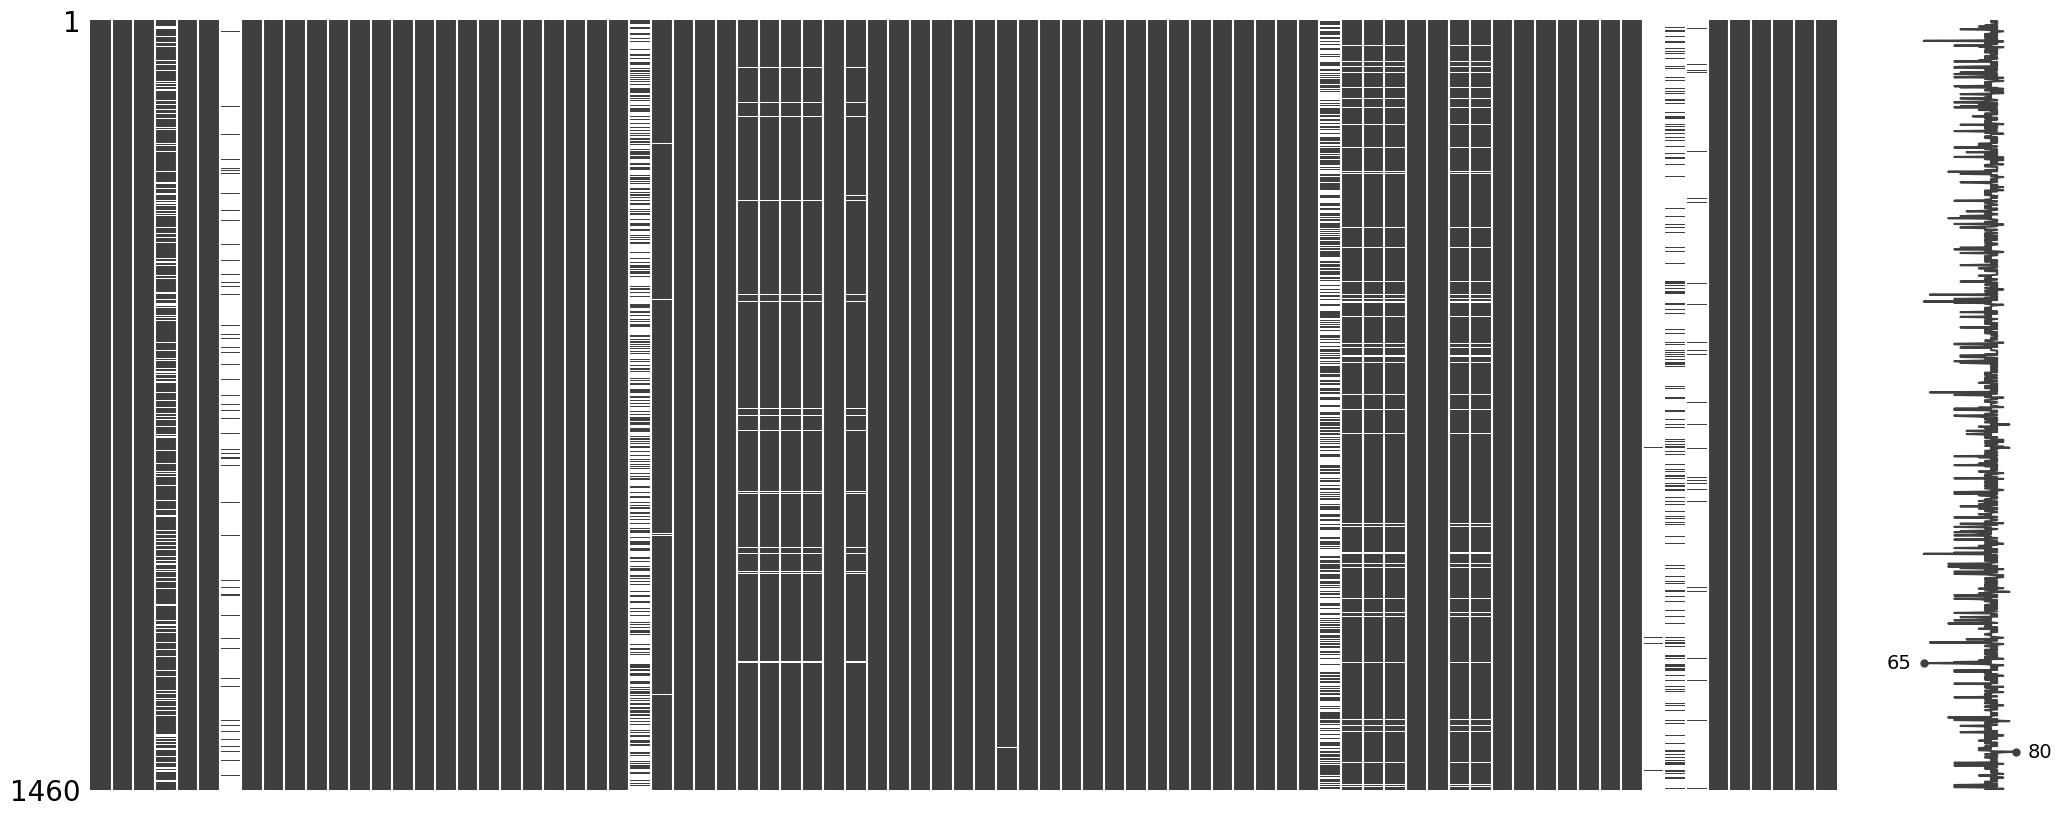

In [156]:
msno.matrix(df_house)  #visualización de valores faltantes

Estas columnas son candidatas a descarte. Pero revisemos la informacion que existe sobre ellas.

PoolQC: 1453 / 1460

Alley: 1369 / 1460

Fence: 1179 / 1460

MiscFeature: 1406 / 1460

Alley: Tipo de acceso por callejón a la propiedad
Grvl: Grava
Pave: Pavimentado
NA: Sin acceso por callejón
LotShape: Forma general de la propiedad

Fence: Calidad de la valla
GdPrv: Buena Privacidad
MnPrv: Mínima Privacidad
GdWo: Buena Madera
MnWw: Mínima Madera/Alambre
NA: Sin valla

MiscFeature: Características Misceláneas no cubiertas en otras categorías
Elev: Ascensor
Gar2: 2do Garaje
Othr: Otro
Shed: Cobertizo (más de 8x10)
TenC: Pista de tenis
NA: Sin características misceláneas

PoolQC: Calidad de la piscina
Ex: Excelente
Gd: Bueno
TA: Promedio/Típico
Fa: Justo
NA: Sin piscina


In [157]:
df_house['PoolArea'] == 0

0       True
1       True
2       True
3       True
4       True
        ... 
1455    True
1456    True
1457    True
1458    True
1459    True
Name: PoolArea, Length: 1460, dtype: bool

In [158]:
#Revisando la informacion descartamos los que consideramos datos faltantes
df_house = df_house.drop(['PoolQC','Fence','MiscFeature','Alley','PoolArea'],axis=1)

<Axes: >

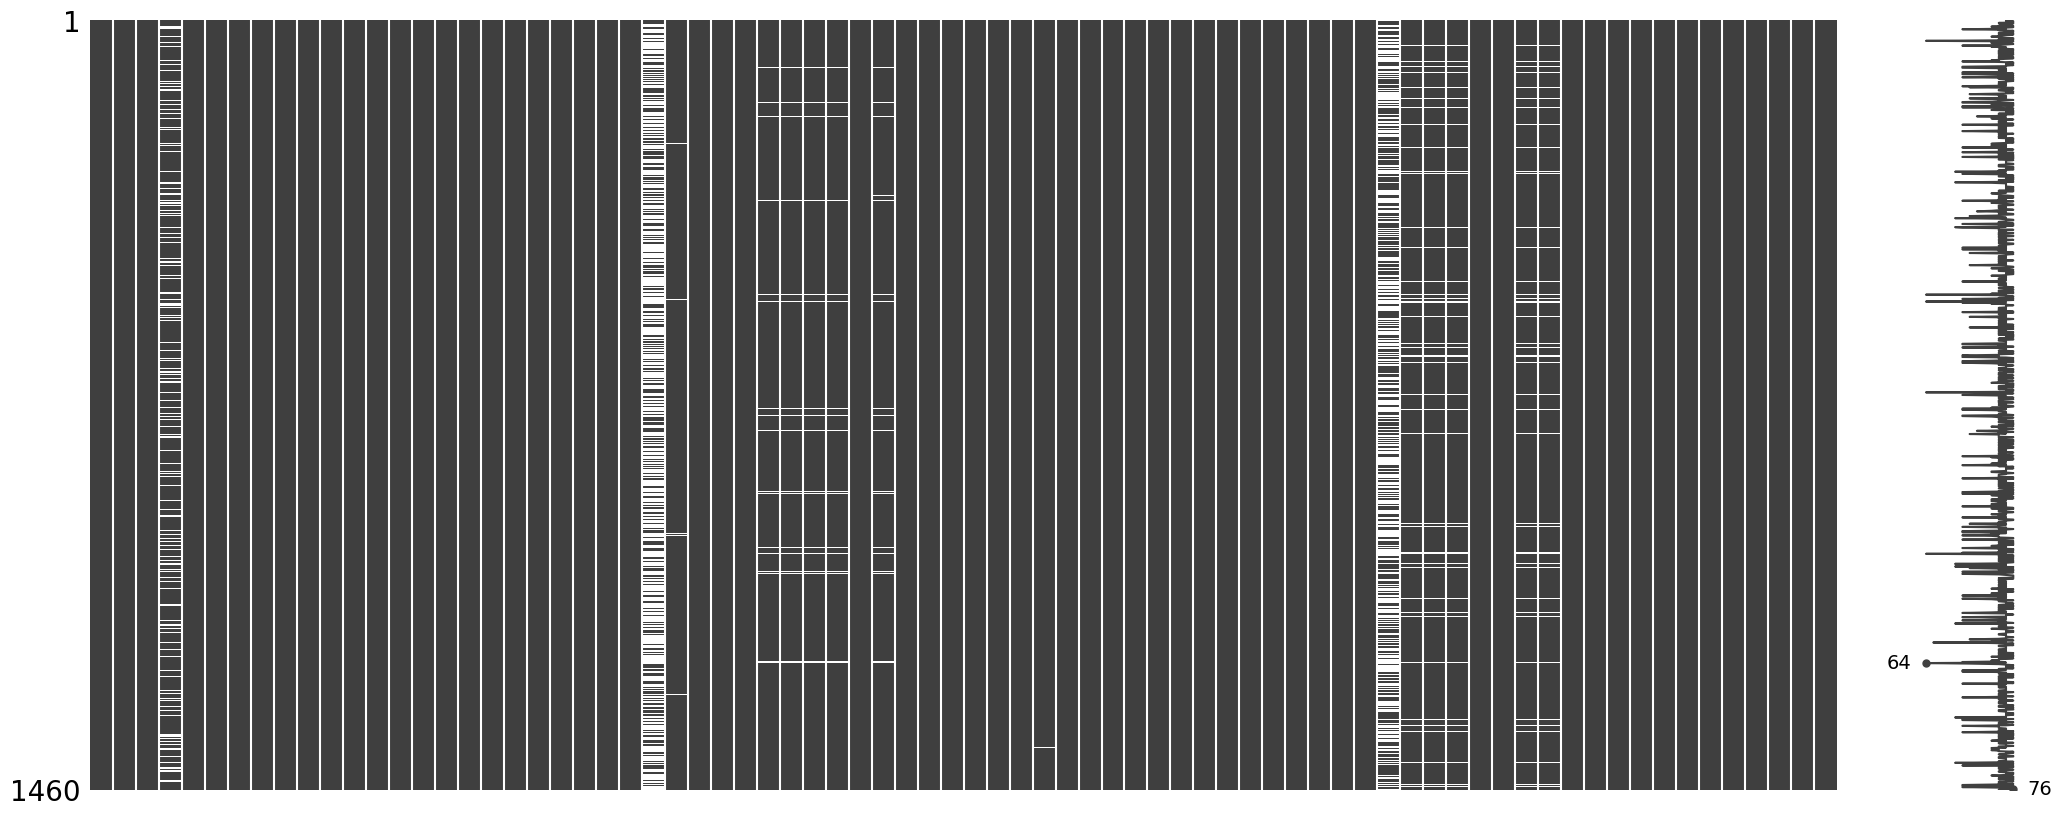

In [159]:
msno.matrix(df_house)  #visualización de valores faltantes

<Axes: >

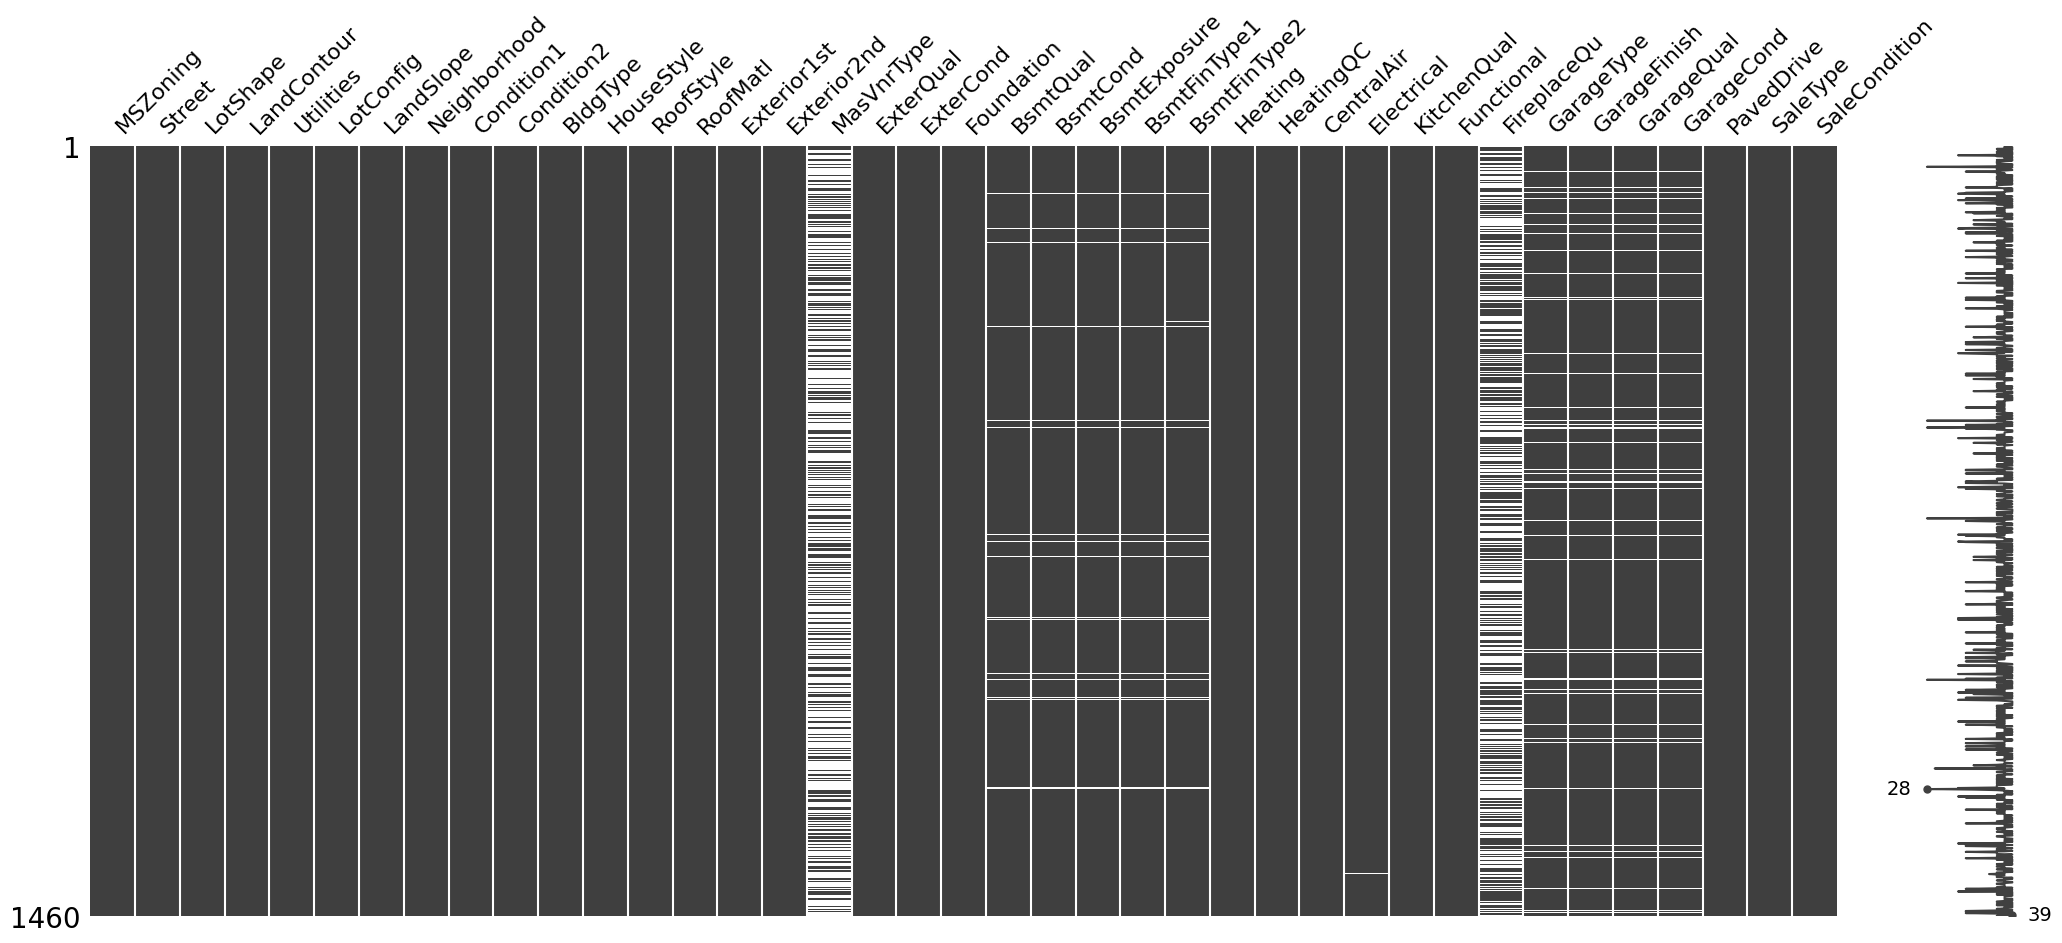

In [160]:
#Visualizamos de cerca los datos categoricos
msno.matrix(
    df_house[df_house.select_dtypes(include=['object']).columns]
)

Categoricos con nulos:

MaxVnrType


BsmtQual, BsmtCond,BsmtExposure,BsmtFinType1, BsmtFinType2

Electrical

FirePLaceQu

GarageType,GarageFinish,GarageQual,GarageCond,

<Axes: >

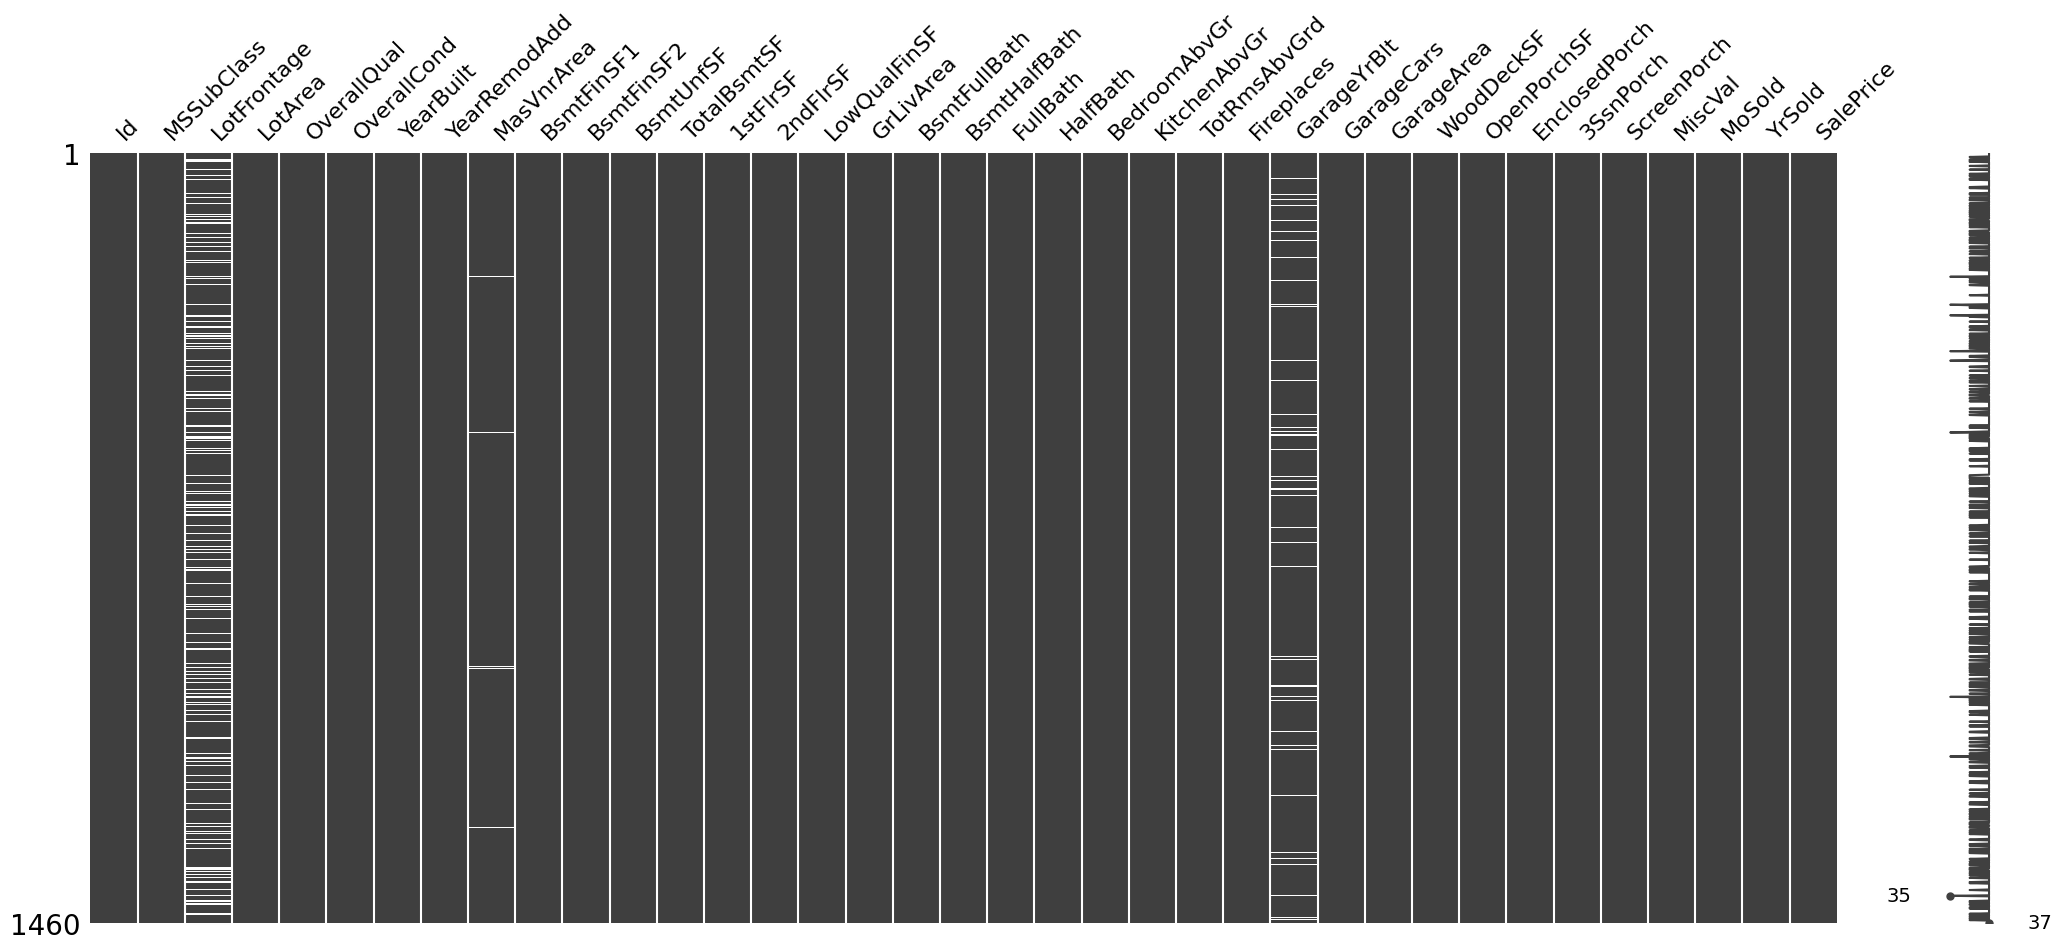

In [161]:
#Visualizamos de cerca los datos numericos
msno.matrix(
    df_house[df_house.select_dtypes(include=['int', 'float']).columns]
)

Numericos con nulos:

LotFrontage

MasVnrArea

GarageYrBit

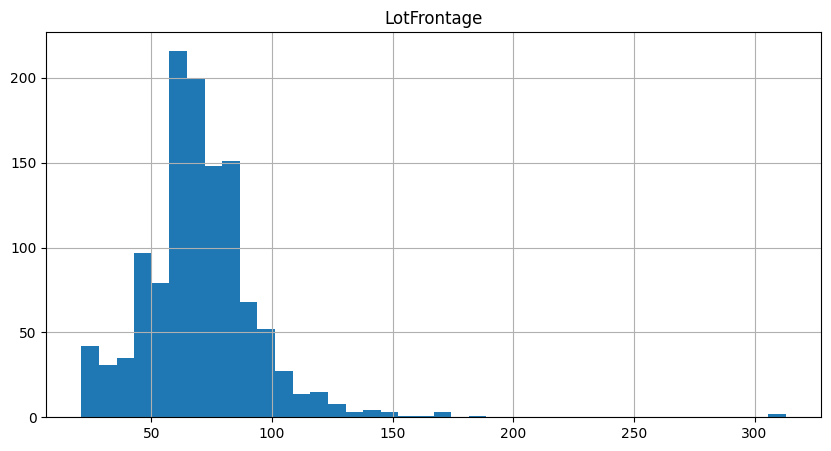

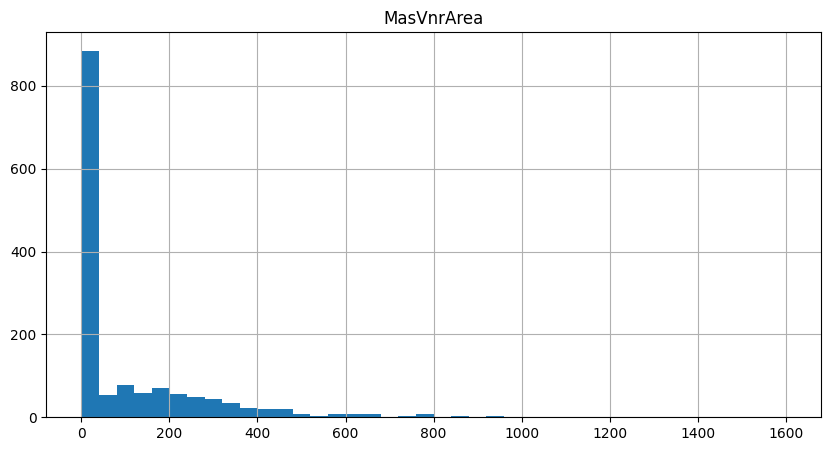

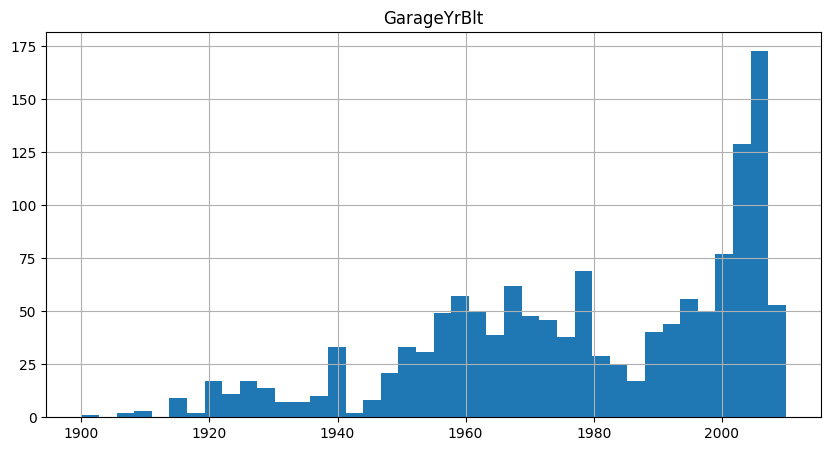

In [162]:
numerical_nulls = ['LotFrontage','MasVnrArea','GarageYrBlt']

for nulls in numerical_nulls:
  df_house[nulls].hist(bins=40,figsize=(10,5))
  plt.title(nulls)
  plt.show()


In [163]:
#LotFrontage: Pies lineales de calle conectados a la propiedad
#GarageType: Ubicación del garaje
#GarageYrBlt: Año en que se construyó el garaje
#MasVnrArea: Área de revestimiento de mampostería en pies cuadrados
#MasVnrType: Tipo de revestimiento de mampostería

In [164]:
df_house['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [165]:
df_house['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [166]:
df_house[df_house.select_dtypes(include=['int', 'float']).columns].isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [167]:
#imputamos con la moda en MasVnrArea
df_house.loc[df_house['MasVnrArea'].isnull(),'MasVnrArea'] = 0

In [168]:
#imputamos con media para LotFrontage
df_house.loc[df_house['LotFrontage'].isnull(),'LotFrontage'] = df_house['LotFrontage'].mean()

In [169]:
#Vemos que GarageYrBlt y GarageType tienen los mismo valores nulos.
df_house.loc[df_house[['GarageType', 'GarageYrBlt']].isnull().any(axis=1)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
39      40          90       RL    65.000000     6040   Pave      Reg   
48      49         190       RM    33.000000     4456   Pave      Reg   
78      79          90       RL    72.000000    10778   Pave      Reg   
88      89          50  C (all)   105.000000     8470   Pave      IR1   
89      90          20       RL    60.000000     8070   Pave      Reg   
...    ...         ...      ...          ...      ...    ...      ...   
1349  1350          70       RM    50.000000     5250   Pave      Reg   
1407  1408          20       RL    70.049958     8780   Pave      IR1   
1449  1450         180       RM    21.000000     1533   Pave      Reg   
1450  1451          90       RL    60.000000     9000   Pave      Reg   
1453  1454          20       RL    90.000000    17217   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
39           Lvl    AllPub    Inside  ...           0             0         0   
48           Lvl    AllPub    Inside  ...           0           102         0   
78           Lvl    AllPub    Inside  ...           0             0         0   
88           Lvl    AllPub    Corner  ...           0           156         0   
89           Lvl    AllPub    Inside  ...           0             0         0   
...          ...       ...       ...  ...         ...           ...       ...   
1349         Lvl    AllPub    Inside  ...          54            20         0   
1407         Lvl    AllPub    Corner  ...           0             0         0   
1449         Lvl    AllPub    Inside  ...           0             0         0   
1450         Lvl    AllPub       FR2  ...          45             0         0   
1453         Lvl    AllPub    Inside  ...          56             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
39             0       0      6    2008        WD        AdjLand      82000  
48             0       0      6    2009       New        Partial     113000  
78             0       0      4    2010        WD         Normal     136500  
88             0       0     10    2009     ConLD        Abnorml      85000  
89             0       0      8    2007        WD         Normal     123600  
...          ...     ...    ...     ...       ...            ...        ...  
1349           0       0     12    2008        WD         Normal     122000  
1407           0       0      3    2009        WD         Normal     112000  
1449           0       0      8    2006        WD        Abnorml      92000  
1450           0       0      9    2009        WD         Normal     136000  
1453           0       0      7    2006        WD        Abnorml      84500  

[81 rows x 76 columns]

In [170]:
#imputamos con 0, gracias a GarageType sabemos que no hay Garage
df_house.loc[df_house['GarageYrBlt'].isnull(),'GarageYrBlt'] = 0

<Axes: >

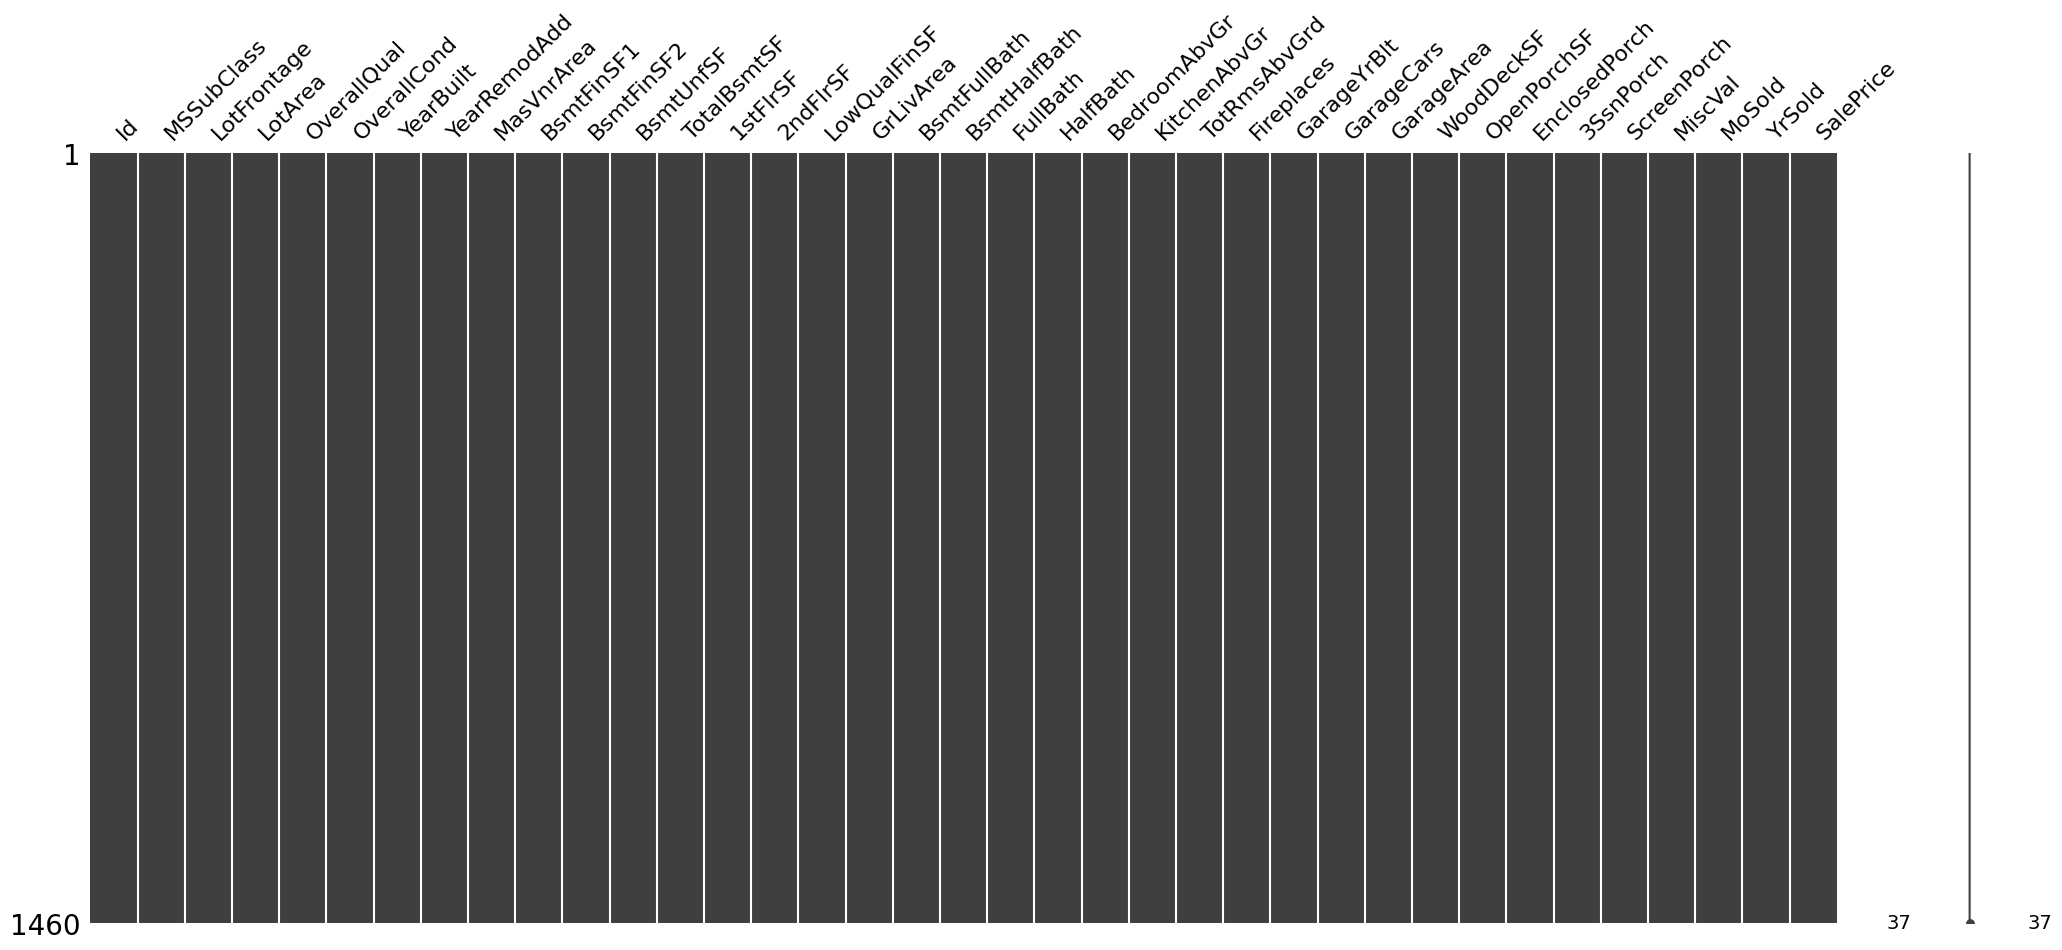

In [171]:
#Visualizamos si hay nulos
msno.matrix(
    df_house[df_house.select_dtypes(include=['int', 'float']).columns]
)

In [172]:
#Obtengamos la correlacion de las variables numericas
mat_corr =  df_house[df_house.select_dtypes(include=['int', 'float']).columns].corr()

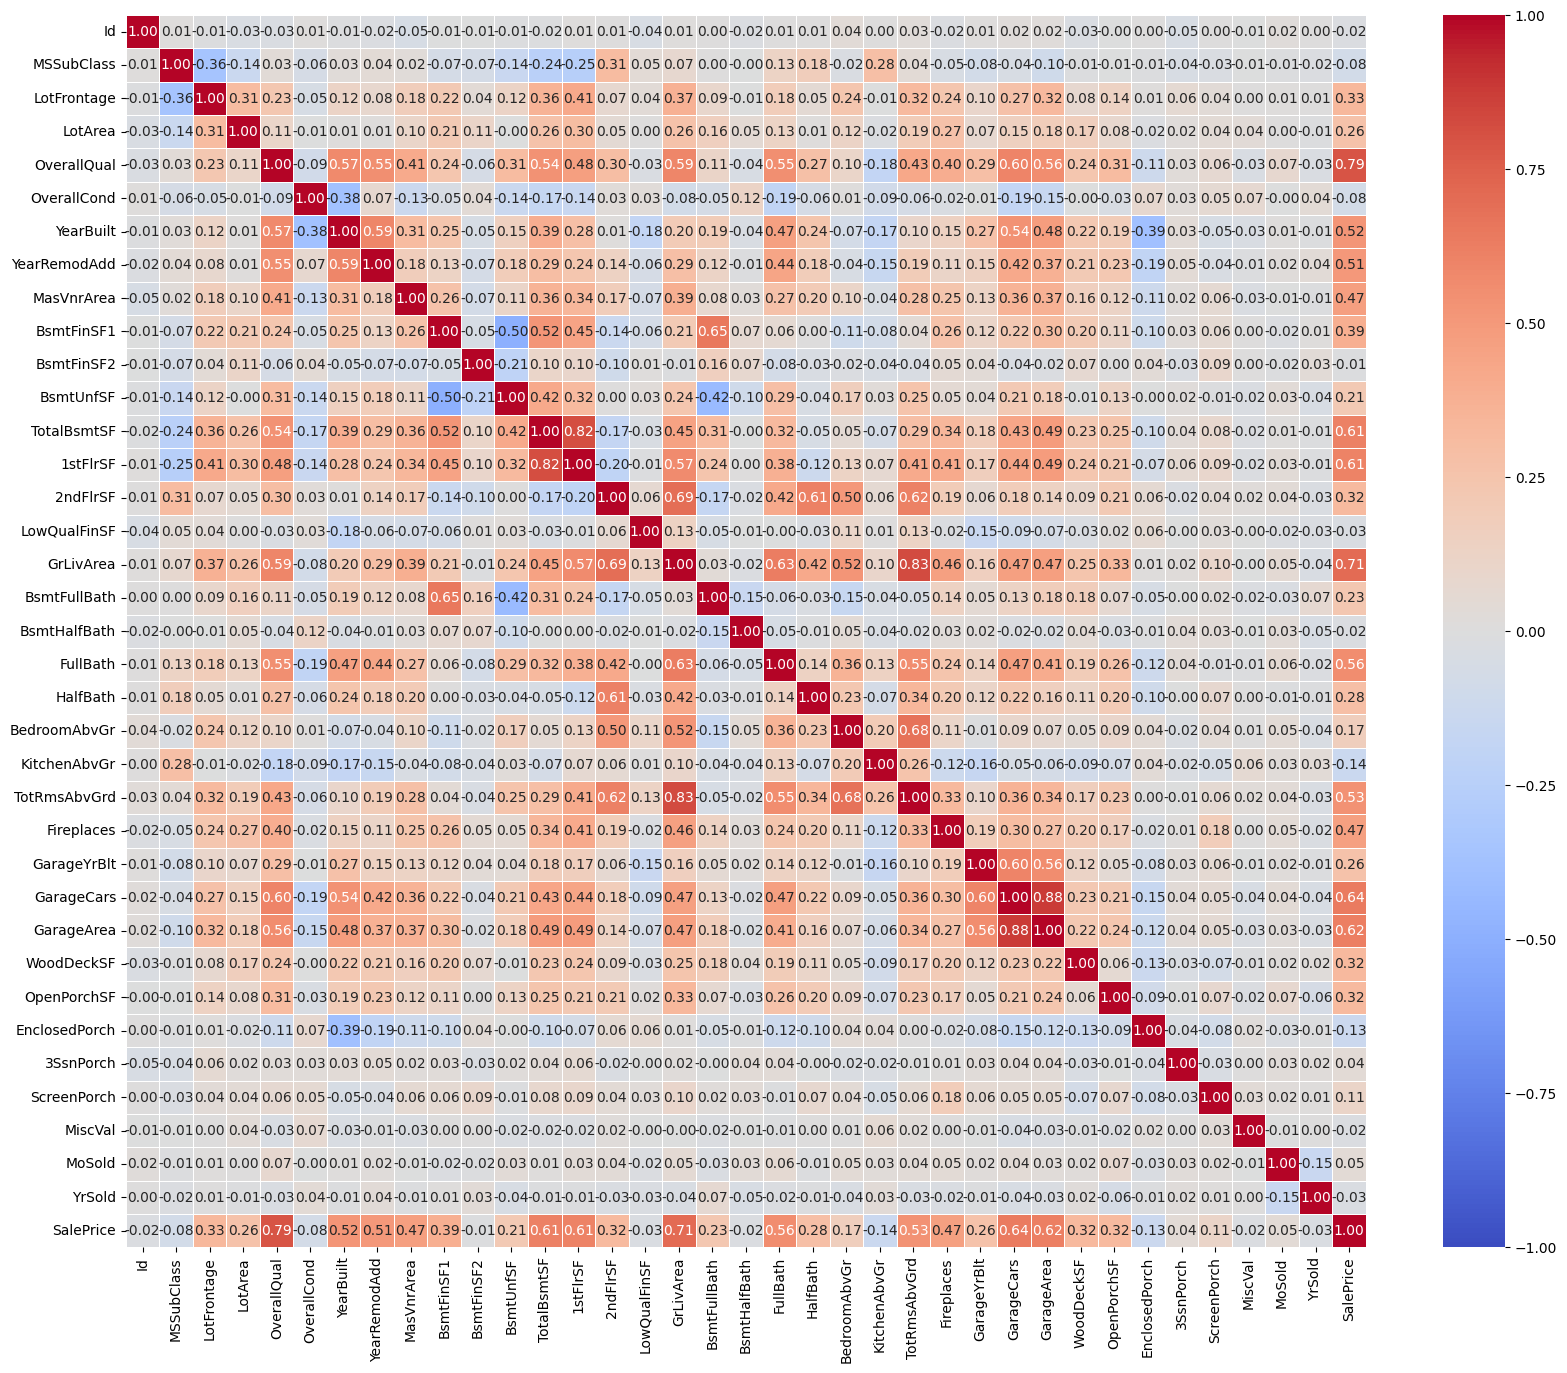

In [173]:
#Observamos la matriz de correlacion
plt.figure(figsize=(20, 16))
sns.heatmap(mat_corr, annot=True, cmap='coolwarm', linewidths=0.5,vmin=-1, vmax=1, annot_kws={"size": 10},fmt=".2f")
plt.show()

GarageYrBlt & YearBuilt= 0.83

TotRmsAbvGrd & GrLivArea = 0.83

SalePrice & YearBuild = 0.52

SalePrice & GaraYrBlt = 0.49

SalePrice & TotRmsAbvGrd = 0.53

SalePrice & GrLivArea = 0.71

In [174]:
#Correlacion Positiva GarageYrBlt & YearBuilt, Por el momento elimino GarageYrBlt.
#Dada a la informacion que tenemos, se entiende la correlacion
df_house = df_house.drop(['GarageYrBlt'],axis=1)

In [175]:
#Hasta el momento hemos reducido de 80 a 70 caracteristicas
#Imputado los valores nulos de las caracteristicas numericas
df_house

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0            Lvl    AllPub    Inside  ...          61             0         0   
1            Lvl    AllPub       FR2  ...           0             0         0   
2            Lvl    AllPub    Inside  ...          42             0         0   
3            Lvl    AllPub    Corner  ...          35           272         0   
4            Lvl    AllPub       FR2  ...          84             0         0   
...          ...       ...       ...  ...         ...           ...       ...   
1455         Lvl    AllPub    Inside  ...          40             0         0   
1456         Lvl    AllPub    Inside  ...           0             0         0   
1457         Lvl    AllPub    Inside  ...          60             0         0   
1458         Lvl    AllPub    Inside  ...           0           112         0   
1459         Lvl    AllPub    Inside  ...          68             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0              0       0      2    2008        WD         Normal     208500  
1              0       0      5    2007        WD         Normal     181500  
2              0       0      9    2008        WD         Normal     223500  
3              0       0      2    2006        WD        Abnorml     140000  
4              0       0     12    2008        WD         Normal     250000  
...          ...     ...    ...     ...       ...            ...        ...  
1455           0       0      8    2007        WD         Normal     175000  
1456           0       0      2    2010        WD         Normal     210000  
1457           0    2500      5    2010        WD         Normal     266500  
1458           0       0      4    2010        WD         Normal     142125  
1459           0       0      6    2008        WD         Normal     147500  

[1460 rows x 75 columns]

In [176]:
#Ahora nos enfocamos en los datos nulos categoricos
df_house[df_house.select_dtypes(include=['object']).columns]

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
0         CollgCr       Norm       Norm  ...          Gd        Typ   
1         Veenker      Feedr       Norm  ...          TA        Typ   
2         CollgCr       Norm       Norm  ...          Gd        Typ   
3         Crawfor       Norm       Norm  ...          Gd        Typ   
4         NoRidge       Norm       Norm  ...          Gd        Typ   
...           ...        ...        ...  ...         ...        ...   
1455      Gilbert       Norm       Norm  ...          TA        Typ   
1456       NWAmes       Norm       Norm  ...          TA       Min1   
1457      Crawfor       Norm       Norm  ...          Gd        Typ   
1458        NAmes       Norm       Norm  ...          Gd        Typ   
1459      Edwards       Norm       Norm  ...          TA        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0            NaN     Attchd          RFn         TA         TA          Y   
1             TA     Attchd          RFn         TA         TA          Y   
2             TA     Attchd          RFn         TA         TA          Y   
3             Gd     Detchd          Unf         TA         TA          Y   
4             TA     Attchd          RFn         TA         TA          Y   
...          ...        ...          ...        ...        ...        ...   
1455          TA     Attchd          RFn         TA         TA          Y   
1456          TA     Attchd          Unf         TA         TA          Y   
1457          Gd     Attchd          RFn         TA         TA          Y   
1458         NaN     Attchd          Unf         TA         TA          Y   
1459         NaN     Attchd          Fin         TA         TA          Y   

     SaleType SaleCondition  
0          WD        Normal  
1          WD        Normal  
2          WD        Normal  
3          WD       Abnorml  
4          WD        Normal  
...       ...           ...  
1455       WD        Normal  
1456       WD        Normal  
1457       WD        Normal  
1458       WD        Normal  
1459       WD        Normal  

[1460 rows x 39 columns]

Categoricos con nulos:

MaxVnrType


BsmtQual, BsmtCond,BsmtExposure,BsmtFinType1, BsmtFinType2

Electrical

FirePLaceQu

GarageType,GarageFinish,GarageQual,GarageCond,

In [177]:
df_house[df_house.select_dtypes(include=['object']).columns].isnull().sum()


MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

<Axes: >

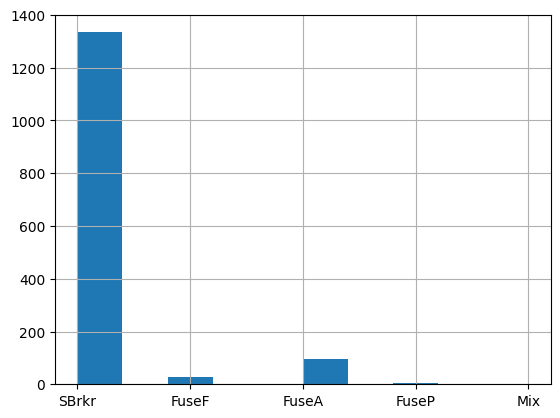

In [178]:
#Empezamos con Electrical solo tiene 1 nulo
df_house['Electrical'].hist(bins=10)

In [179]:
#Imputamos con la moda, SBrkr
df_house['Electrical'].fillna('SBrkr',inplace=True)

In [180]:
#Checamos los valores de Garage

# Filtrar columnas específicas
selected_columns = ['Id', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df_filter = df_house[selected_columns]

# Filtrar filas donde al menos una de las características sea nula
df_filter_nulls = df_filter[df_filter[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].isnull().any(axis=1)]

df_filter_nulls[df_filter_nulls['GarageType'].isnull()]

Id GarageType GarageFinish GarageQual GarageCond
39      40        NaN          NaN        NaN        NaN
48      49        NaN          NaN        NaN        NaN
78      79        NaN          NaN        NaN        NaN
88      89        NaN          NaN        NaN        NaN
89      90        NaN          NaN        NaN        NaN
...    ...        ...          ...        ...        ...
1349  1350        NaN          NaN        NaN        NaN
1407  1408        NaN          NaN        NaN        NaN
1449  1450        NaN          NaN        NaN        NaN
1450  1451        NaN          NaN        NaN        NaN
1453  1454        NaN          NaN        NaN        NaN

[81 rows x 5 columns]

In [181]:
#Imputamos como NA ya que la informacion no los especifica y las 81 variables no los confirman
df_house['GarageCond'].fillna('NA',inplace=True)
df_house['GarageFinish'].fillna('NA',inplace=True)
df_house['GarageQual'].fillna('NA',inplace=True)
df_house['GarageType'].fillna('NA',inplace=True)

In [182]:
#Revisamos ahora Fireplaces, vemos que son los 690
# Filtrar columnas específicas
selected_columns = ['Id', 'Fireplaces', 'FireplaceQu']
df_filter = df_house[selected_columns]

# Filtrar filas donde al menos una de las características sea nula
df_filter_nulls = df_filter[df_filter[['Fireplaces', 'FireplaceQu']].isnull().any(axis=1)]

df_filter_nulls[df_filter_nulls['FireplaceQu'].isnull()]

Id  Fireplaces FireplaceQu
0        1           0         NaN
5        6           0         NaN
10      11           0         NaN
12      13           0         NaN
15      16           0         NaN
...    ...         ...         ...
1452  1453           0         NaN
1453  1454           0         NaN
1454  1455           0         NaN
1458  1459           0         NaN
1459  1460           0         NaN

[690 rows x 3 columns]

In [183]:
#Imputamos FireplaceQU como NA, dada la descripcion
df_house['FireplaceQu'].fillna('NA',inplace=True)

In [184]:
#Reviso cuales faltan
df_house[df_house.select_dtypes(include=['object']).columns].isnull().sum()


MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
KitchenQual        0
Functional         0
FireplaceQu        0
GarageType         0
GarageFinish       0
GarageQual         0
GarageCond         0
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

In [185]:
#Reviso ahora Bsmt y sus variables relacionadas
# Filtrar columnas específicas
selected_columns = ['Id', 'BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
df_filter = df_house[selected_columns]

# Filtrar filas donde al menos una de las características sea nula
df_filter_nulls = df_filter[df_filter[['BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].isnull().any(axis=1)]

df_filter_nulls[df_filter_nulls['BsmtExposure'].isnull()]

Id BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
17      18      NaN      NaN          NaN          NaN          NaN
39      40      NaN      NaN          NaN          NaN          NaN
90      91      NaN      NaN          NaN          NaN          NaN
102    103      NaN      NaN          NaN          NaN          NaN
156    157      NaN      NaN          NaN          NaN          NaN
182    183      NaN      NaN          NaN          NaN          NaN
259    260      NaN      NaN          NaN          NaN          NaN
342    343      NaN      NaN          NaN          NaN          NaN
362    363      NaN      NaN          NaN          NaN          NaN
371    372      NaN      NaN          NaN          NaN          NaN
392    393      NaN      NaN          NaN          NaN          NaN
520    521      NaN      NaN          NaN          NaN          NaN
532    533      NaN      NaN          NaN          NaN          NaN
533    534      NaN      NaN          NaN          NaN          NaN
553    554      NaN      NaN          NaN          NaN          NaN
646    647      NaN      NaN          NaN          NaN          NaN
705    706      NaN      NaN          NaN          NaN          NaN
736    737      NaN      NaN          NaN          NaN          NaN
749    750      NaN      NaN          NaN          NaN          NaN
778    779      NaN      NaN          NaN          NaN          NaN
868    869      NaN      NaN          NaN          NaN          NaN
894    895      NaN      NaN          NaN          NaN          NaN
897    898      NaN      NaN          NaN          NaN          NaN
948    949       Gd       TA          NaN          Unf          Unf
984    985      NaN      NaN          NaN          NaN          NaN
1000  1001      NaN      NaN          NaN          NaN          NaN
1011  1012      NaN      NaN          NaN          NaN          NaN
1035  1036      NaN      NaN          NaN          NaN          NaN
1045  1046      NaN      NaN          NaN          NaN          NaN
1048  1049      NaN      NaN          NaN          NaN          NaN
1049  1050      NaN      NaN          NaN          NaN          NaN
1090  1091      NaN      NaN          NaN          NaN          NaN
1179  1180      NaN      NaN          NaN          NaN          NaN
1216  1217      NaN      NaN          NaN          NaN          NaN
1218  1219      NaN      NaN          NaN          NaN          NaN
1232  1233      NaN      NaN          NaN          NaN          NaN
1321  1322      NaN      NaN          NaN          NaN          NaN
1412  1413      NaN      NaN          NaN          NaN          NaN

<Axes: >

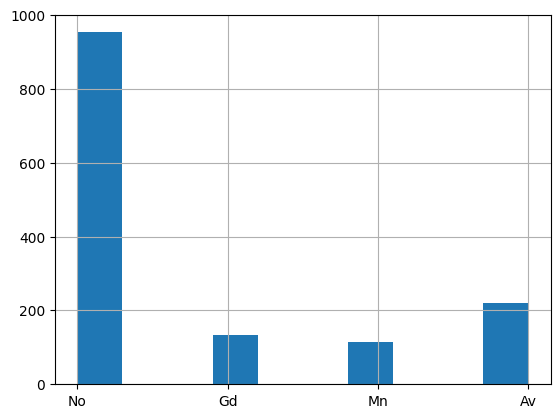

In [186]:
#Indice Id 939, le falta la variable de exposicion BsmtExposure
#Imputemos esa unica con No dada a su distribucion
df_house['BsmtExposure'].hist()

In [187]:
df_house.loc[df_house['Id'] == 949, 'BsmtExposure'] = 'No'

In [188]:
#Reviso Nuevamente para ver cuales faltan
# Filtrar columnas específicas
selected_columns = ['Id', 'BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
df_filter = df_house[selected_columns]

# Filtrar filas donde al menos una de las características sea nula
df_filter_nulls = df_filter[df_filter[['BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']].isnull().any(axis=1)]

df_filter_nulls[df_filter_nulls['BsmtExposure'].isnull()]

Id BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2
17      18      NaN      NaN          NaN          NaN          NaN
39      40      NaN      NaN          NaN          NaN          NaN
90      91      NaN      NaN          NaN          NaN          NaN
102    103      NaN      NaN          NaN          NaN          NaN
156    157      NaN      NaN          NaN          NaN          NaN
182    183      NaN      NaN          NaN          NaN          NaN
259    260      NaN      NaN          NaN          NaN          NaN
342    343      NaN      NaN          NaN          NaN          NaN
362    363      NaN      NaN          NaN          NaN          NaN
371    372      NaN      NaN          NaN          NaN          NaN
392    393      NaN      NaN          NaN          NaN          NaN
520    521      NaN      NaN          NaN          NaN          NaN
532    533      NaN      NaN          NaN          NaN          NaN
533    534      NaN      NaN          NaN          NaN          NaN
553    554      NaN      NaN          NaN          NaN          NaN
646    647      NaN      NaN          NaN          NaN          NaN
705    706      NaN      NaN          NaN          NaN          NaN
736    737      NaN      NaN          NaN          NaN          NaN
749    750      NaN      NaN          NaN          NaN          NaN
778    779      NaN      NaN          NaN          NaN          NaN
868    869      NaN      NaN          NaN          NaN          NaN
894    895      NaN      NaN          NaN          NaN          NaN
897    898      NaN      NaN          NaN          NaN          NaN
984    985      NaN      NaN          NaN          NaN          NaN
1000  1001      NaN      NaN          NaN          NaN          NaN
1011  1012      NaN      NaN          NaN          NaN          NaN
1035  1036      NaN      NaN          NaN          NaN          NaN
1045  1046      NaN      NaN          NaN          NaN          NaN
1048  1049      NaN      NaN          NaN          NaN          NaN
1049  1050      NaN      NaN          NaN          NaN          NaN
1090  1091      NaN      NaN          NaN          NaN          NaN
1179  1180      NaN      NaN          NaN          NaN          NaN
1216  1217      NaN      NaN          NaN          NaN          NaN
1218  1219      NaN      NaN          NaN          NaN          NaN
1232  1233      NaN      NaN          NaN          NaN          NaN
1321  1322      NaN      NaN          NaN          NaN          NaN
1412  1413      NaN      NaN          NaN          NaN          NaN

In [189]:
#Imputamos con NA dada la descripcion
#Bsm
df_house['BsmtQual'].fillna('NA',inplace=True)
df_house['BsmtCond'].fillna('NA',inplace=True)
df_house['BsmtExposure'].fillna('NA',inplace=True)
df_house['BsmtFinType1'].fillna('NA',inplace=True)
df_house['BsmtFinType2'].fillna('NA',inplace=True)

In [190]:
#Revisamos ahora MasVnr
# Filtrar columnas específicas
selected_columns = ['Id', 'MasVnrArea', 'MasVnrType']
df_filter = df_house[selected_columns]

#mputamos MasVnrArea, asi que buscamos mayores a 0 y tipos nulos
df_filter_nulls = df_filter[(df_filter['MasVnrType'].isnull()) & (df_filter['MasVnrArea'] > 0)]
df_filter_nulls

Id  MasVnrArea MasVnrType
624    625       288.0        NaN
773    774         1.0        NaN
1230  1231         1.0        NaN
1300  1301       344.0        NaN
1334  1335       312.0        NaN

<Axes: >

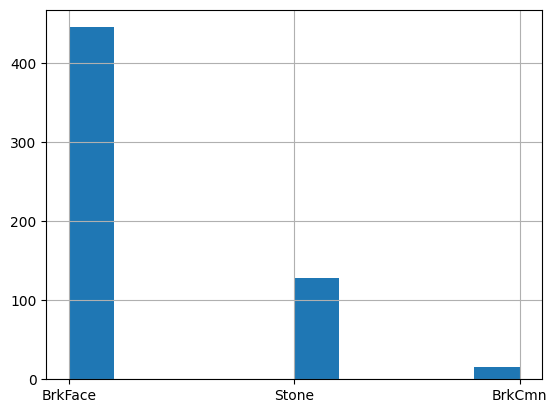

In [191]:
df_house['MasVnrType'].hist()

In [192]:
#Estas variables que tienen Area pero no el Tipo imputaremos con BrkFace
df_house.loc[df_house['Id'] == 625, 'MasVnrType'] = 'BrkFace'
df_house.loc[df_house['Id'] == 774, 'MasVnrType'] = 'BrkFace'
df_house.loc[df_house['Id'] == 1231, 'MasVnrType'] = 'BrkFace'
df_house.loc[df_house['Id'] == 1301, 'MasVnrType'] = 'BrkFace'
df_house.loc[df_house['Id'] == 1335, 'MasVnrType'] = 'BrkFace'

In [193]:
#Volvemos a revisar si hace falta

# Filtrar columnas específicas
selected_columns = ['Id', 'MasVnrArea', 'MasVnrType']
df_filter = df_house[selected_columns]

#mputamos MasVnrArea, asi que buscamos mayores a 0 y tipos nulos
df_filter_nulls = df_filter[(df_filter['MasVnrType'].isnull()) & (df_filter['MasVnrArea'] > 0)]
df_filter_nulls

Empty DataFrame
Columns: [Id, MasVnrArea, MasVnrType]
Index: []

In [194]:
#Ahora imputaremos con NA como None
df_house['MasVnrType'].fillna('NA',inplace=True)

<Axes: >

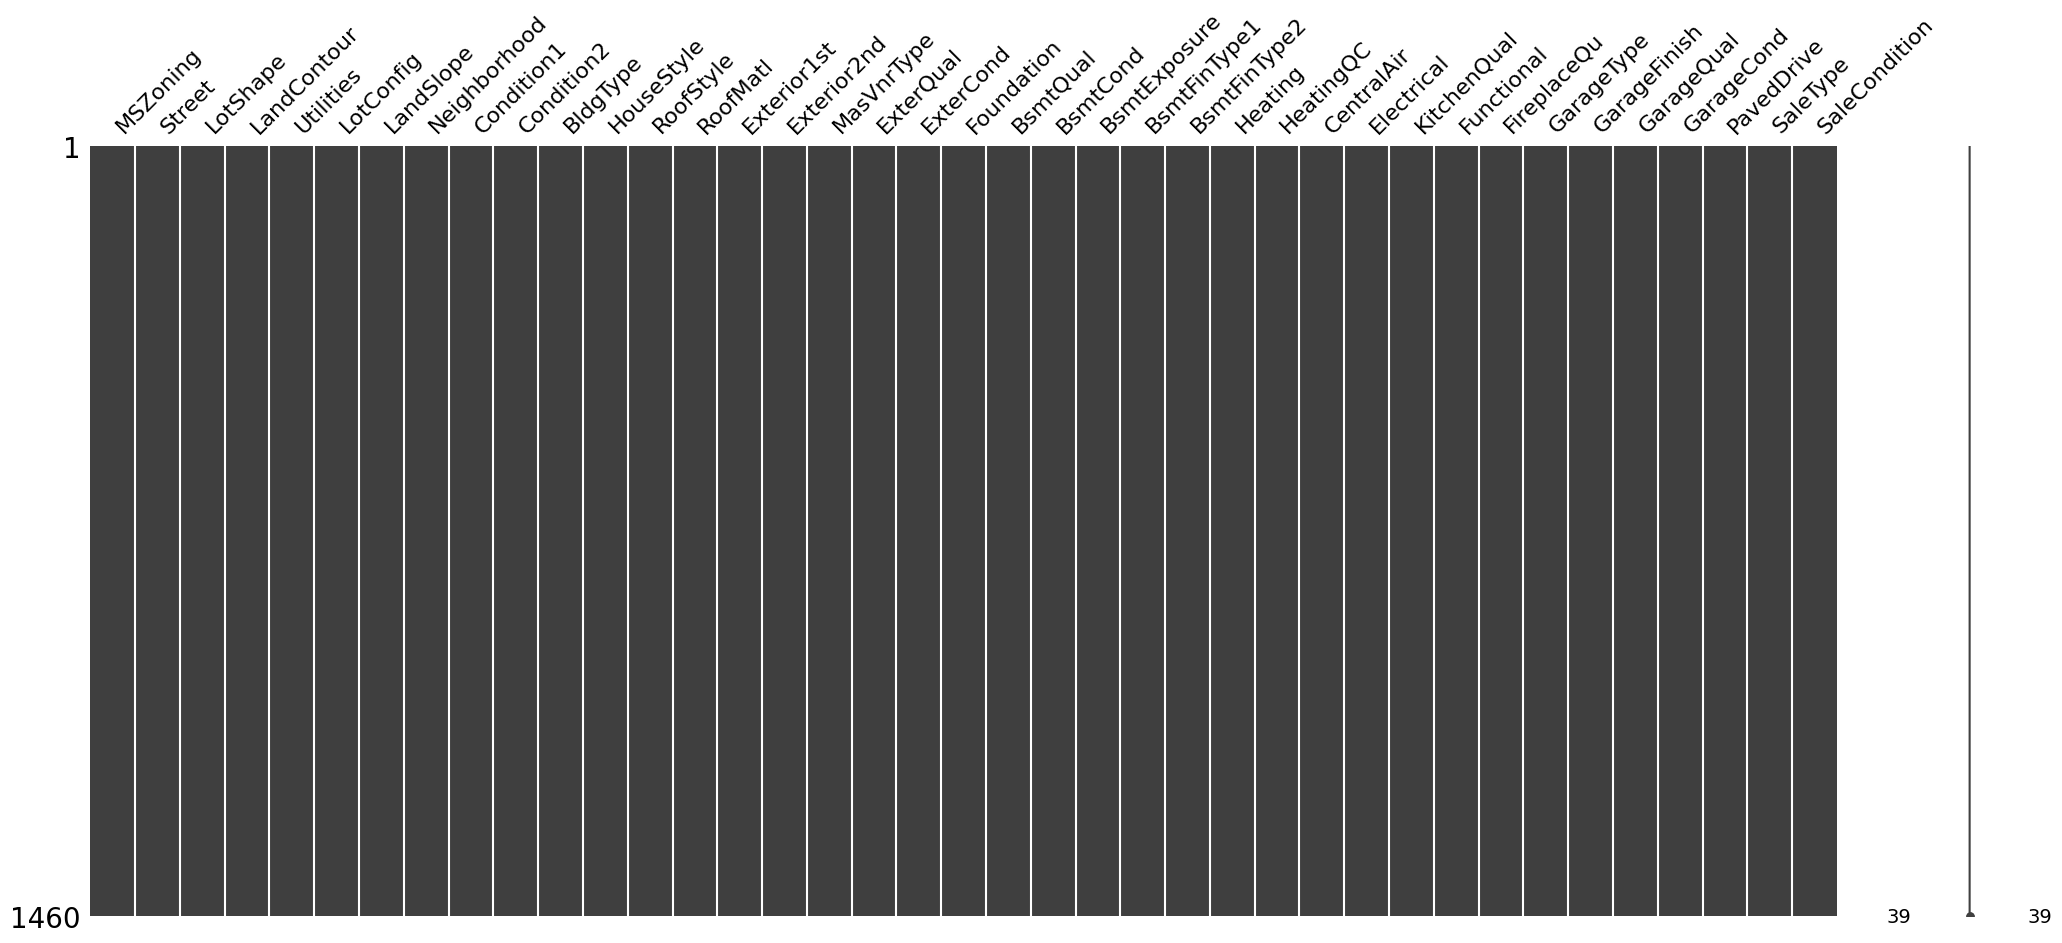

In [195]:
#Observamos nuevamente los datos categoricos
msno.matrix(
    df_house[df_house.select_dtypes(include=['object']).columns]
)

<Axes: >

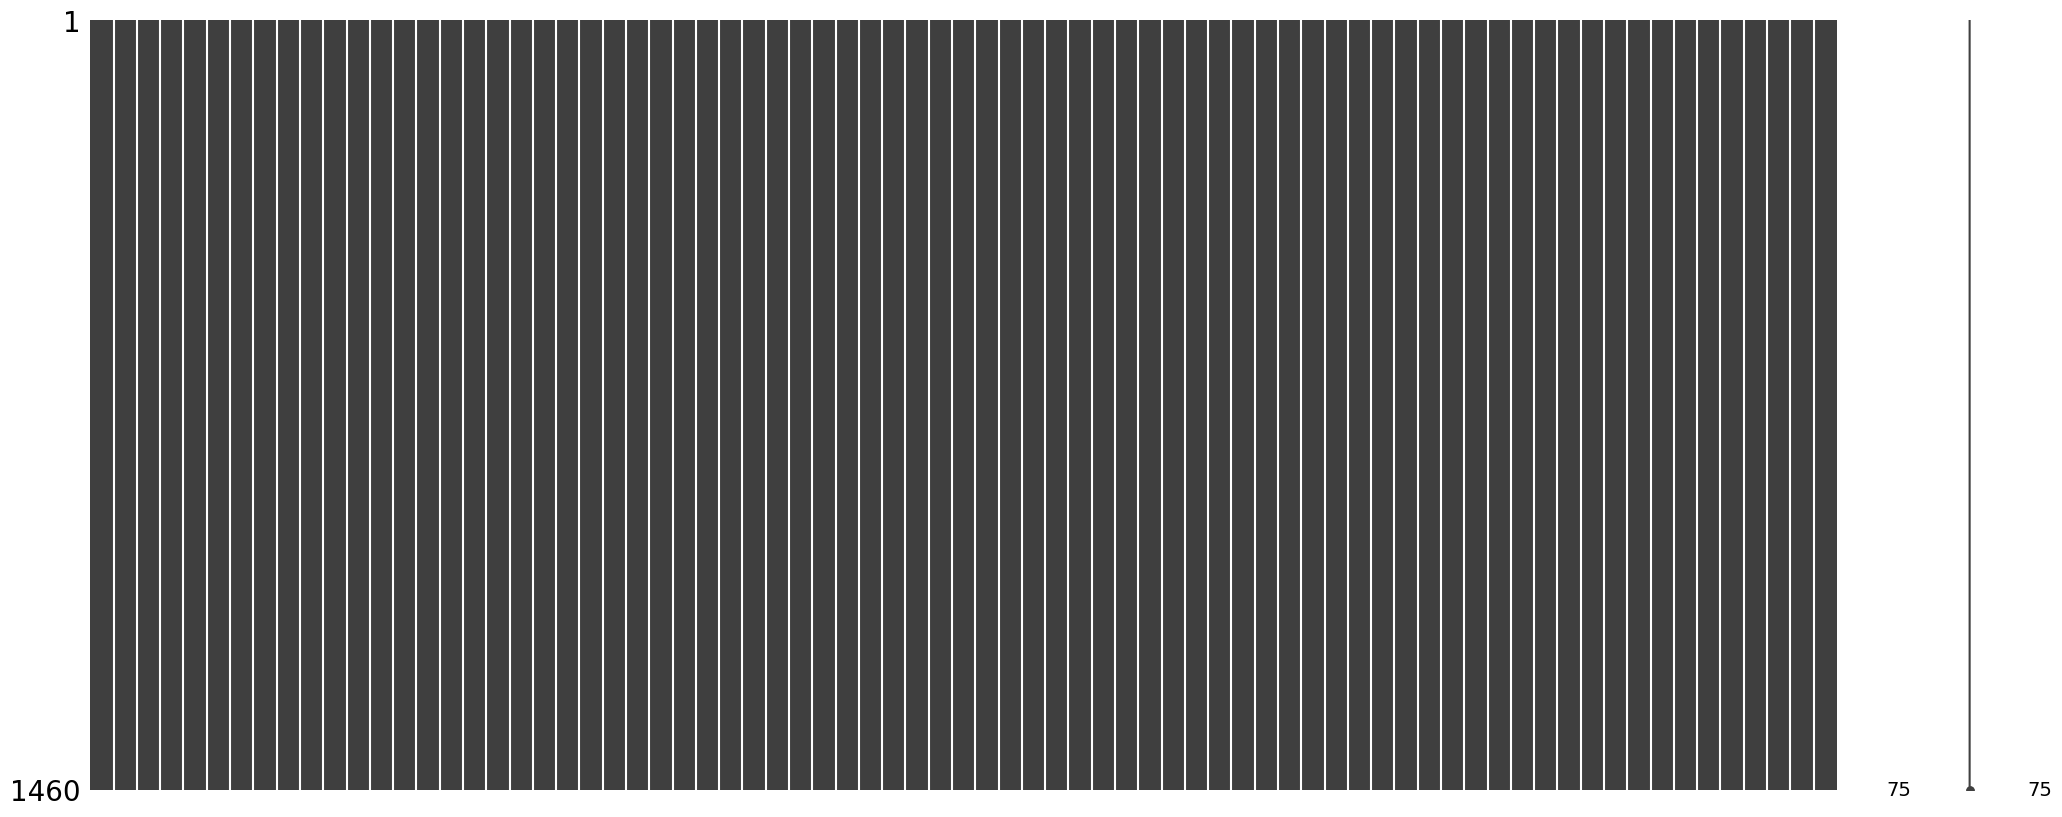

In [196]:
#Ahora en totalidad
msno.matrix(df_house)

Pasemos a los siguientes pasos

In [197]:
df_house

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0            Lvl    AllPub    Inside  ...          61             0         0   
1            Lvl    AllPub       FR2  ...           0             0         0   
2            Lvl    AllPub    Inside  ...          42             0         0   
3            Lvl    AllPub    Corner  ...          35           272         0   
4            Lvl    AllPub       FR2  ...          84             0         0   
...          ...       ...       ...  ...         ...           ...       ...   
1455         Lvl    AllPub    Inside  ...          40             0         0   
1456         Lvl    AllPub    Inside  ...           0             0         0   
1457         Lvl    AllPub    Inside  ...          60             0         0   
1458         Lvl    AllPub    Inside  ...           0           112         0   
1459         Lvl    AllPub    Inside  ...          68             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0              0       0      2    2008        WD         Normal     208500  
1              0       0      5    2007        WD         Normal     181500  
2              0       0      9    2008        WD         Normal     223500  
3              0       0      2    2006        WD        Abnorml     140000  
4              0       0     12    2008        WD         Normal     250000  
...          ...     ...    ...     ...       ...            ...        ...  
1455           0       0      8    2007        WD         Normal     175000  
1456           0       0      2    2010        WD         Normal     210000  
1457           0    2500      5    2010        WD         Normal     266500  
1458           0       0      4    2010        WD         Normal     142125  
1459           0       0      6    2008        WD         Normal     147500  

[1460 rows x 75 columns]

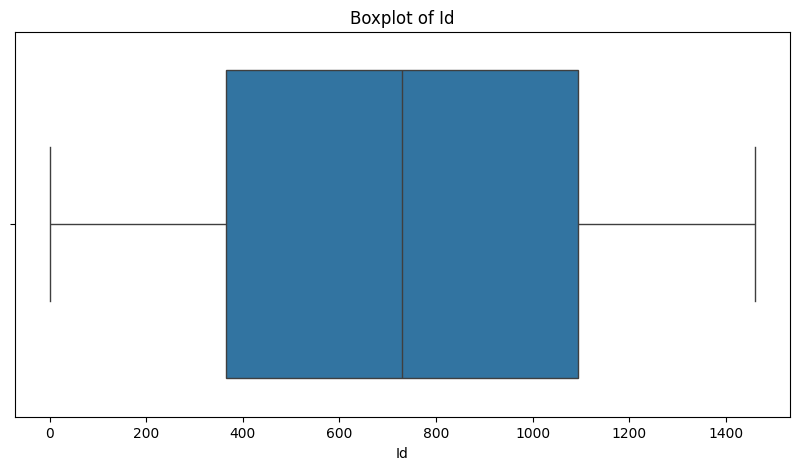

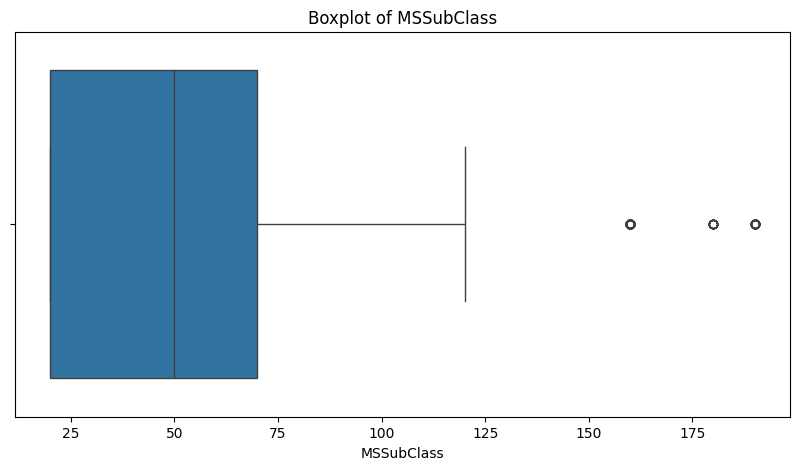

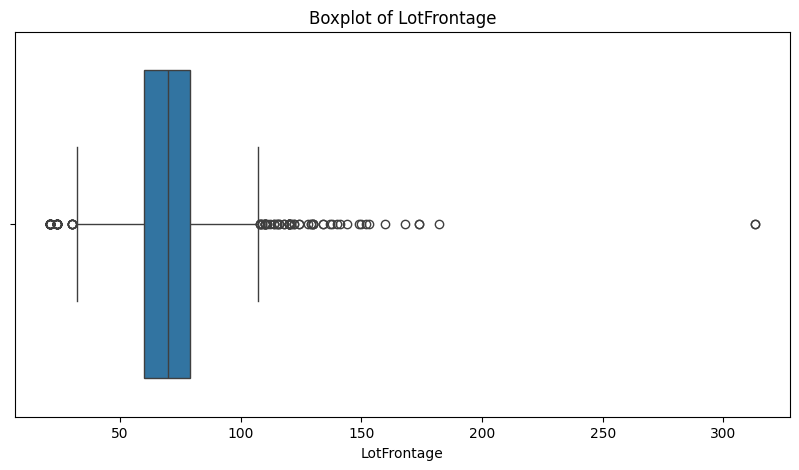

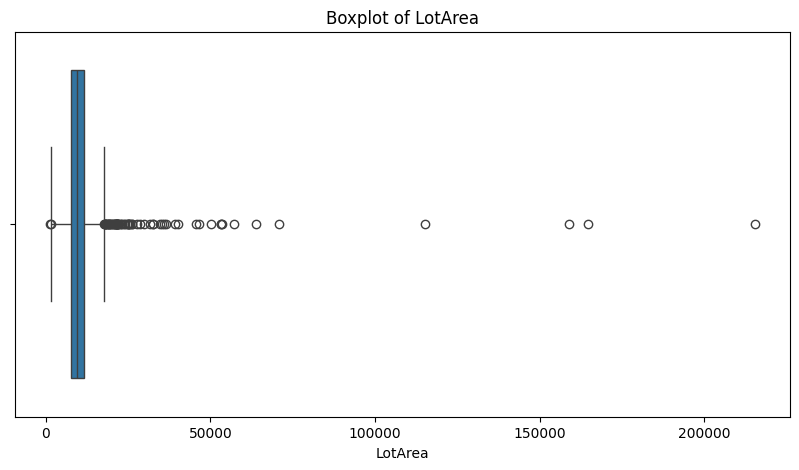

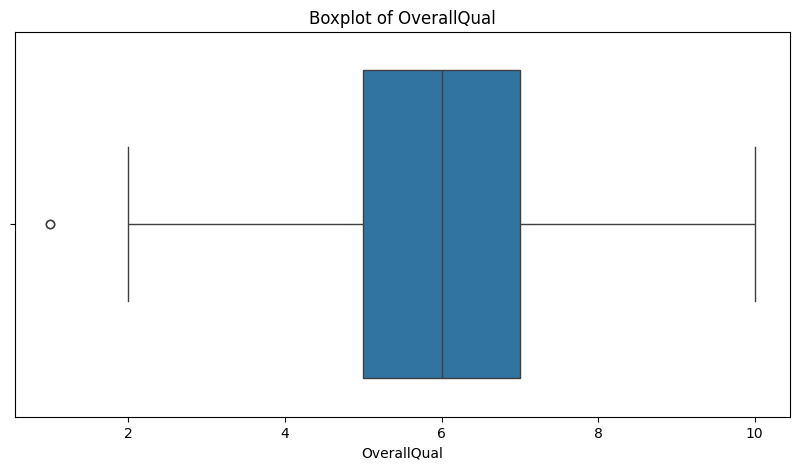

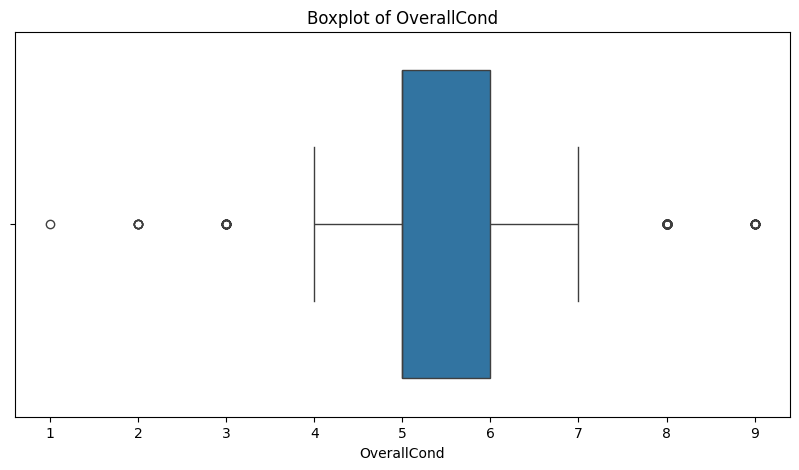

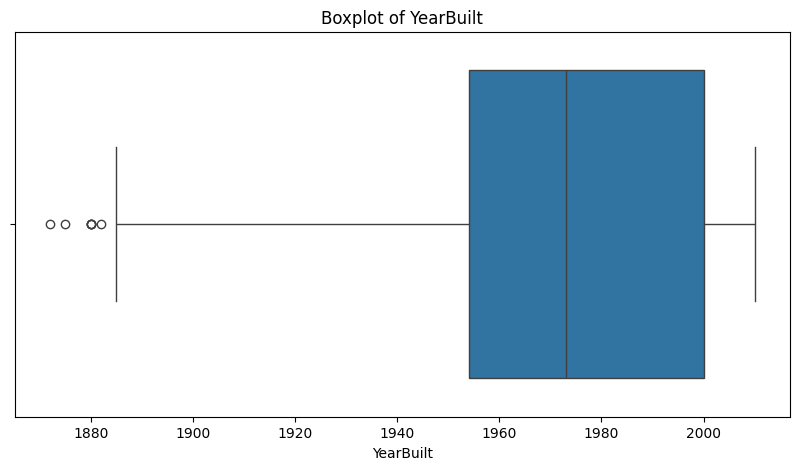

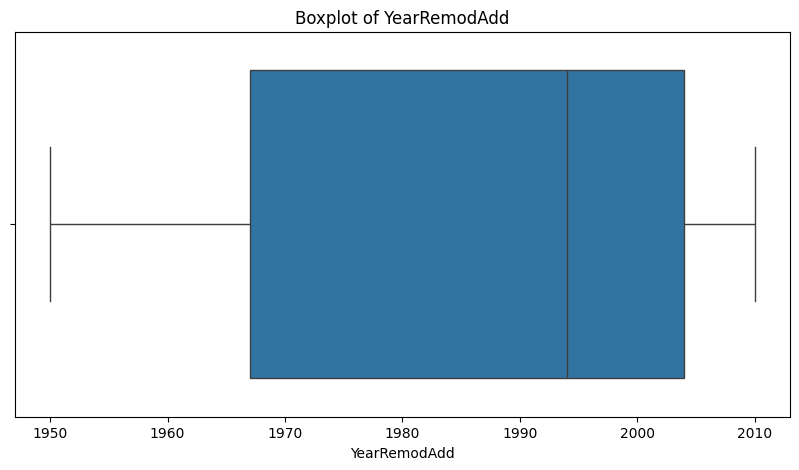

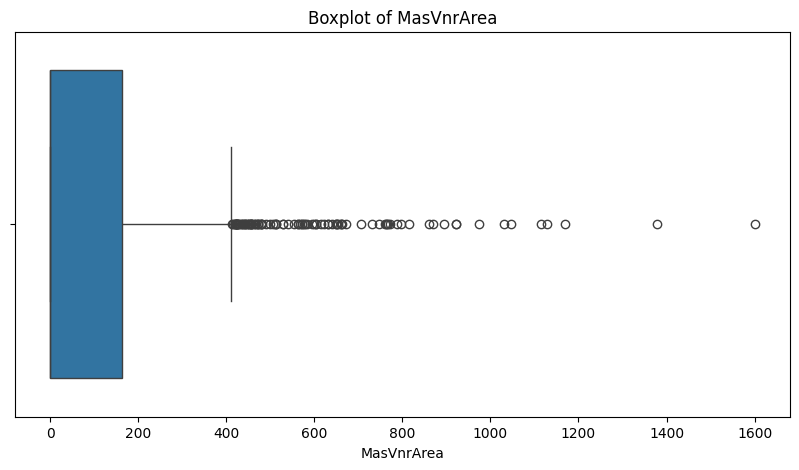

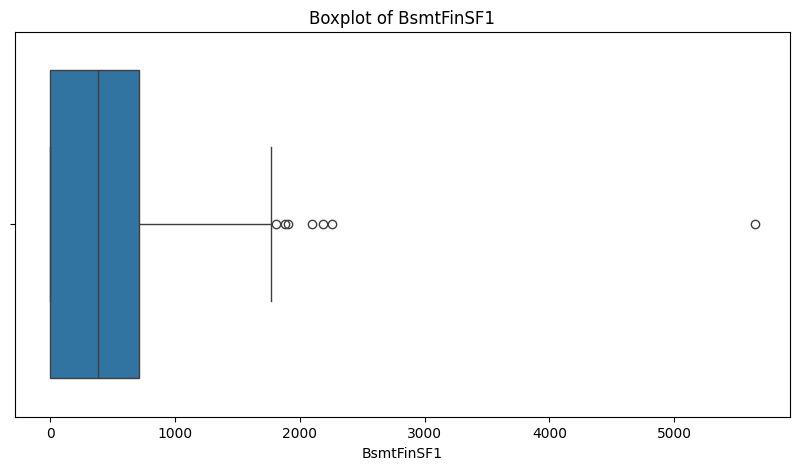

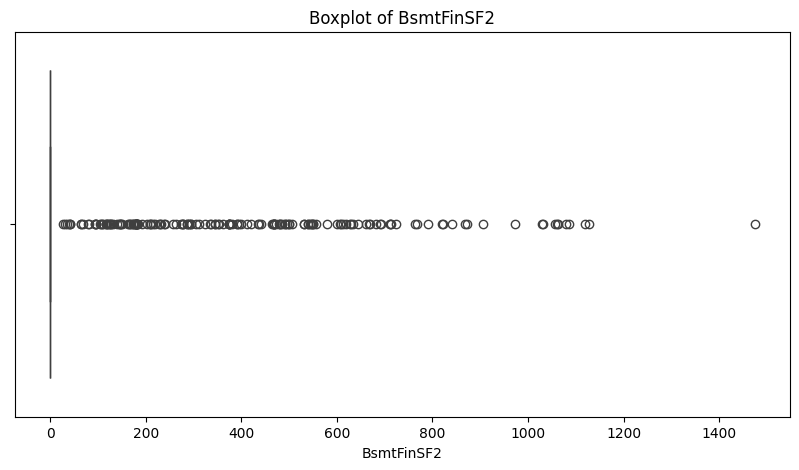

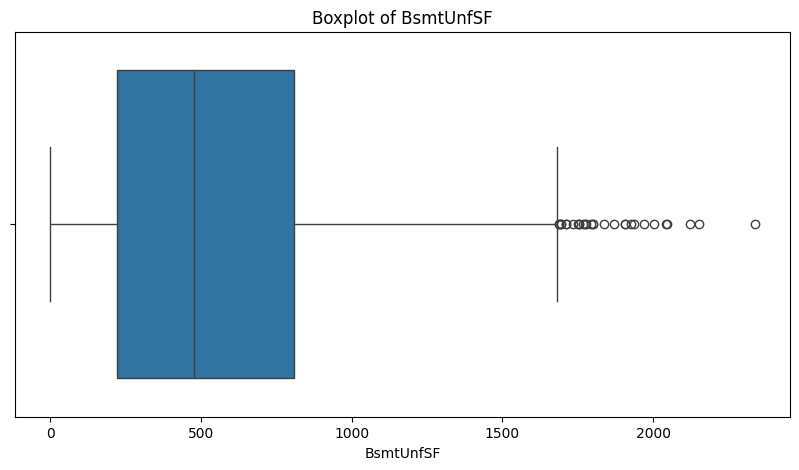

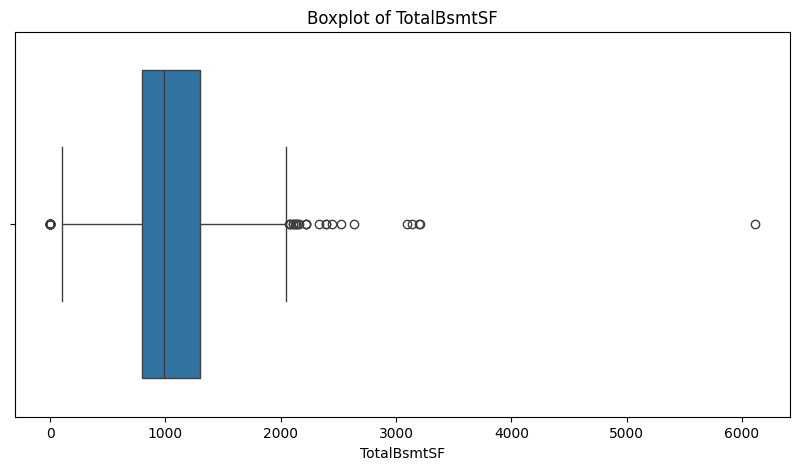

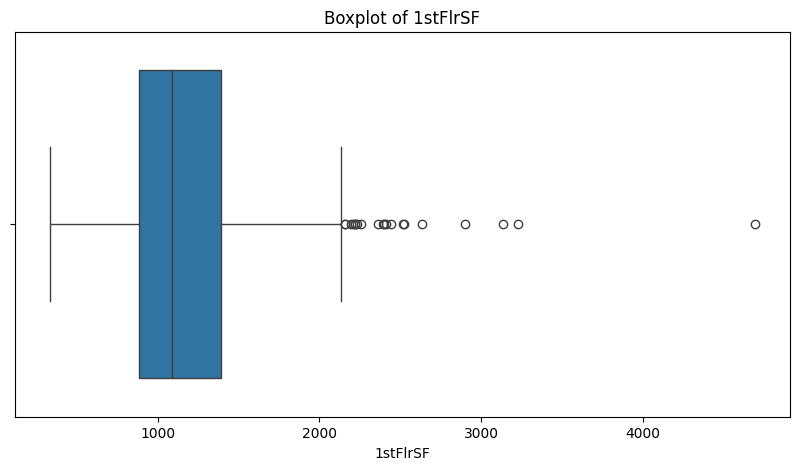

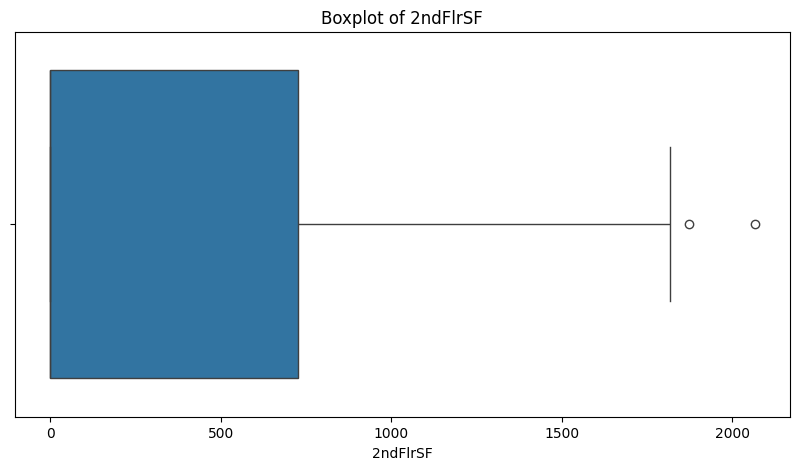

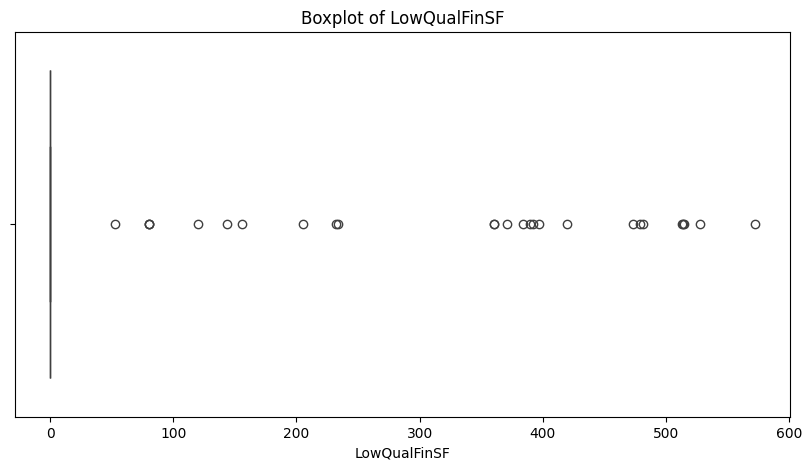

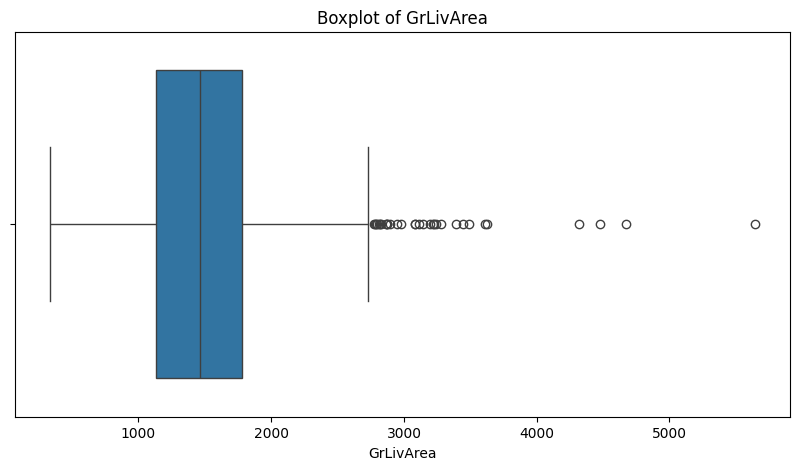

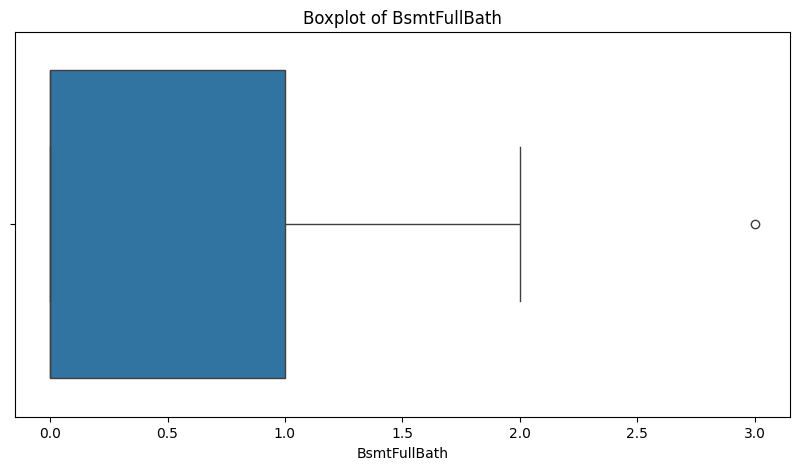

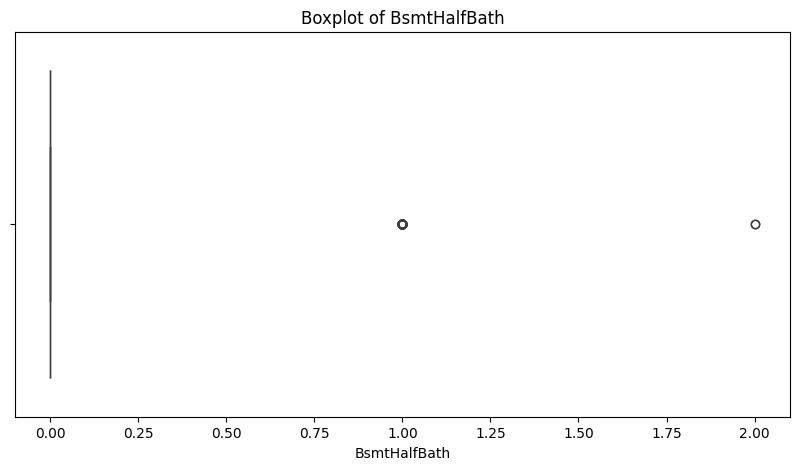

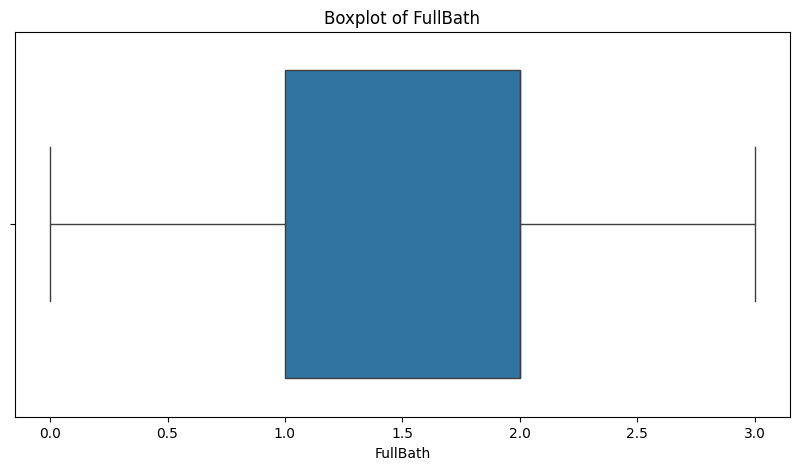

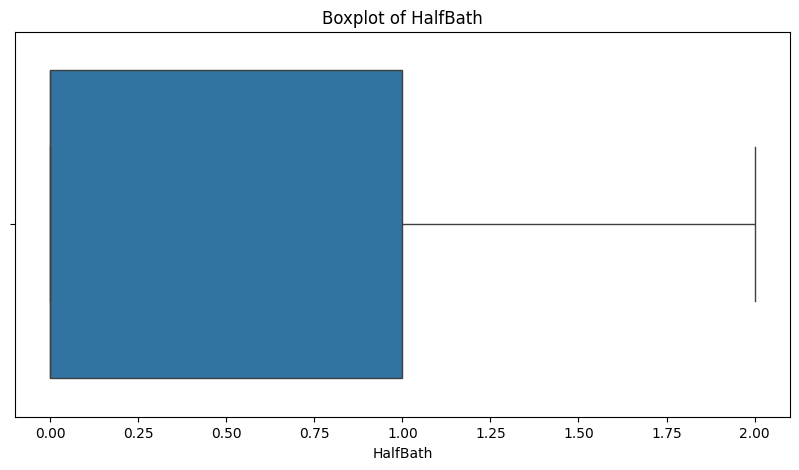

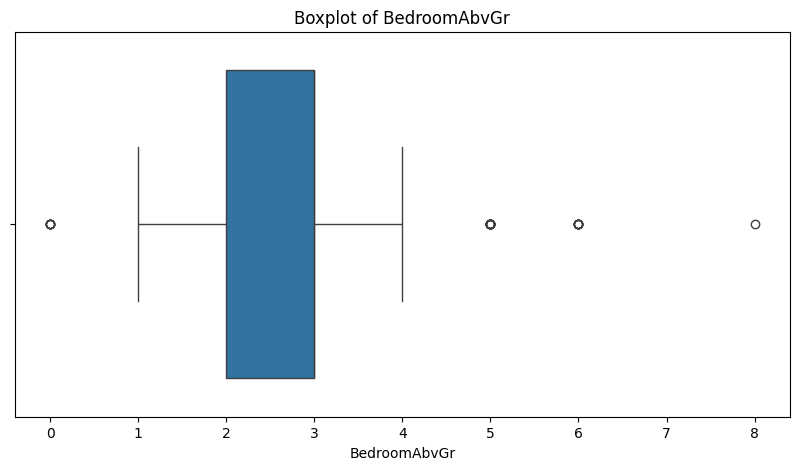

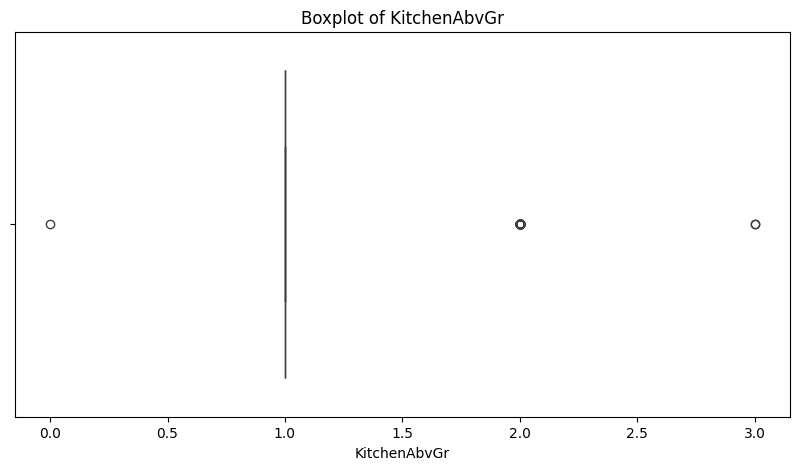

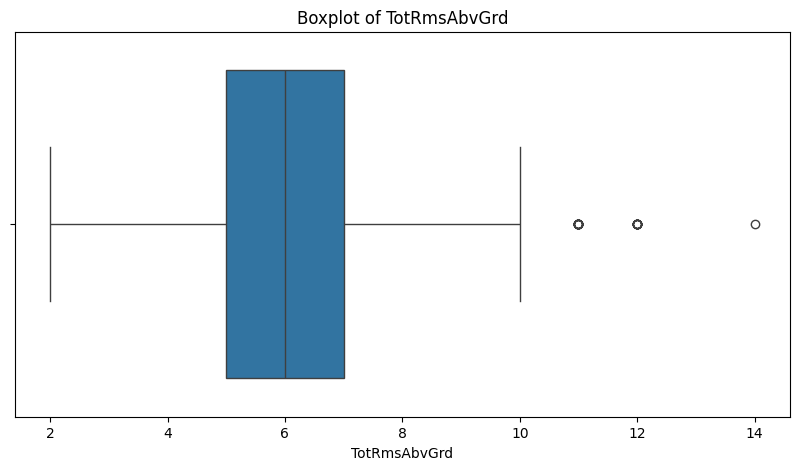

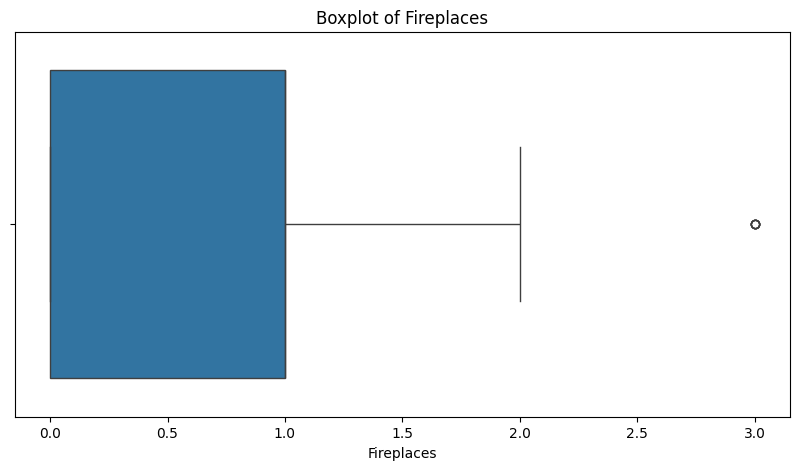

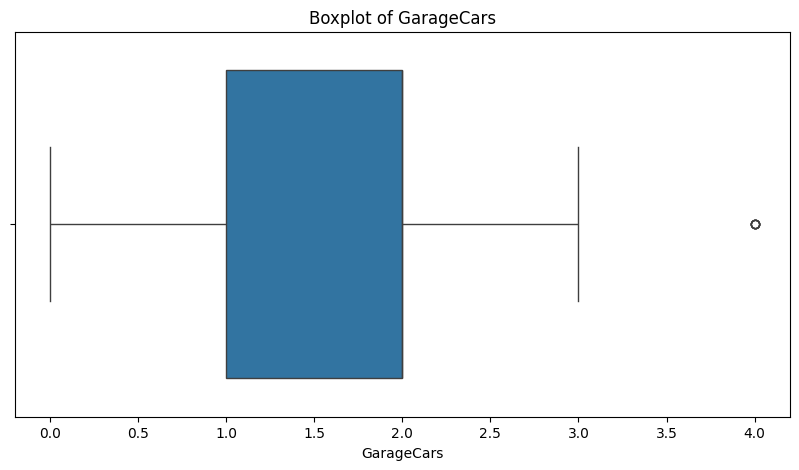

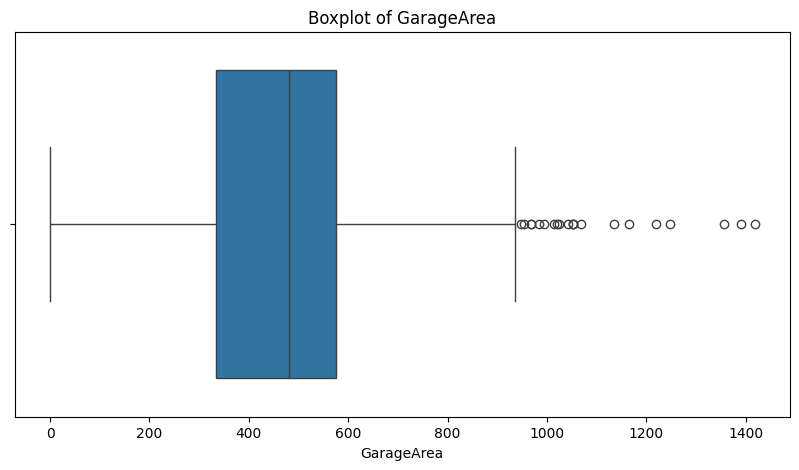

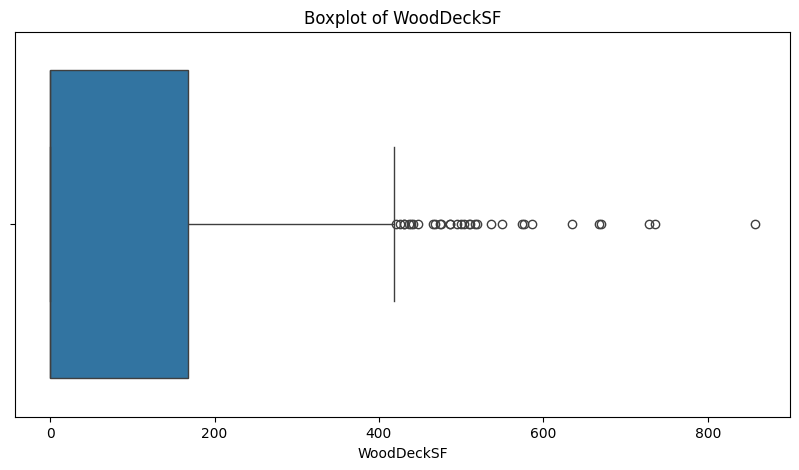

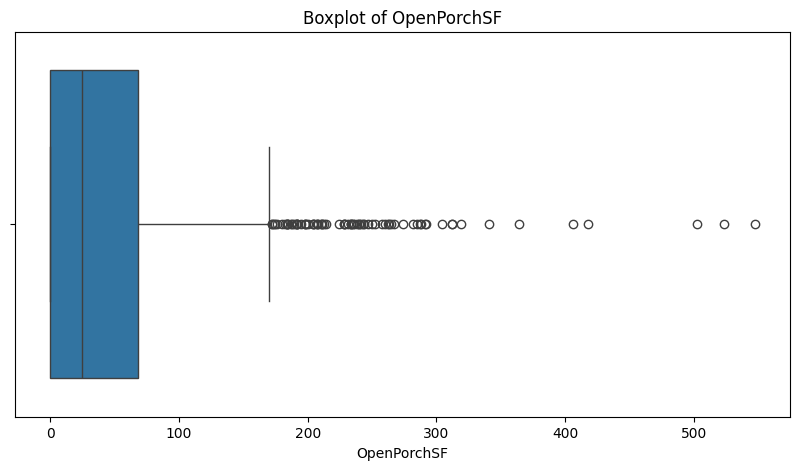

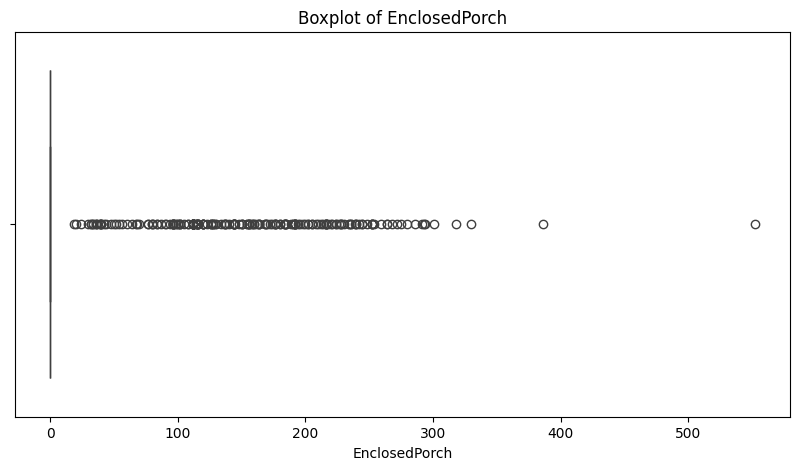

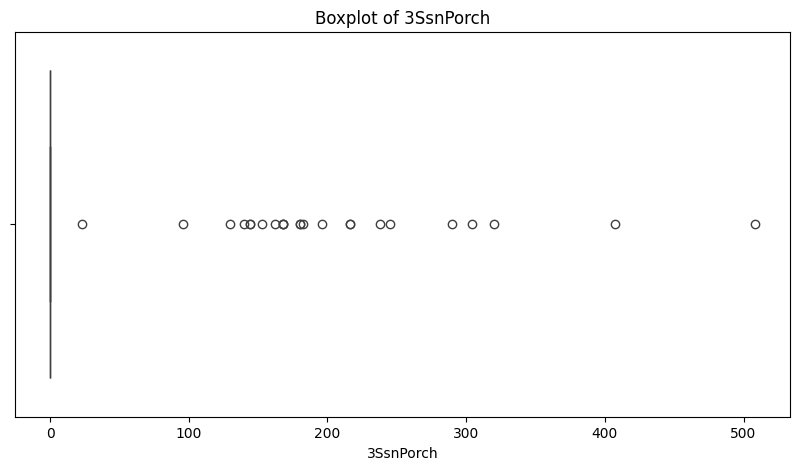

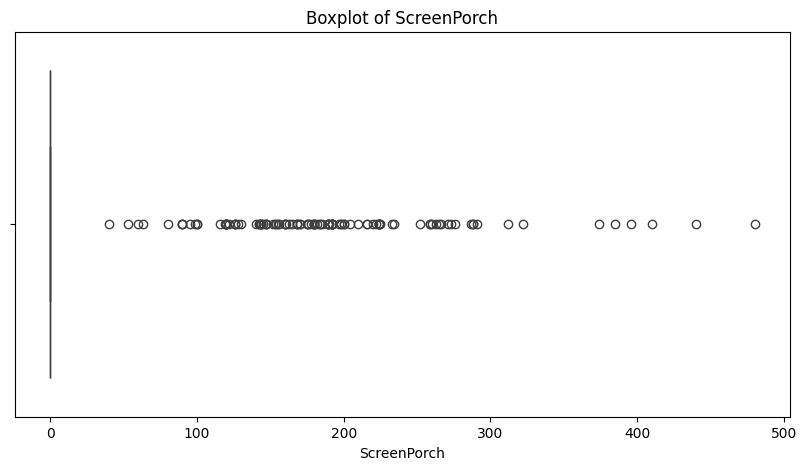

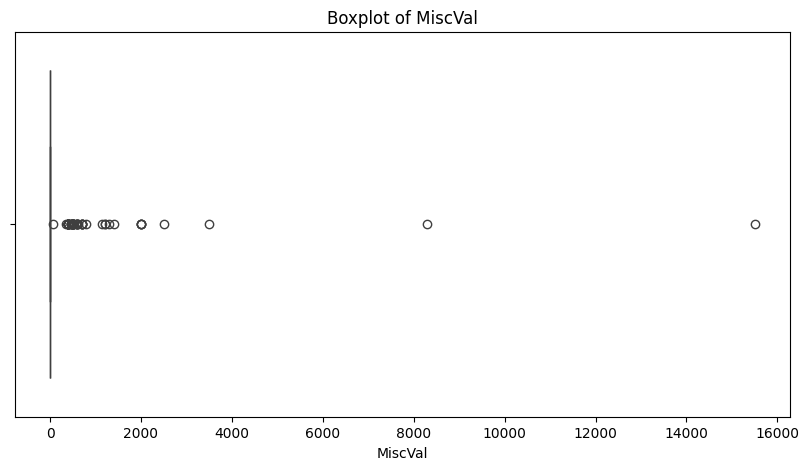

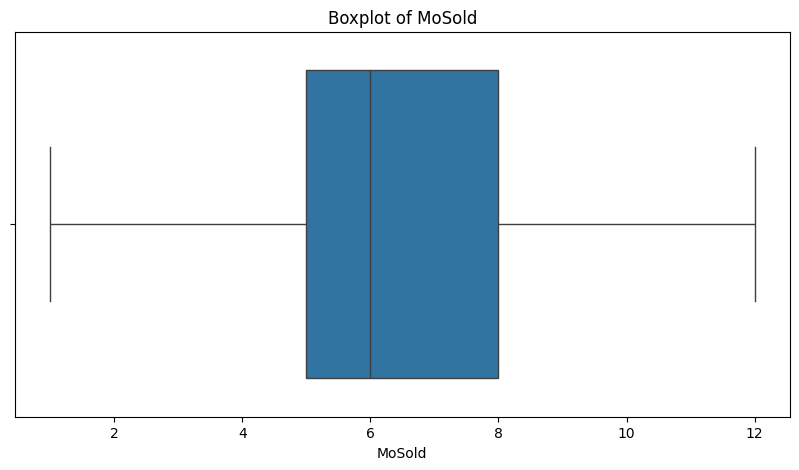

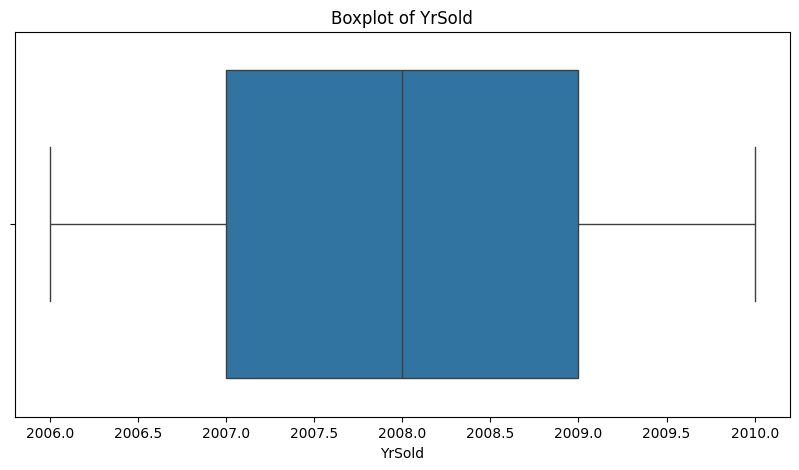

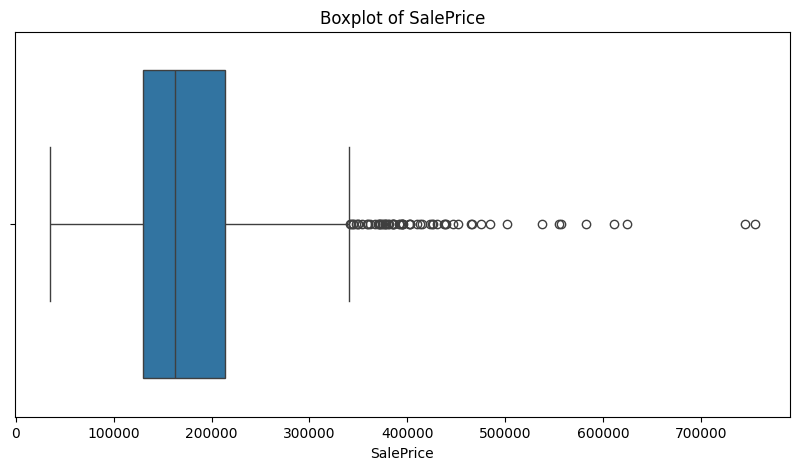

In [198]:
numerical_features = df_house.select_dtypes(include=['float64', 'int64'])

for column in numerical_features.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_house, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

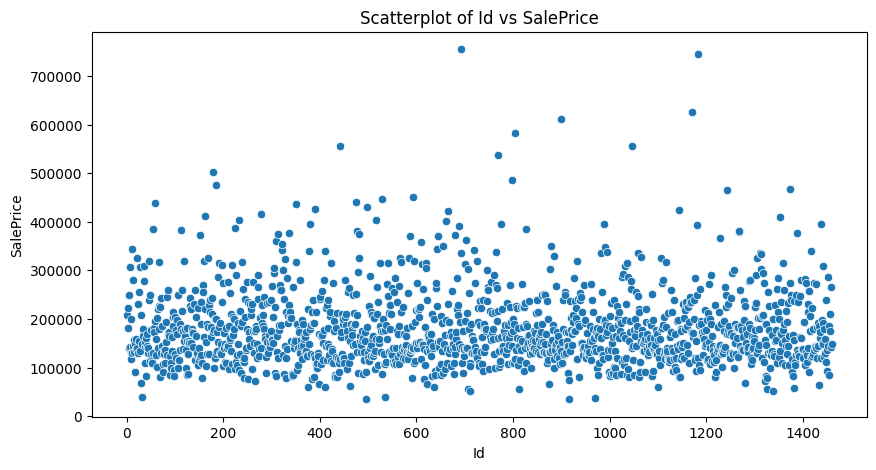

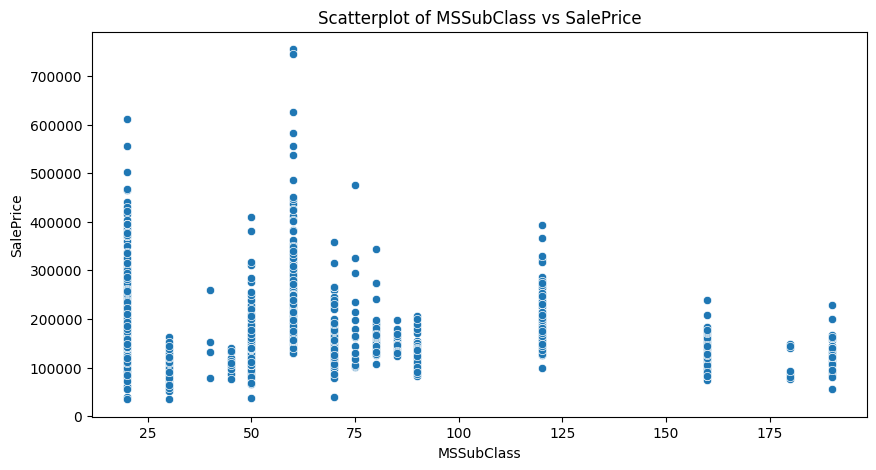

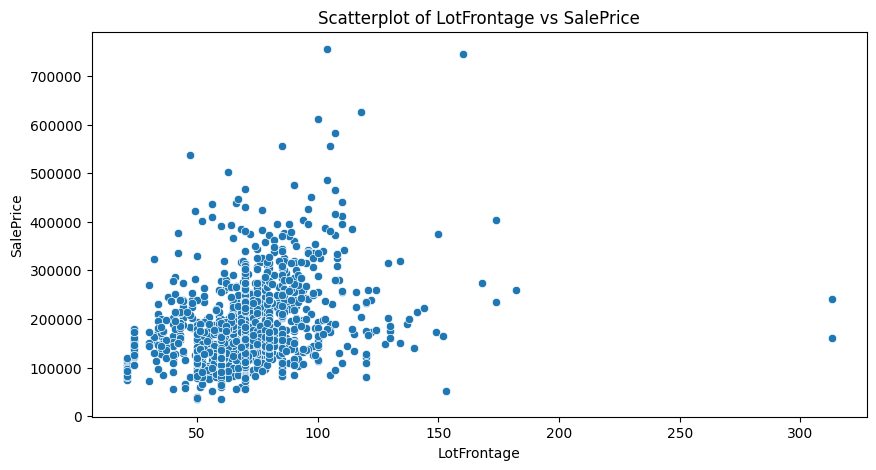

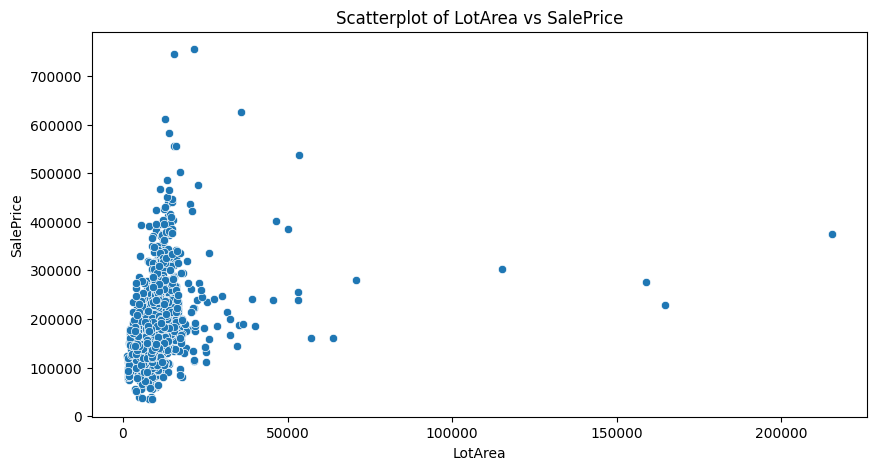

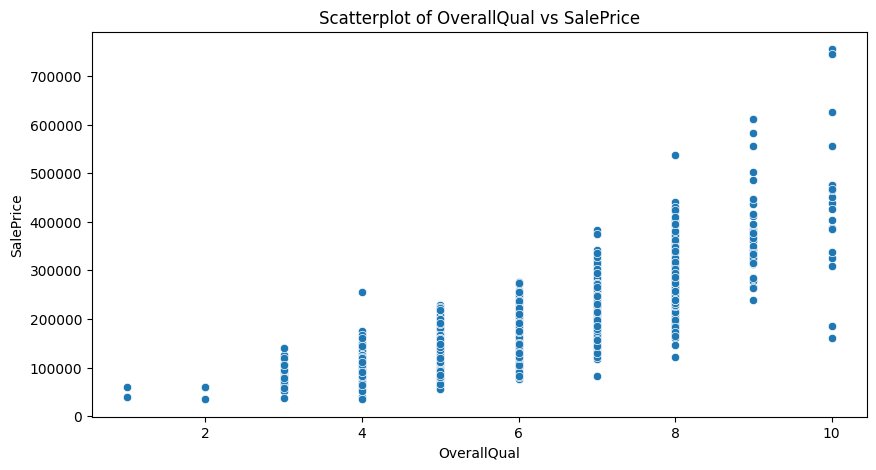

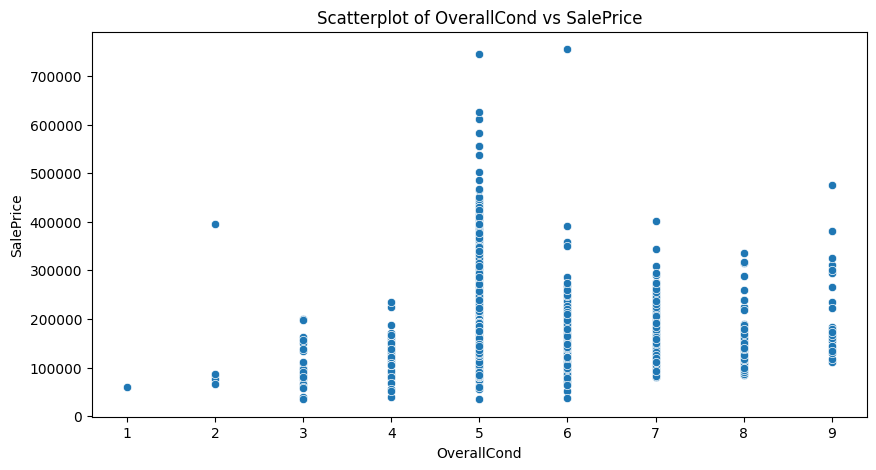

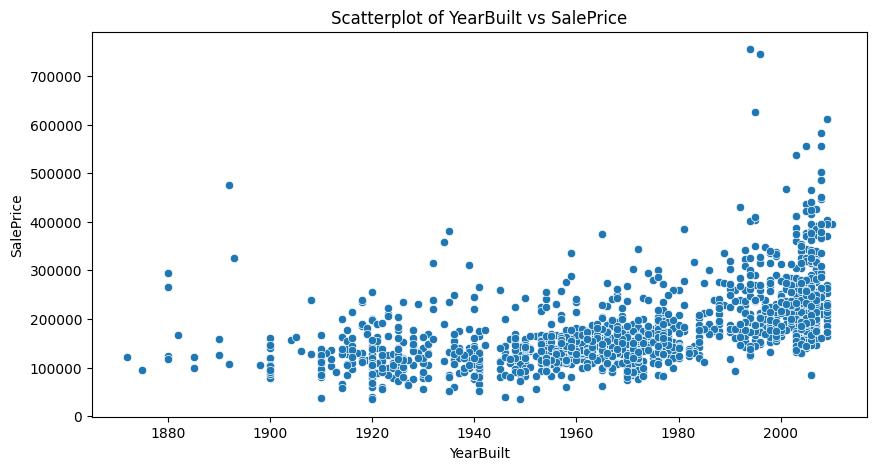

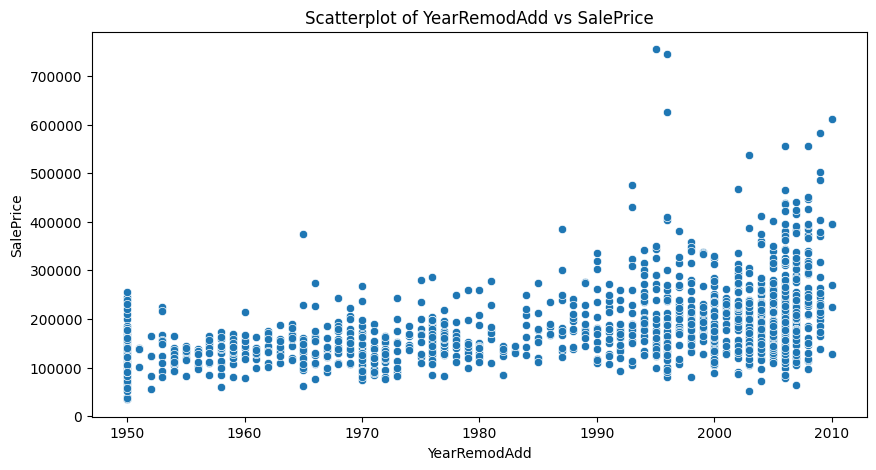

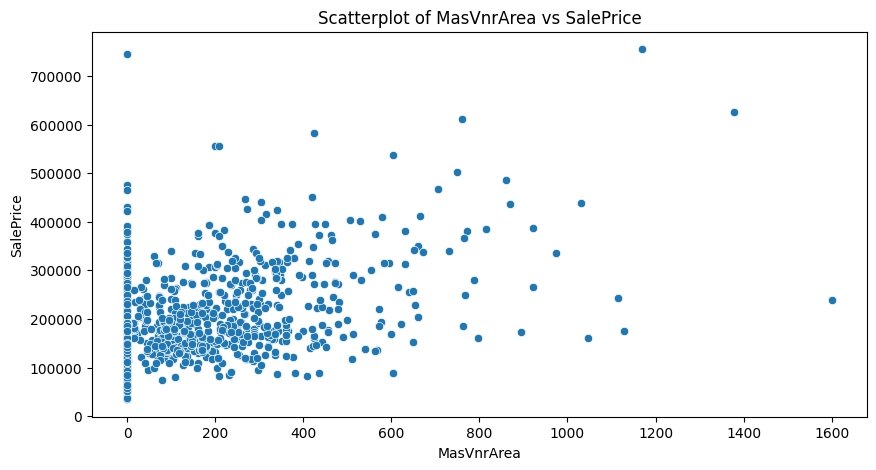

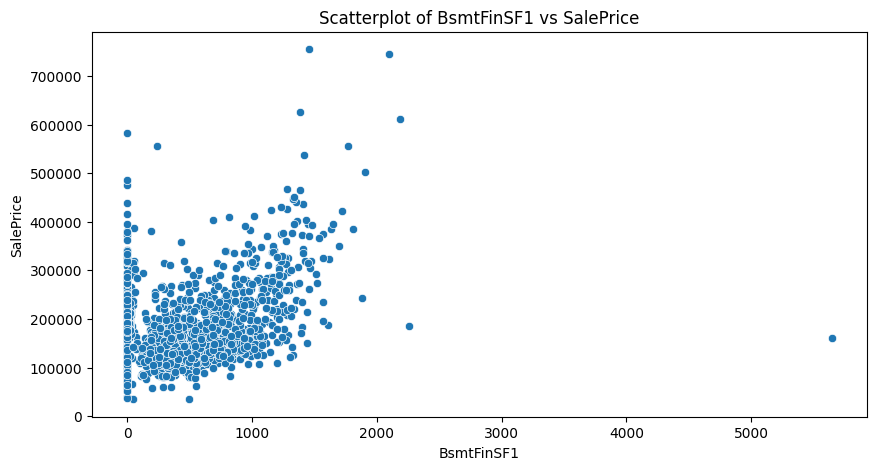

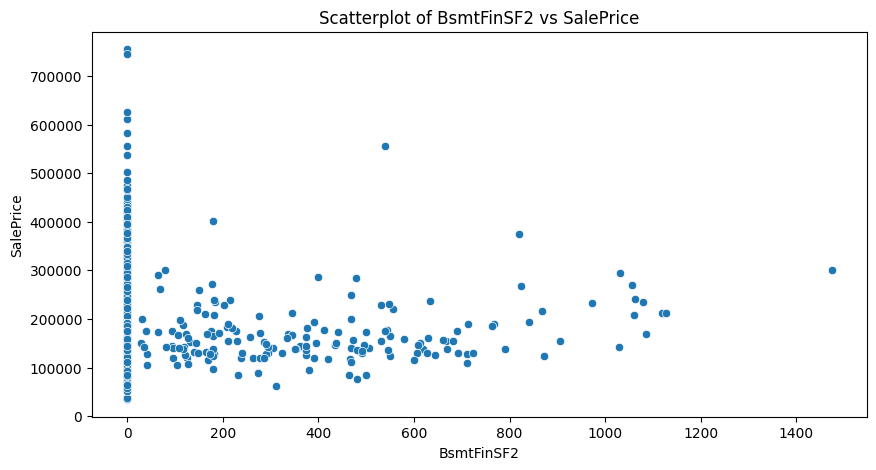

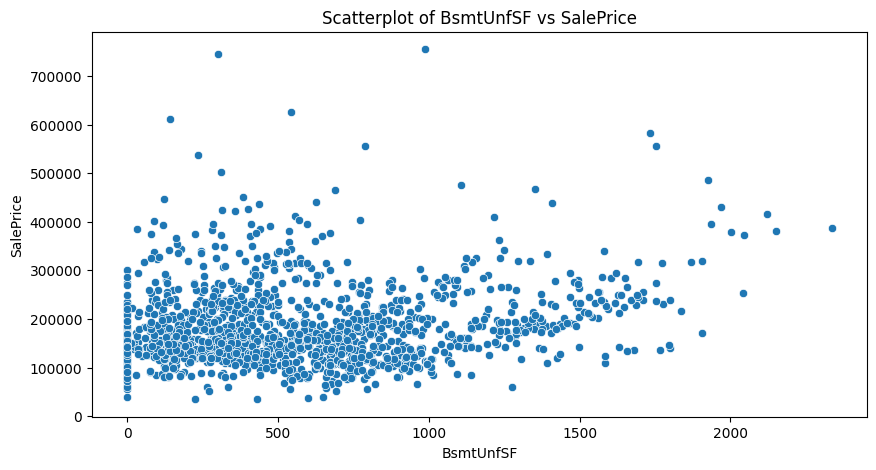

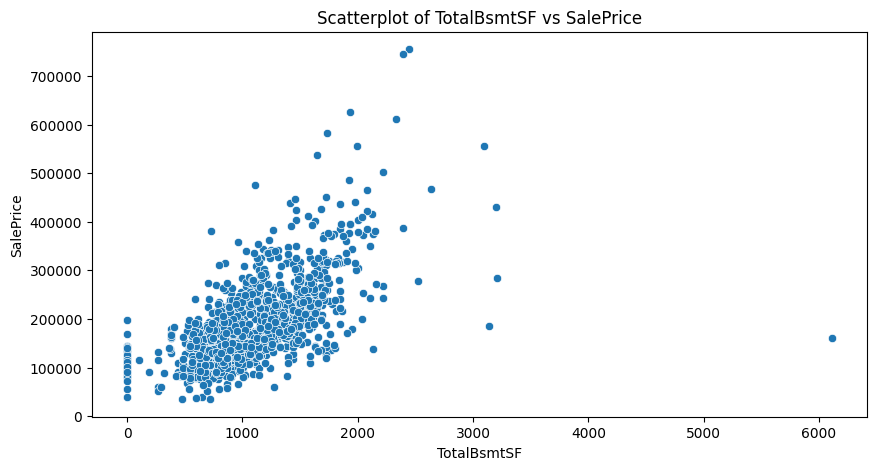

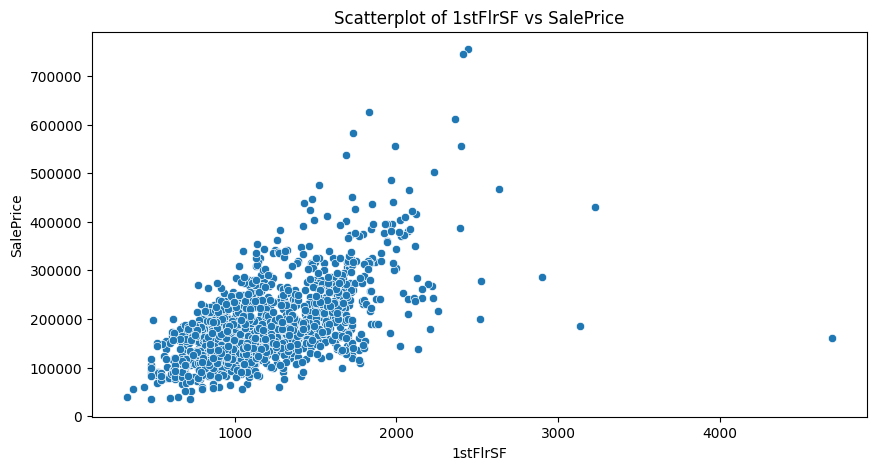

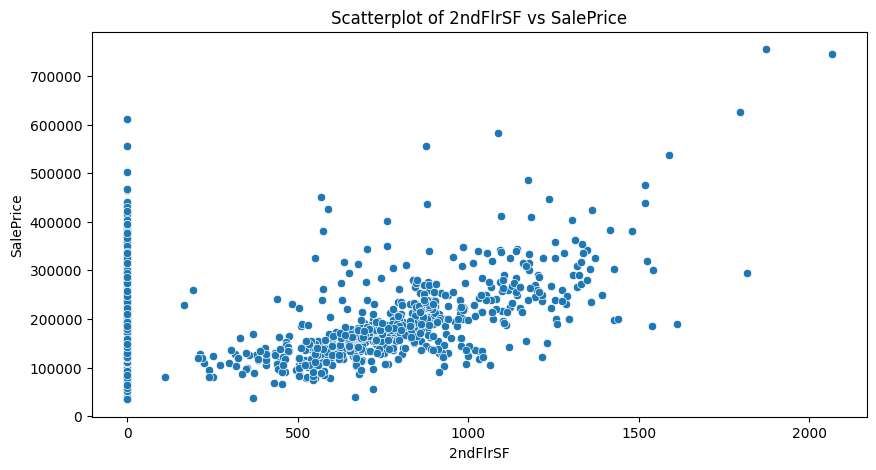

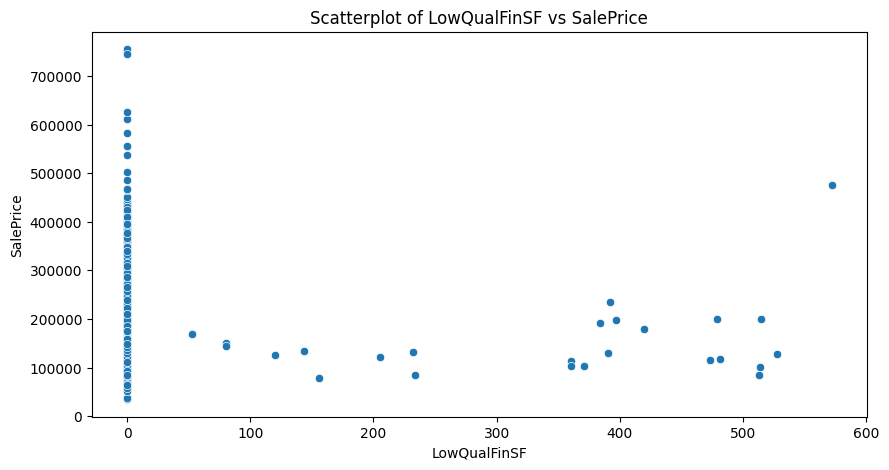

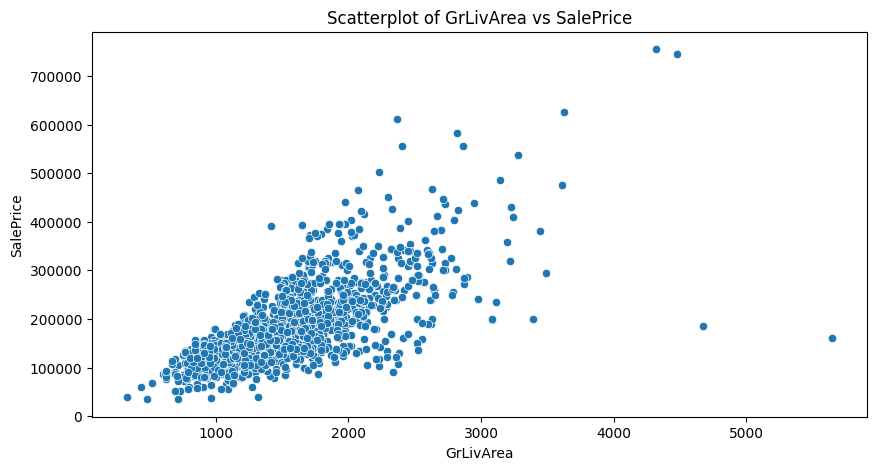

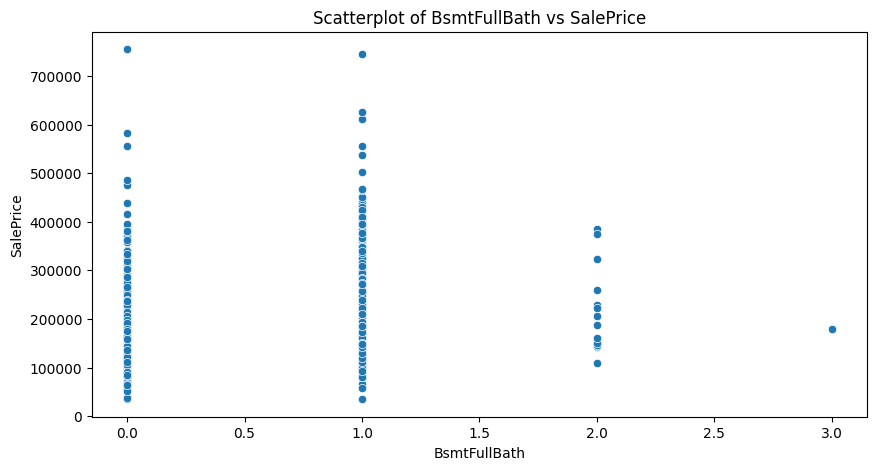

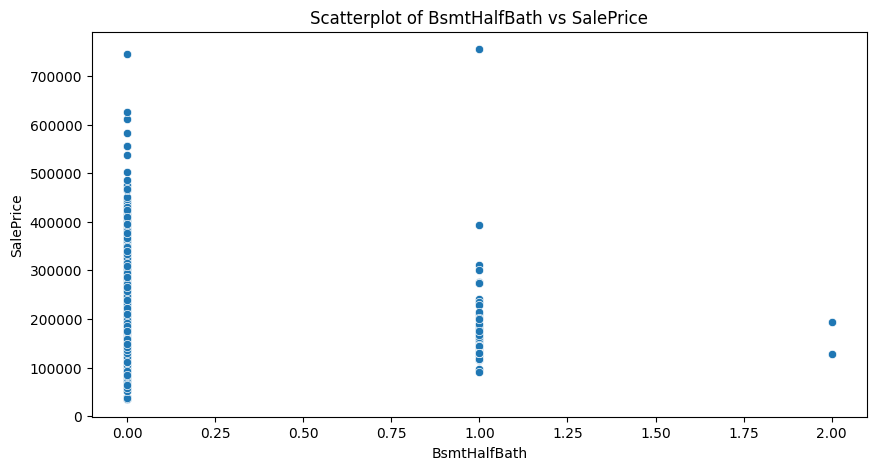

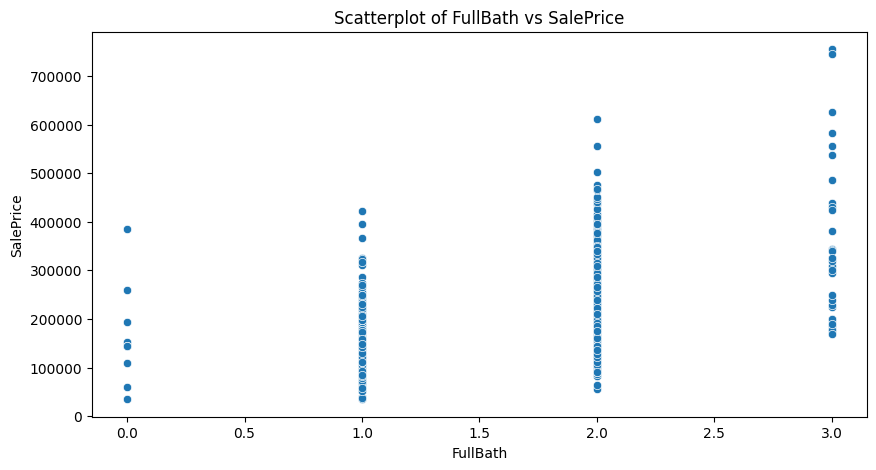

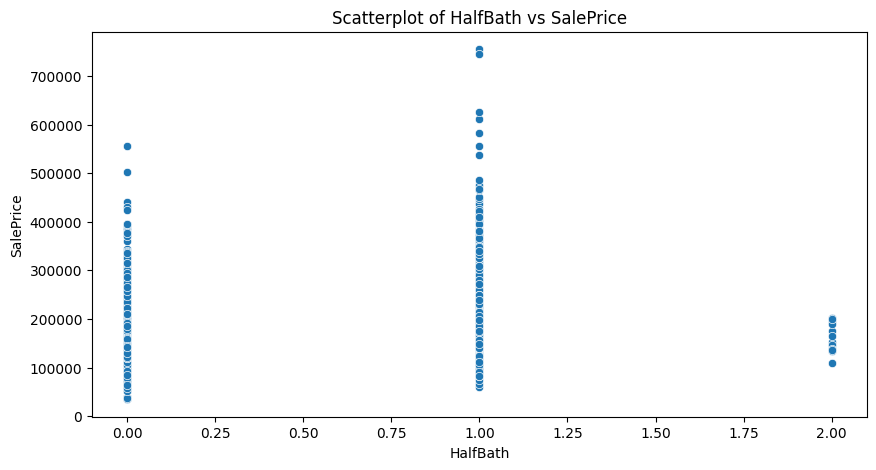

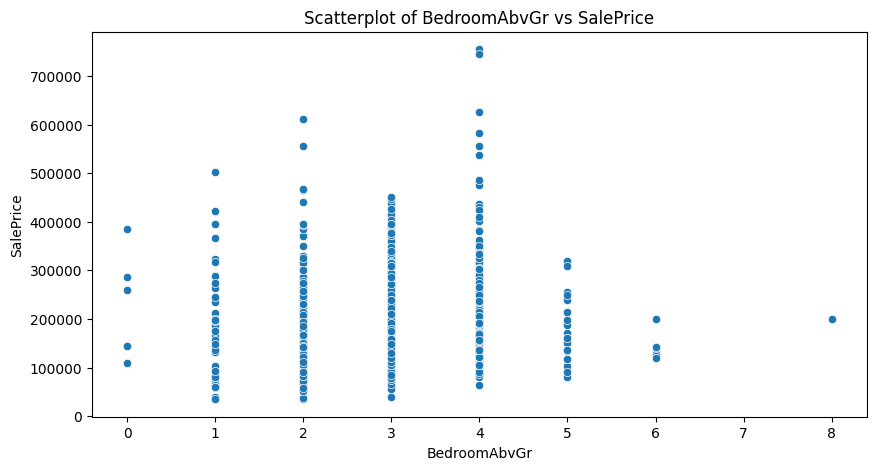

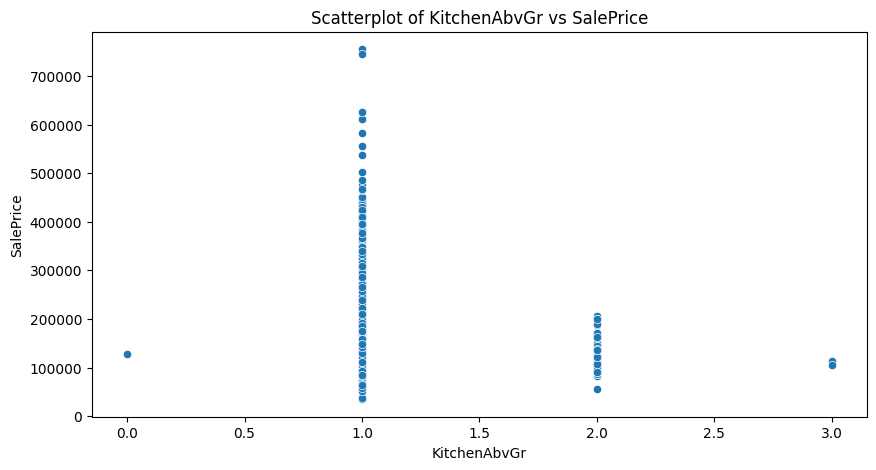

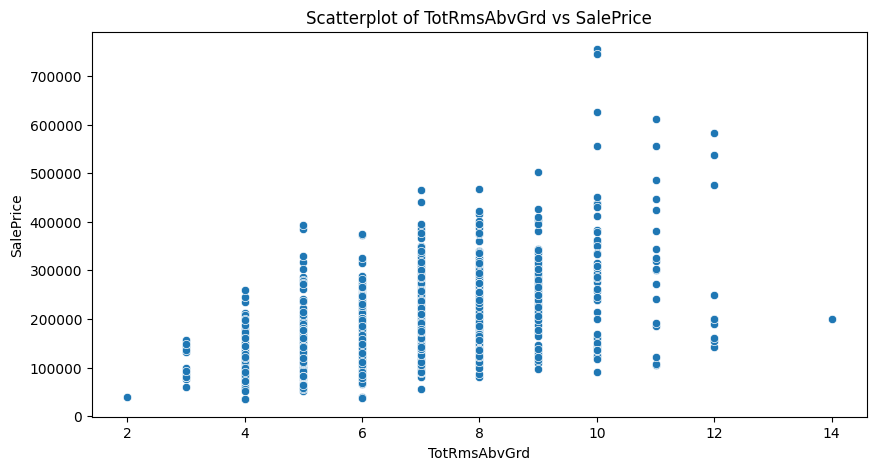

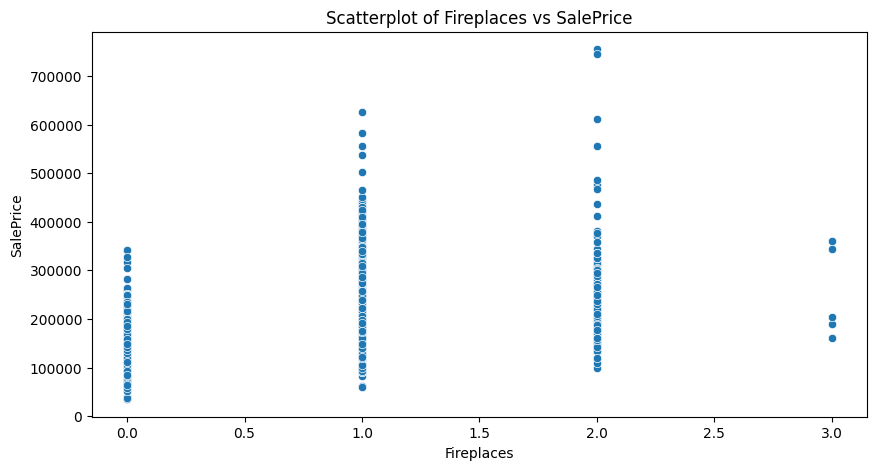

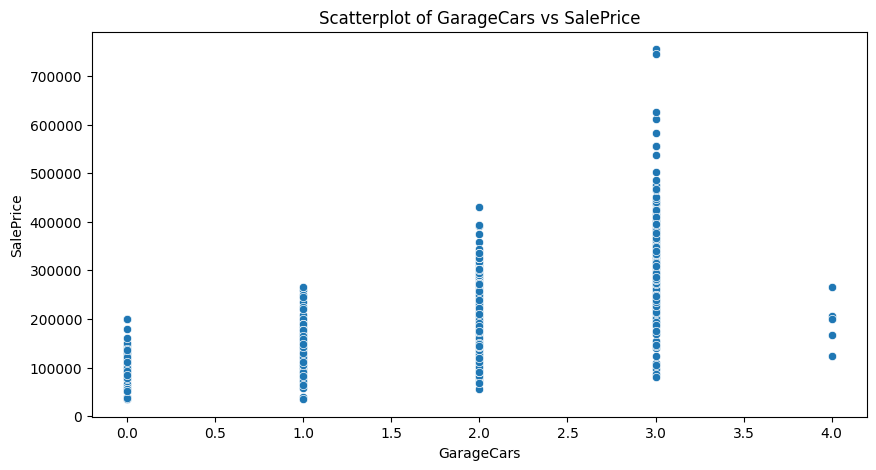

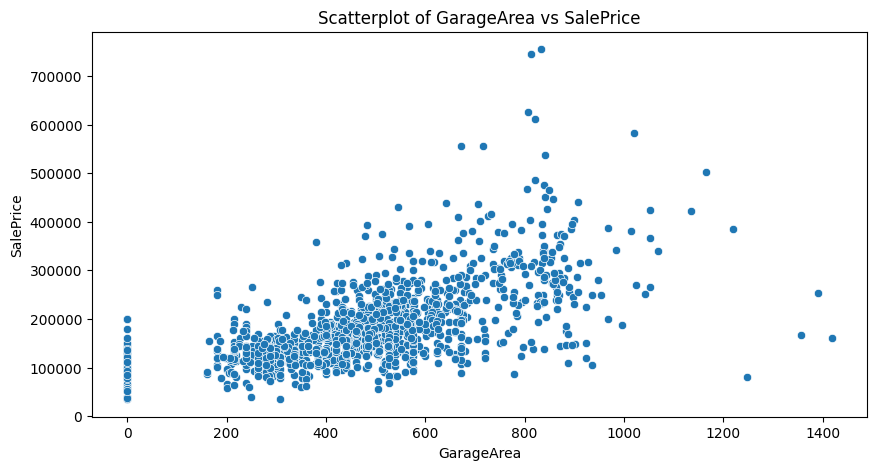

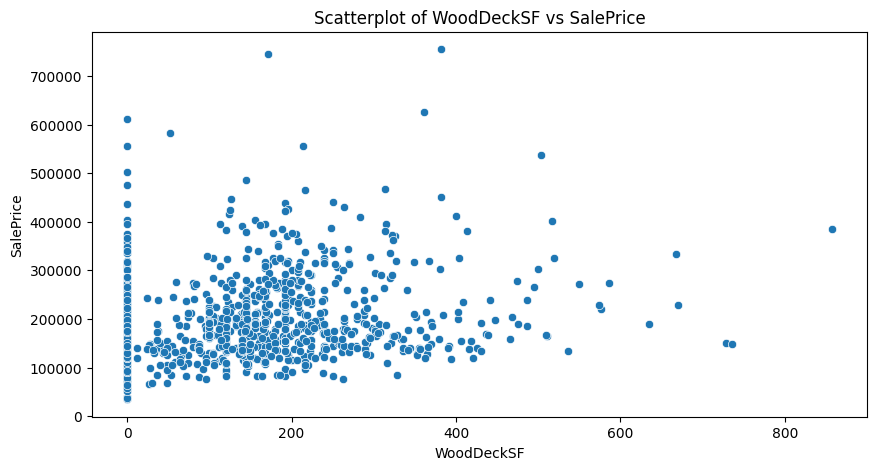

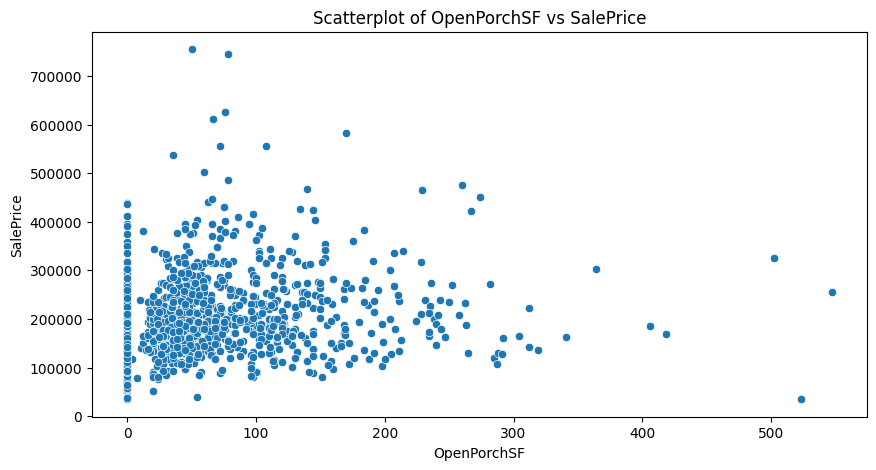

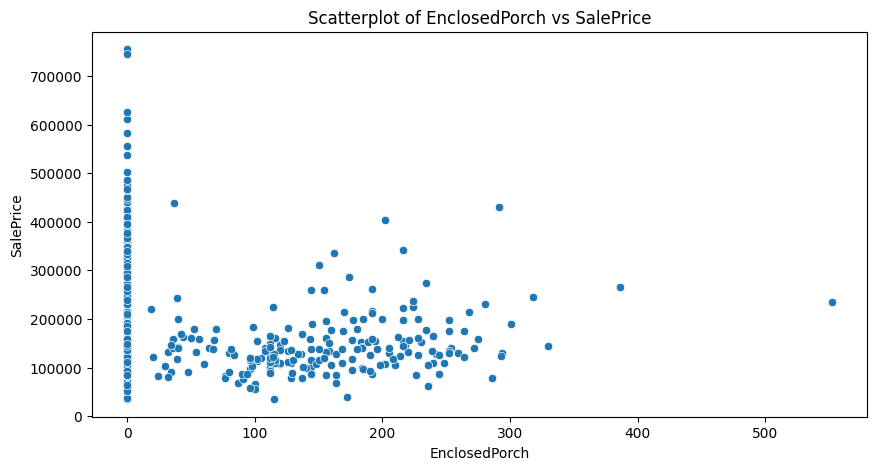

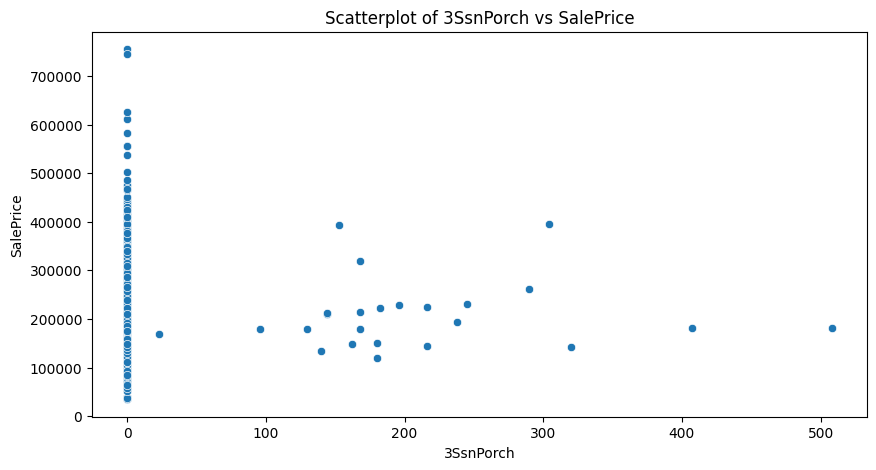

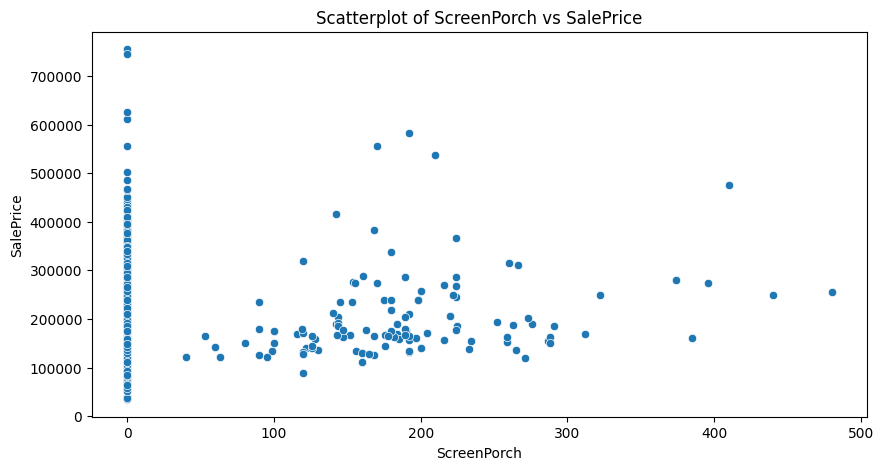

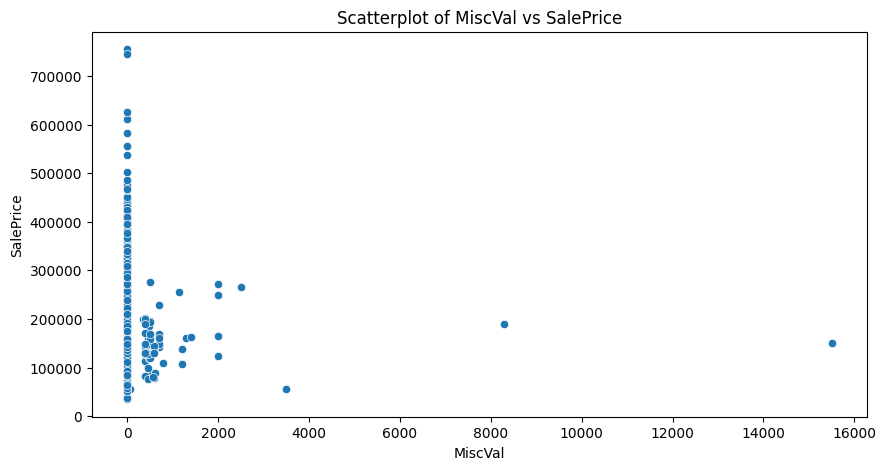

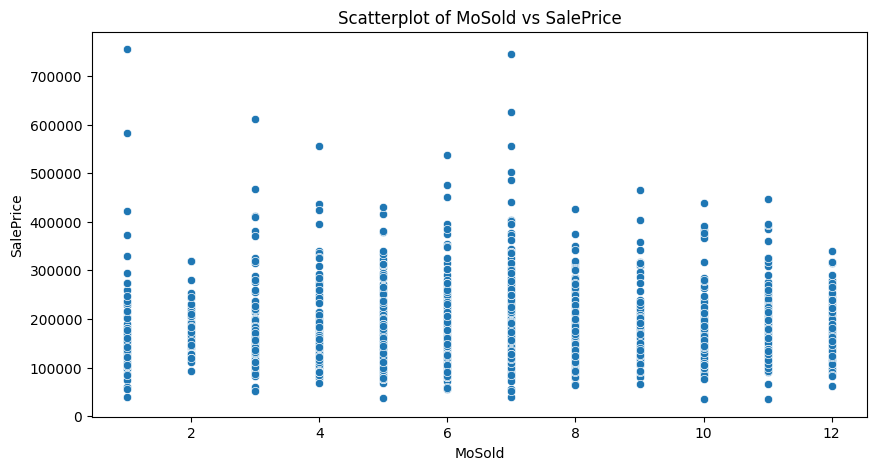

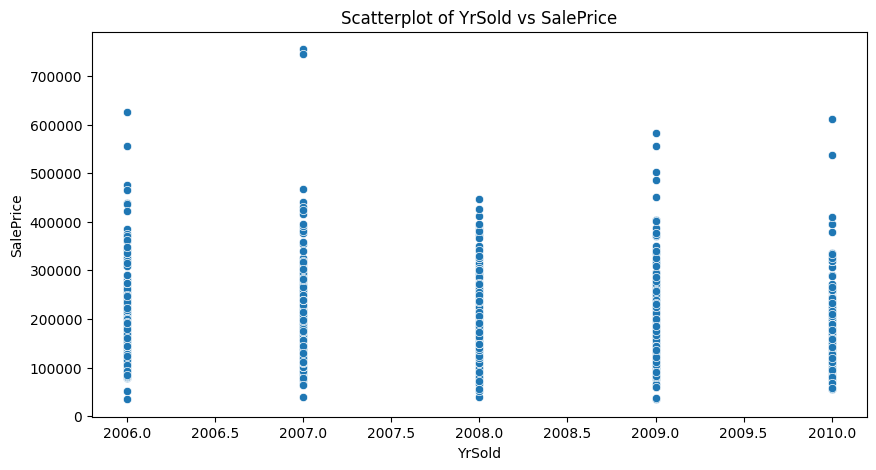

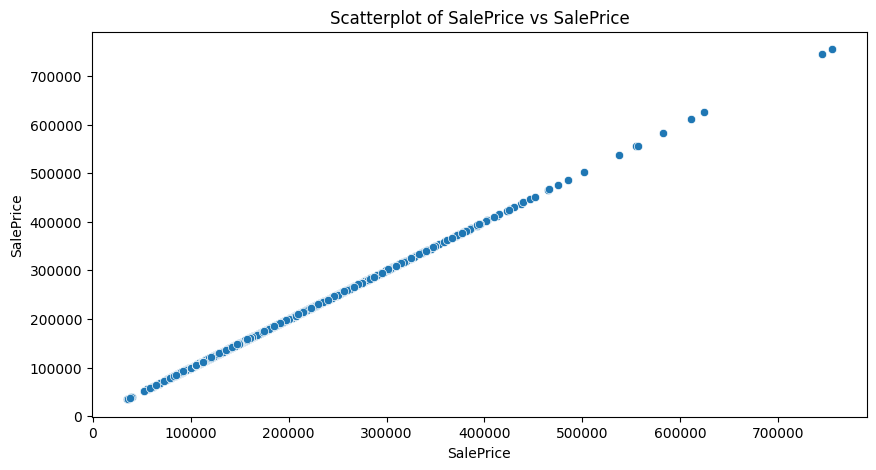

In [199]:
for column in numerical_features.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df_house, x=column, y='SalePrice')
    plt.title(f'Scatterplot of {column} vs SalePrice')
    plt.show()

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

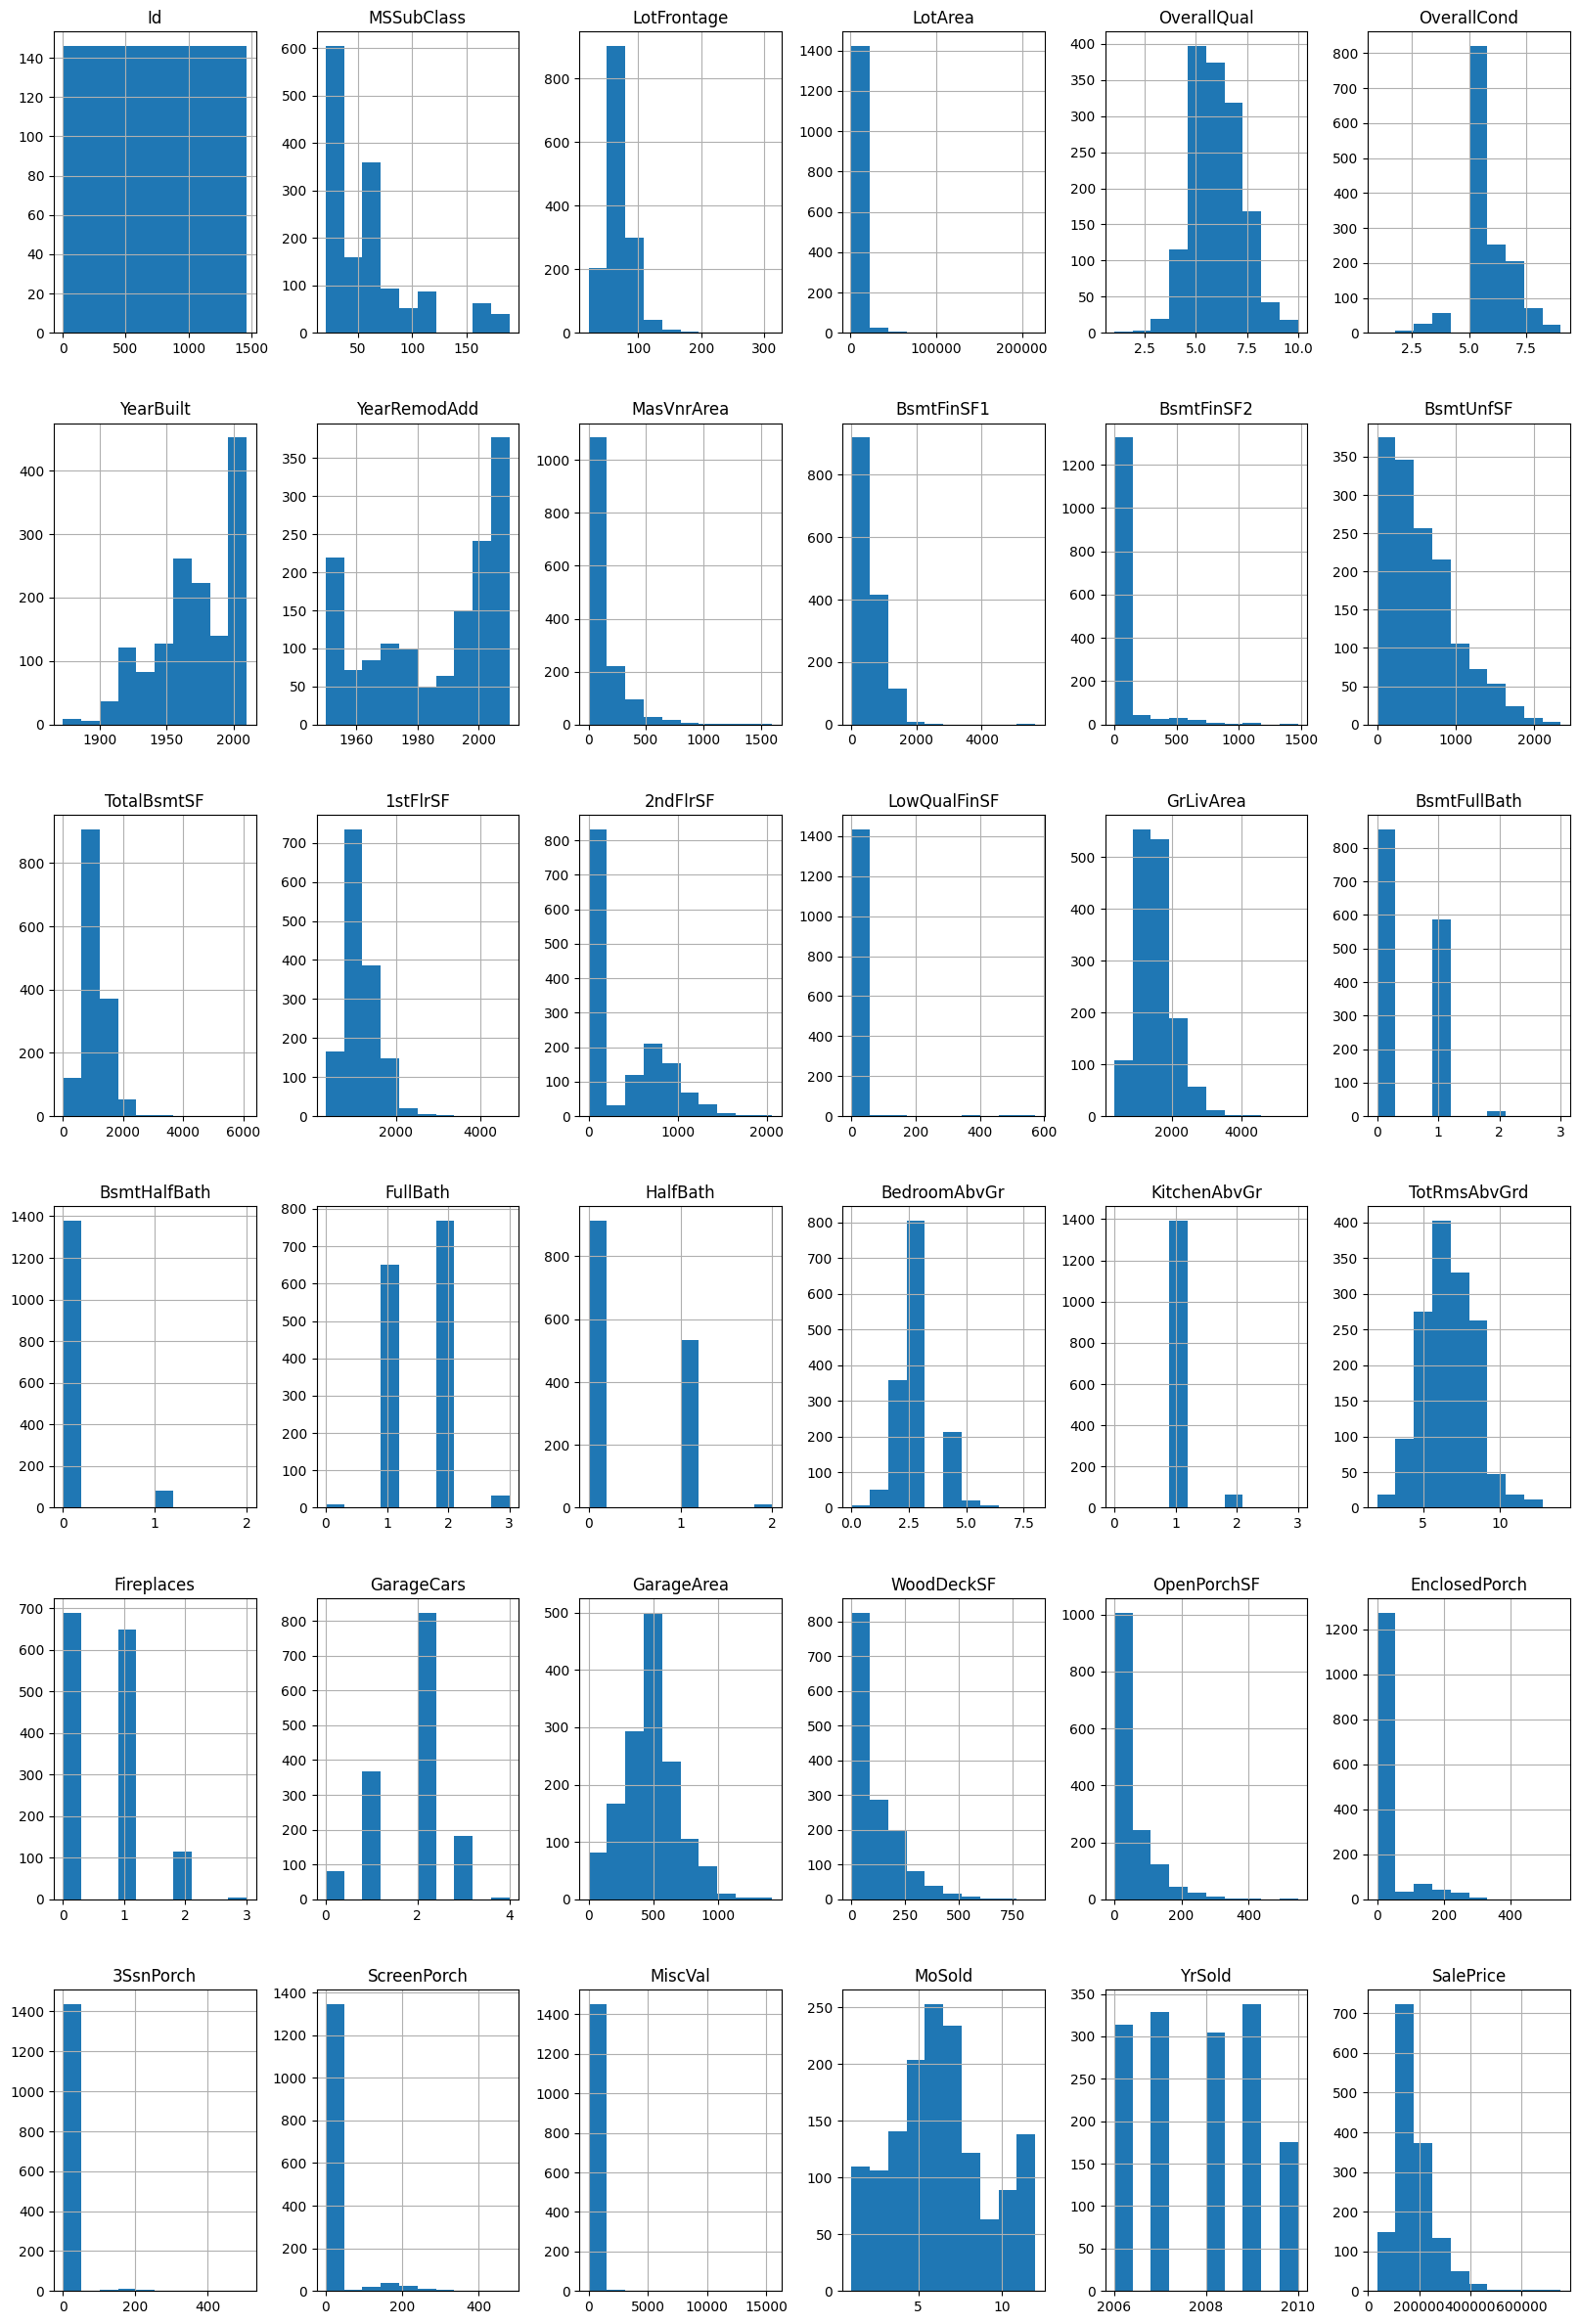

In [200]:
numerical_features.hist(figsize=(20,30))

In [201]:
df_house.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

#### Verificacion de Id y los datos respecto al boxplot

In [202]:
#Gracias a los Boxplot y a la informacion de las variables empezare a quitar algunos valores extremos
#de ciertas caracteristicas. Lo hare de forma manual y a mi criterio con la informacion que tengo
#para mantenerlo lo mas general posible

In [203]:
df_house[df_house['LotFrontage'] > 300]
#935 1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
934    935          20       RL        313.0    27650   Pave      IR2   
1298  1299          60       RL        313.0    63887   Pave      IR3   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
934          HLS    AllPub    Inside  ...           0             0         0   
1298         Bnk    AllPub    Corner  ...         292             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
934            0       0     11    2008        WD         Normal     242000  
1298           0       0      1    2008       New        Partial     160000  

[2 rows x 75 columns]

In [204]:
df_house[df_house['Id'] == 935]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
934  935          20       RL        313.0    27650   Pave      IR2   

    LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
934         HLS    AllPub    Inside  ...           0             0         0   

    ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
934           0       0     11    2008        WD         Normal     242000  

[1 rows x 75 columns]

In [205]:
df_house[df_house['LotArea'] > 100000]
# 314

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
249  250          50       RL    70.049958   159000   Pave      IR2   
313  314          20       RL   150.000000   215245   Pave      IR3   
335  336         190       RL    70.049958   164660   Grvl      IR1   
706  707          20       RL    70.049958   115149   Pave      IR2   

    LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
249         Low    AllPub   CulDSac  ...          98             0         0   
313         Low    AllPub    Inside  ...           0             0         0   
335         HLS    AllPub    Corner  ...           0             0         0   
706         Low    AllPub   CulDSac  ...          48             0         0   

    ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
249           0     500      6    2007        WD         Normal     277000  
313           0       0      6    2009        WD         Normal     375000  
335           0     700      8    2008        WD         Normal     228950  
706           0       0      6    2007        WD         Normal     302000  

[4 rows x 75 columns]

In [206]:
df_house[df_house['MasVnrArea'] > 1500]
#298

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
297  298          60       FV         66.0     7399   Pave      IR1   

    LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
297         Lvl    AllPub    Inside  ...          10             0         0   

    ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
297         198       0      6    2007        WD         Normal     239000  

[1 rows x 75 columns]

In [207]:
df_house[df_house['BsmtFinSF1'] > 5000]
#1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1298  1299          60       RL        313.0    63887   Pave      IR3   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
1298         Bnk    AllPub    Corner  ...         292             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1298           0       0      1    2008       New        Partial     160000  

[1 rows x 75 columns]

In [208]:
df_house[df_house['BsmtFinSF2'] > 1400]
#323

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
322  323          60       RL         86.0    10380   Pave      IR1   

    LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
322         Lvl    AllPub    Inside  ...          96             0         0   

    ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
322           0       0      8    2007        WD         Normal     301000  

[1 rows x 75 columns]

In [209]:
df_house[df_house['BsmtUnfSF'] > 2300]
#224

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
224  225          20       RL        103.0    13472   Pave      Reg   

    LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
224         Lvl    AllPub    Inside  ...         105             0         0   

    ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
224           0       0      6    2009        WD         Normal     386250  

[1 rows x 75 columns]

In [210]:
df_house[df_house['TotalBsmtSF'] > 5900]
#1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1298  1299          60       RL        313.0    63887   Pave      IR3   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
1298         Bnk    AllPub    Corner  ...         292             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1298           0       0      1    2008       New        Partial     160000  

[1 rows x 75 columns]

In [211]:
df_house[df_house['1stFlrSF'] > 4000]
#1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1298  1299          60       RL        313.0    63887   Pave      IR3   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
1298         Bnk    AllPub    Corner  ...         292             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1298           0       0      1    2008       New        Partial     160000  

[1 rows x 75 columns]

In [212]:
df_house[df_house['2ndFlrSF'] > 2000]
#1183

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
1182  1183          60       RL        160.0    15623   Pave      IR1   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
1182         Lvl    AllPub    Corner  ...          78             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1182           0       0      7    2007        WD        Abnorml     745000  

[1 rows x 75 columns]

In [213]:
df_house[df_house['GrLivArea'] > 4000]
#1299

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
523    524          60       RL        130.0    40094   Pave      IR1   
691    692          60       RL        104.0    21535   Pave      IR1   
1182  1183          60       RL        160.0    15623   Pave      IR1   
1298  1299          60       RL        313.0    63887   Pave      IR3   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
523          Bnk    AllPub    Inside  ...         406             0         0   
691          Lvl    AllPub    Corner  ...          50             0         0   
1182         Lvl    AllPub    Corner  ...          78             0         0   
1298         Bnk    AllPub    Corner  ...         292             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
523            0       0     10    2007       New        Partial     184750  
691            0       0      1    2007        WD         Normal     755000  
1182           0       0      7    2007        WD        Abnorml     745000  
1298           0       0      1    2008       New        Partial     160000  

[4 rows x 75 columns]

In [214]:
df_house[df_house['BsmtFullBath'] > 2]
#739

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
738  739          90       RL         60.0    10800   Pave      Reg   

    LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
738         Lvl    AllPub    Inside  ...           0             0         0   

    ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
738           0       0      3    2009        WD         Alloca     179000  

[1 rows x 75 columns]

In [215]:
df_house[df_house['HalfBath'] > 1]


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
188    189          90       RL    64.000000     7018   Pave      Reg   
298    299          60       RL    90.000000    11700   Pave      Reg   
597    598         120       RL    53.000000     3922   Pave      Reg   
624    625          60       RL    80.000000    10400   Pave      Reg   
628    629          60       RL    70.000000    11606   Pave      IR1   
921    922          90       RL    67.000000     8777   Pave      Reg   
1154  1155          60       RL    70.049958    13700   Pave      IR1   
1163  1164          90       RL    60.000000    12900   Pave      Reg   
1230  1231          90       RL    70.049958    18890   Pave      IR1   
1283  1284          90       RL    94.000000     9400   Pave      Reg   
1350  1351          90       RL    91.000000    11643   Pave      Reg   
1450  1451          90       RL    60.000000     9000   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
188          Bnk    AllPub    Inside  ...           0             0         0   
298          Lvl    AllPub    Inside  ...           0             0         0   
597          Lvl    AllPub    Inside  ...          16             0         0   
624          Lvl    AllPub    Inside  ...           0             0         0   
628          HLS    AllPub    Inside  ...           0             0         0   
921          Lvl    AllPub    Inside  ...          70             0         0   
1154         Lvl    AllPub    Inside  ...          84             0         0   
1163         Lvl    AllPub    Inside  ...           0             0         0   
1230         Lvl    AllPub    Inside  ...          24           145         0   
1283         Low    AllPub    Corner  ...           0             0         0   
1350         Lvl    AllPub    Inside  ...           0             0         0   
1450         Lvl    AllPub       FR2  ...          45             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
188            0       0      6    2009        WD         Alloca     153337  
298            0       0      6    2007        WD         Normal     175000  
597            0       0      2    2007       New        Partial     194201  
624          147       0     11    2006        WD         Normal     165150  
628            0       0      9    2007        WD         Family     135000  
921            0       0      9    2008        WD         Normal     145900  
1154         273       0      5    2008        WD         Normal     201800  
1163           0       0      1    2008        WD         Alloca     108959  
1230           0    8300      8    2007        WD         Normal     190000  
1283           0       0      4    2010        WD         Normal     139000  
1350           0       0      8    2009        WD         Normal     200000  
1450           0       0      9    2009        WD         Normal     136000  

[12 rows x 75 columns]

In [216]:
df_house[df_house['TotRmsAbvGrd'] > 13]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
635  636         190       RH         60.0    10896   Pave      Reg   

    LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
635         Bnk    AllPub    Inside  ...         110             0         0   

    ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
635           0       0      3    2007        WD        Abnorml     200000  

[1 rows x 75 columns]

In [217]:
df_house[df_house['Fireplaces'] > 2]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
166    167          20       RL    70.049958    10708   Pave      IR1   
309    310          20       RL    90.000000    12378   Pave      IR1   
605    606          60       RL    85.000000    13600   Pave      Reg   
642    643          80       RL    75.000000    13860   Pave      Reg   
1298  1299          60       RL   313.000000    63887   Pave      IR3   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
166          Lvl    AllPub    Inside  ...           0             0         0   
309          Lvl    AllPub    Inside  ...         175             0         0   
605          Lvl    AllPub    Inside  ...          42             0         0   
642          Lvl    AllPub    Inside  ...         111             0         0   
1298         Bnk    AllPub    Corner  ...         292             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
166          142       0     11    2009       COD         Normal     190000  
309            0       0     11    2006        WD         Normal     360000  
605          189       0     10    2009        WD         Normal     205000  
642            0       0      7    2009        WD         Normal     345000  
1298           0       0      1    2008       New        Partial     160000  

[5 rows x 75 columns]

In [218]:
df_house[df_house['GarageCars'] > 3]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
420    421          90       RM    78.000000     7060   Pave      Reg   
747    748          70       RM    65.000000    11700   Pave      IR1   
1190  1191         190       RL    70.049958    32463   Pave      Reg   
1340  1341          20       RL    70.000000     8294   Pave      Reg   
1350  1351          90       RL    91.000000    11643   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
420          Lvl    AllPub    Inside  ...           0             0         0   
747          Lvl    AllPub    Corner  ...           0           386         0   
1190         Low    AllPub    Inside  ...           0             0         0   
1340         Lvl    AllPub    Inside  ...           0             0         0   
1350         Lvl    AllPub    Inside  ...           0             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
420            0       0     11    2008        WD         Alloca     206300  
747            0       0      5    2009        WD         Normal     265979  
1190           0       0      3    2007        WD         Normal     168000  
1340           0       0      6    2007        WD         Normal     123000  
1350           0       0      8    2009        WD         Normal     200000  

[5 rows x 75 columns]

In [219]:
df_house[df_house['WoodDeckSF'] > 800]
#54

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
53  54          20       RL         68.0    50271   Pave      IR1         Low   

   Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch ScreenPorch  \
53    AllPub    Inside  ...          72             0         0           0   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
53       0     11    2006        WD         Normal     385000  

[1 rows x 75 columns]

In [220]:
df_house[df_house['OpenPorchSF'] > 500]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
495    496          30  C (all)         60.0     7879   Pave      Reg   
583    584          75       RM         75.0    13500   Pave      Reg   
1328  1329          50       RM         60.0    10440   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
495          Lvl    AllPub    Inside  ...         523           115         0   
583          Lvl    AllPub    Inside  ...         502             0         0   
1328         Lvl    AllPub    Corner  ...         547             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
495            0       0     11    2009        WD        Abnorml      34900  
583            0       0      7    2008        WD         Normal     325000  
1328         480    1150      6    2008        WD         Normal     256000  

[3 rows x 75 columns]

In [221]:
df_house[df_house['EnclosedPorch'] > 500]
#198

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
197  198          75       RL        174.0    25419   Pave      Reg   

    LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
197         Lvl    AllPub    Corner  ...          16           552         0   

    ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
197           0       0      3    2006        WD        Abnorml     235000  

[1 rows x 75 columns]

In [222]:
df_house[df_house['3SsnPorch'] > 500]


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
205  206          20       RL         99.0    11851   Pave      Reg   

    LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
205         Lvl    AllPub    Corner  ...          34             0       508   

    ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
205           0       0      5    2009        WD         Normal     180500  

[1 rows x 75 columns]

In [223]:
df_house[df_house['MiscVal'] > 10000]


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
346  347          20       RL    70.049958    12772   Pave      IR1   

    LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
346         Lvl    AllPub   CulDSac  ...           0             0         0   

    ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
346           0   15500      4    2007        WD         Normal     151500  

[1 rows x 75 columns]

In [224]:
df_house[df_house['SalePrice'] > 700000]
#692
#1183

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
691    692          60       RL        104.0    21535   Pave      IR1   
1182  1183          60       RL        160.0    15623   Pave      IR1   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
691          Lvl    AllPub    Corner  ...          50             0         0   
1182         Lvl    AllPub    Corner  ...          78             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
691            0       0      1    2007        WD         Normal     755000  
1182           0       0      7    2007        WD        Abnorml     745000  

[2 rows x 75 columns]

935
1299
314
298
323
224
1183
739
54
198
692


In [225]:
ids = [935,1299,314,298,323,224,1183,739,54,198,692,524]
df_house = df_house.drop(ids)

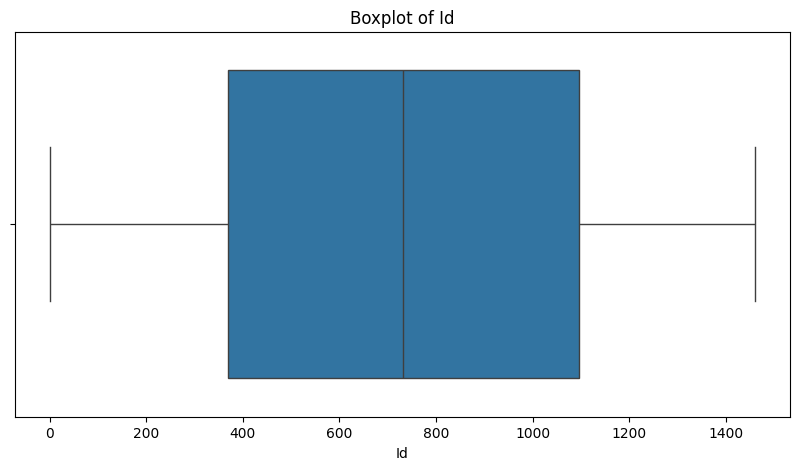

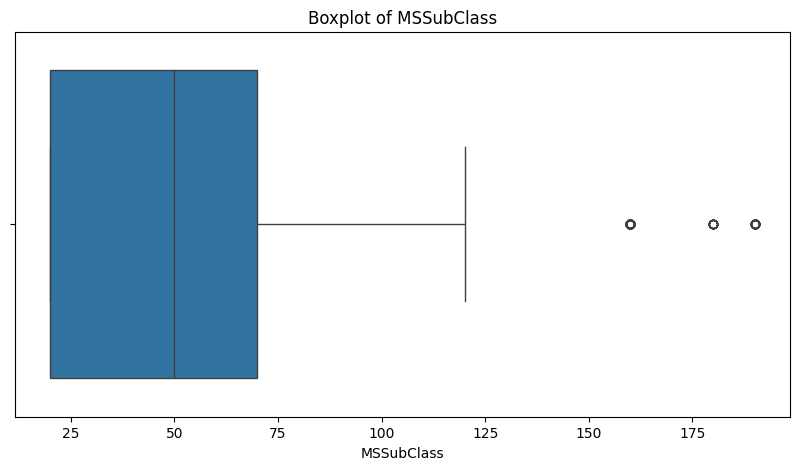

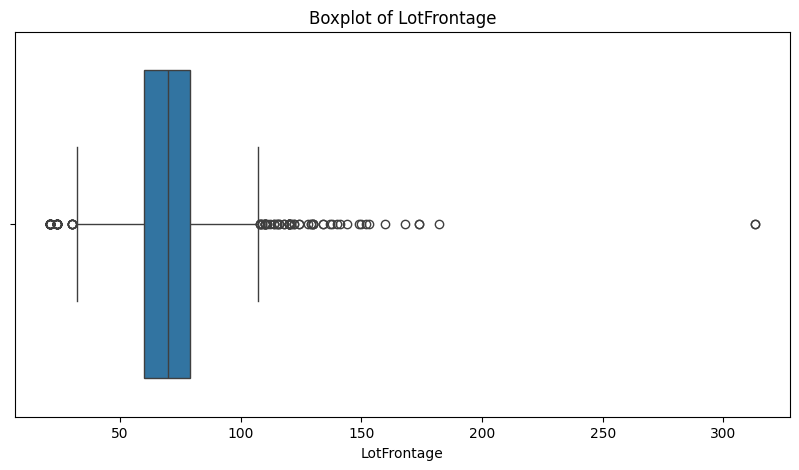

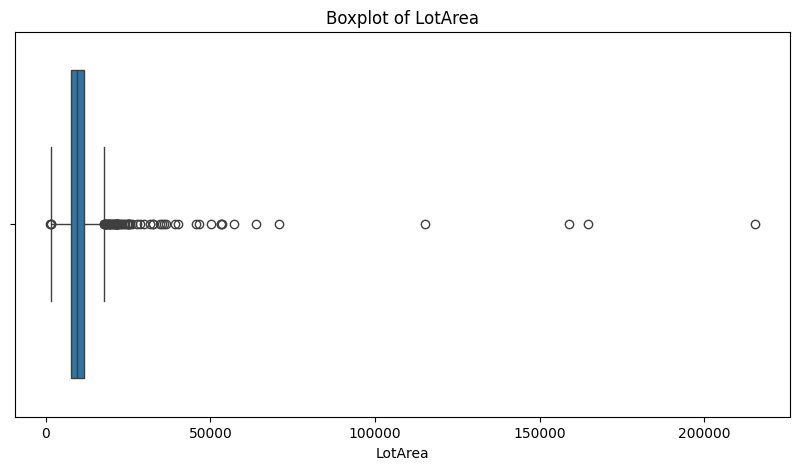

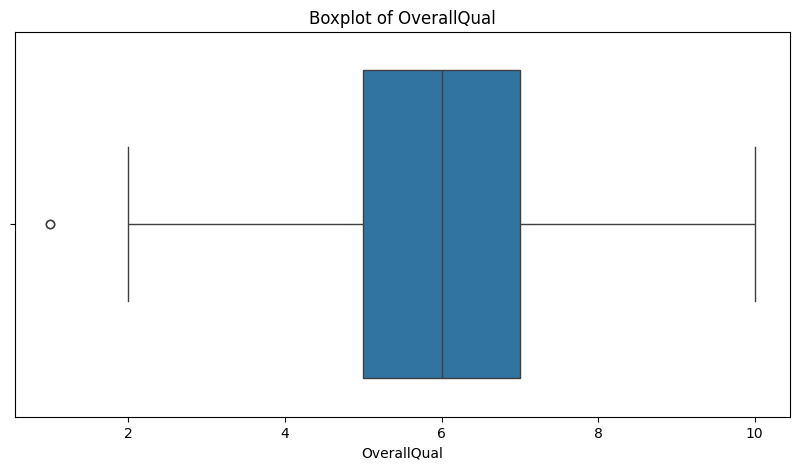

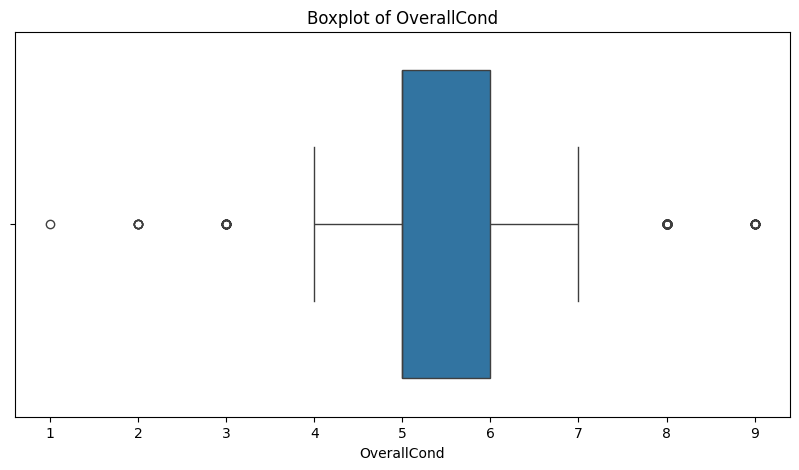

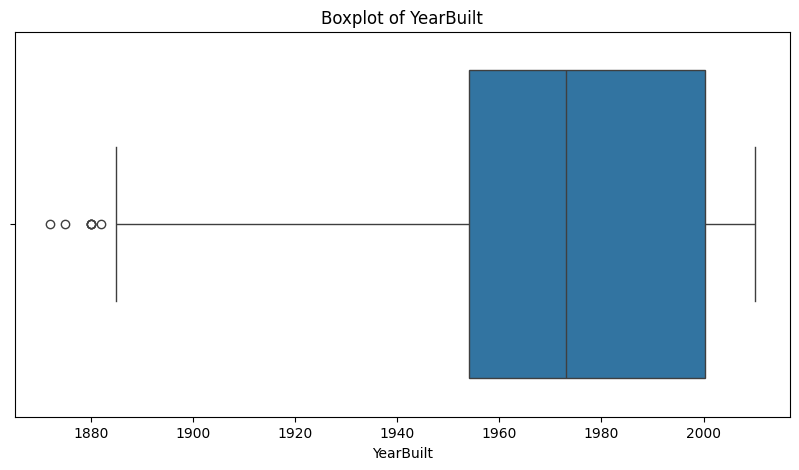

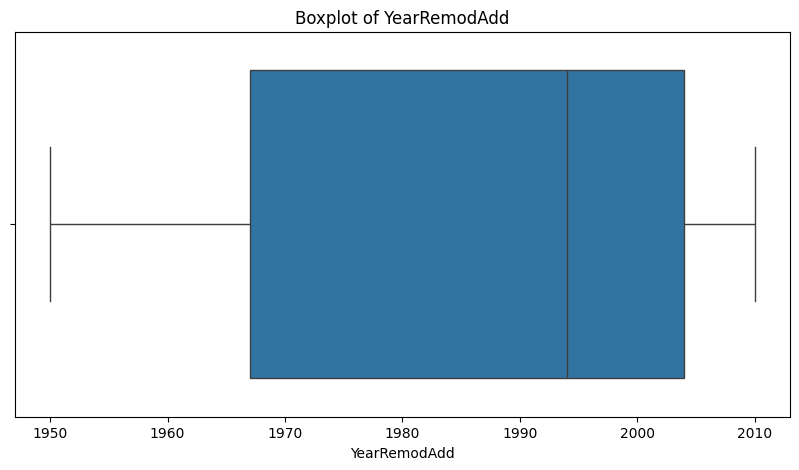

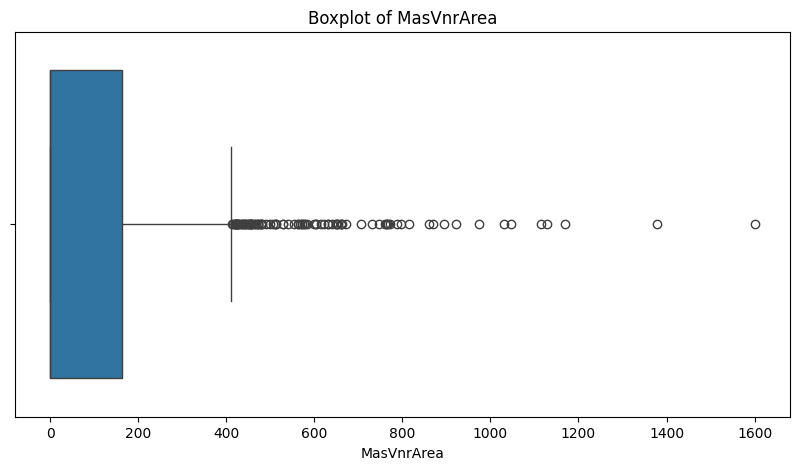

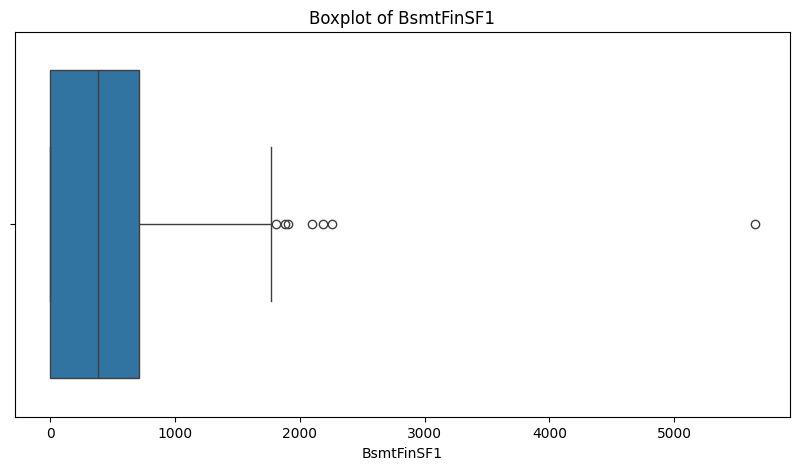

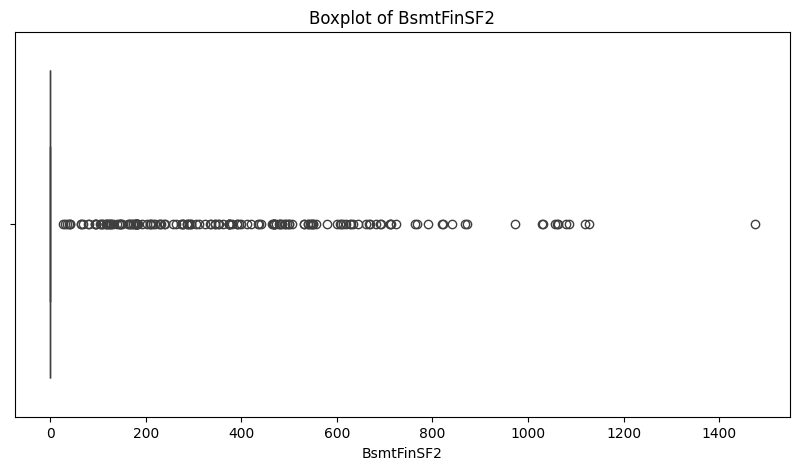

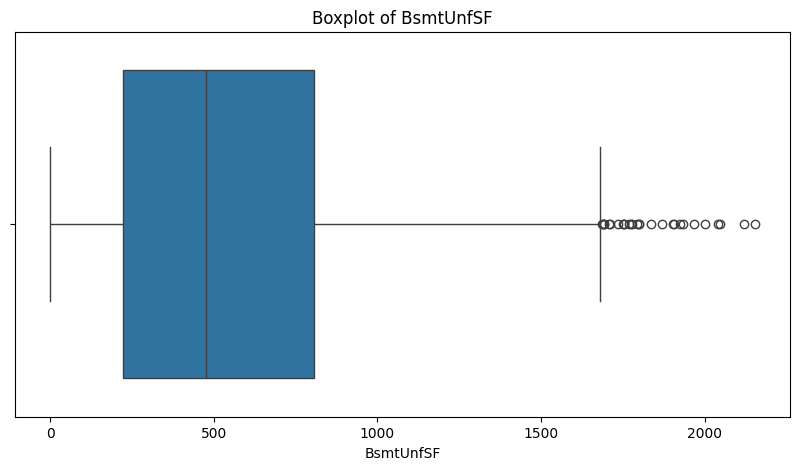

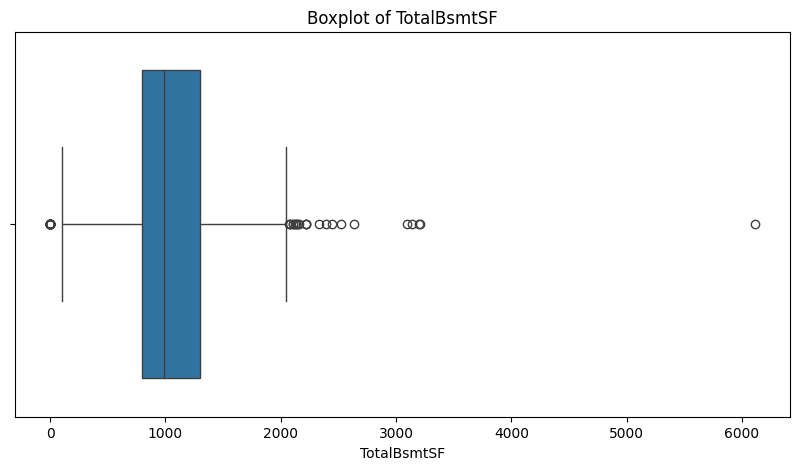

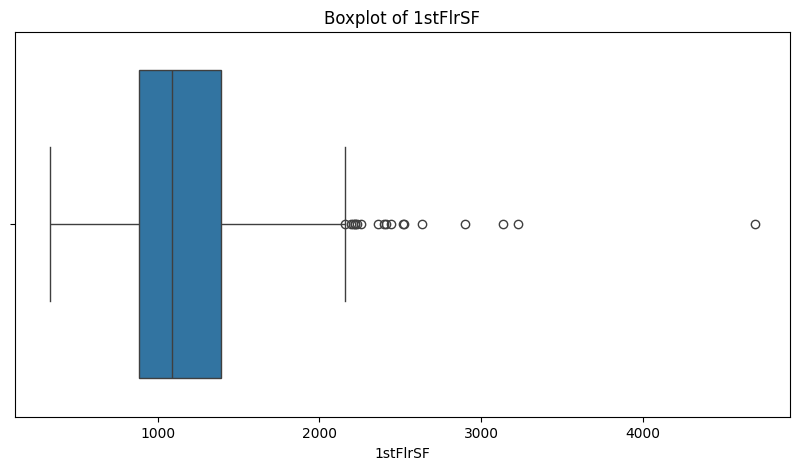

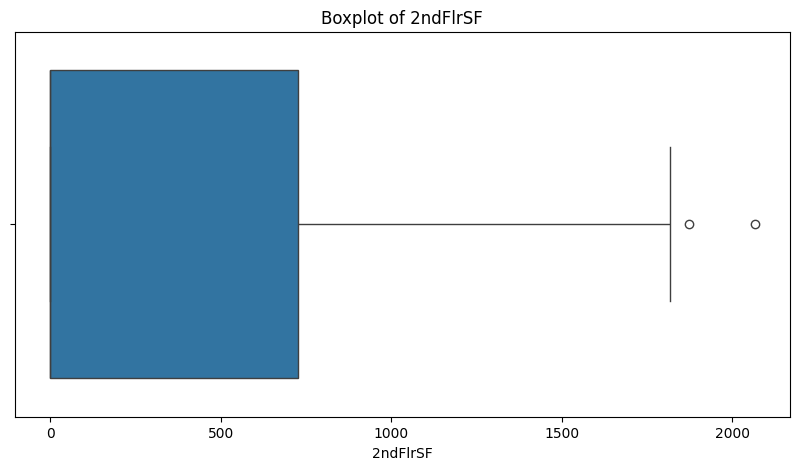

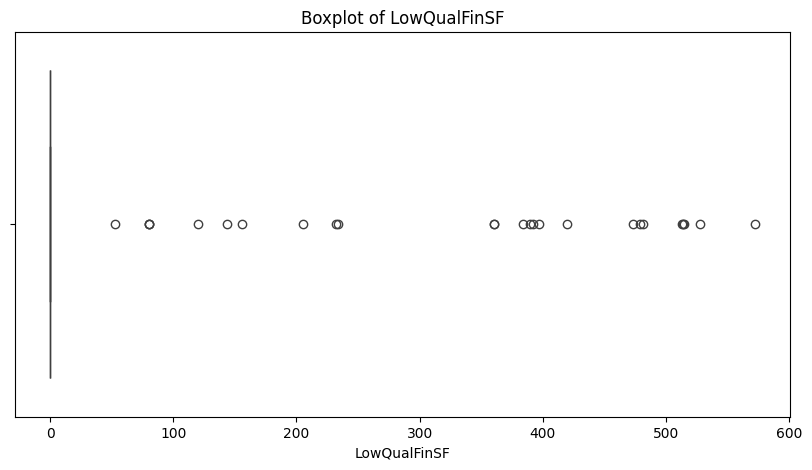

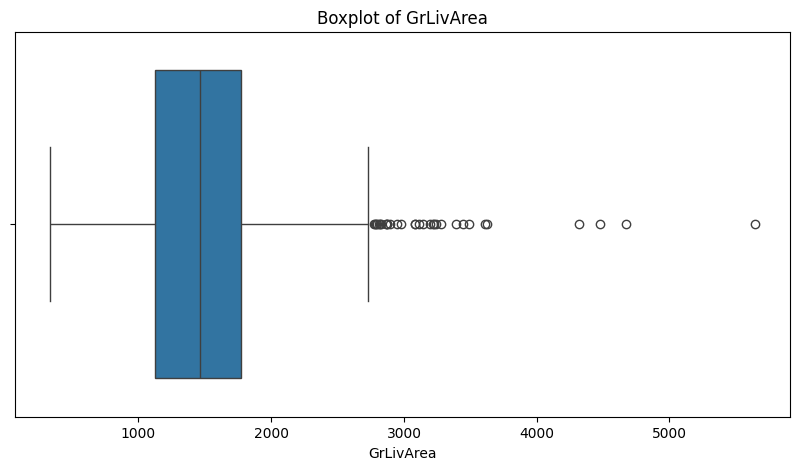

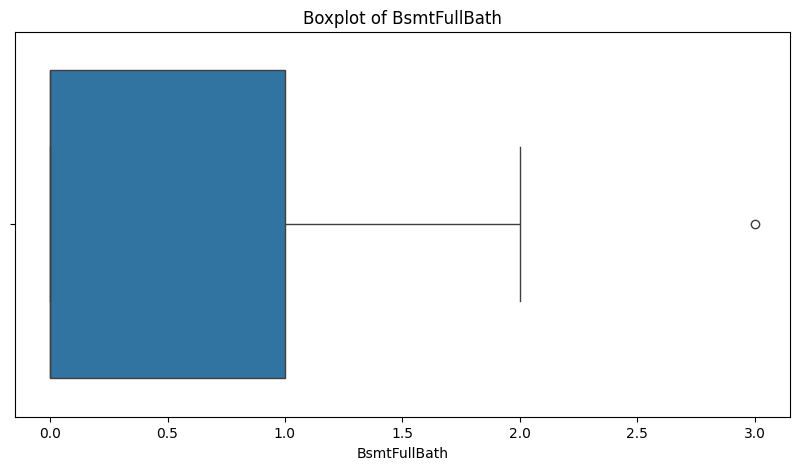

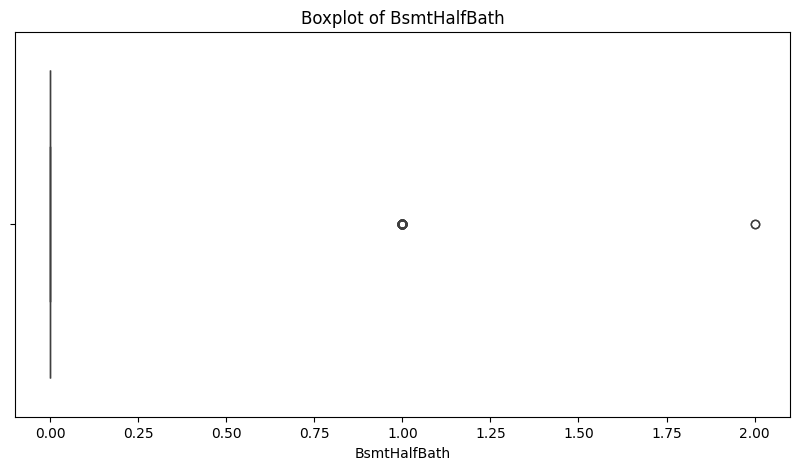

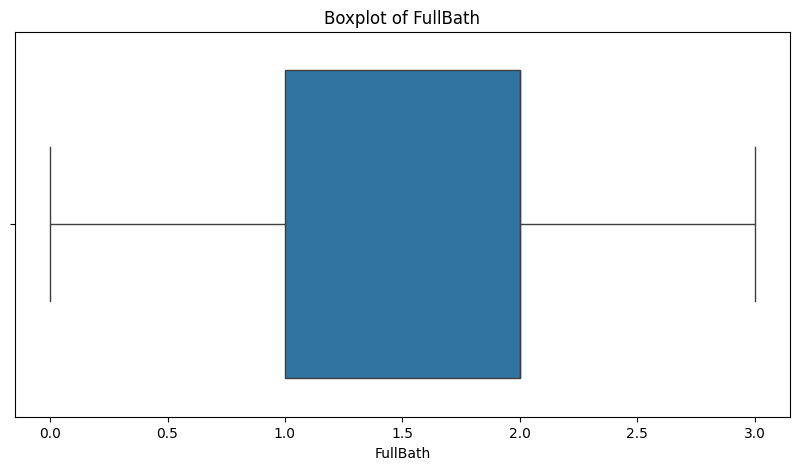

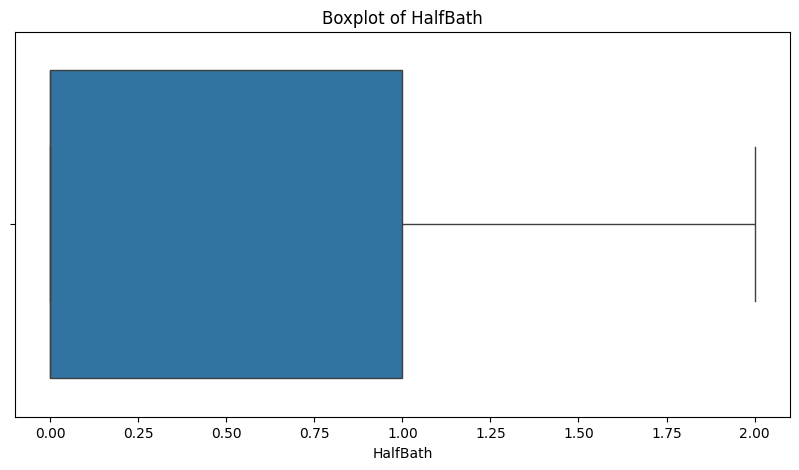

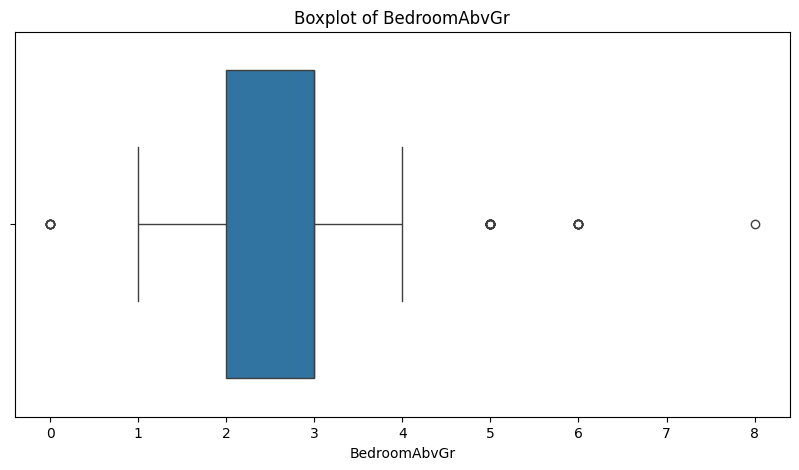

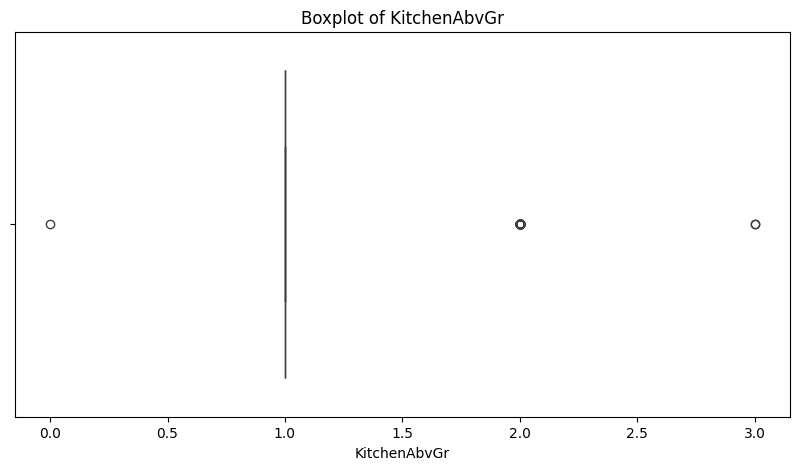

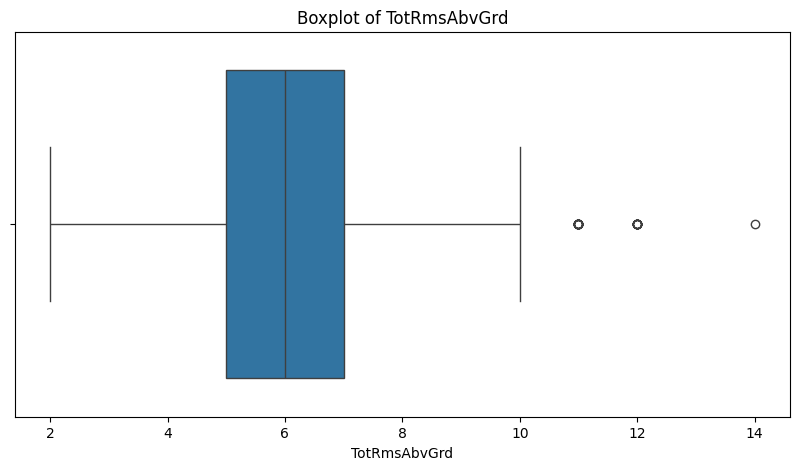

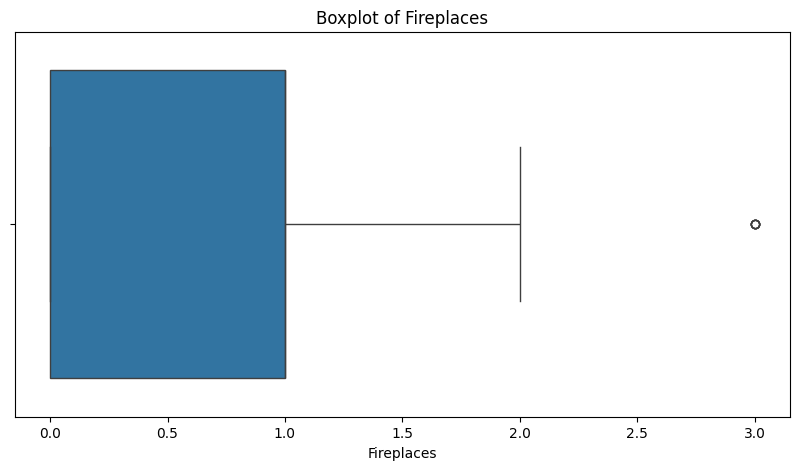

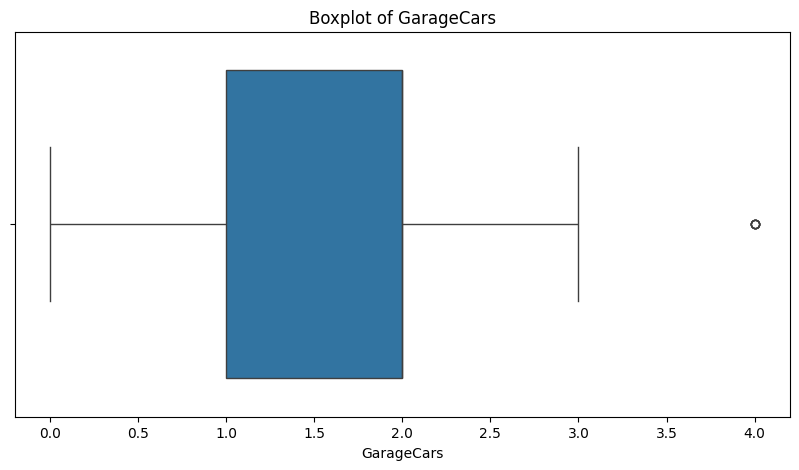

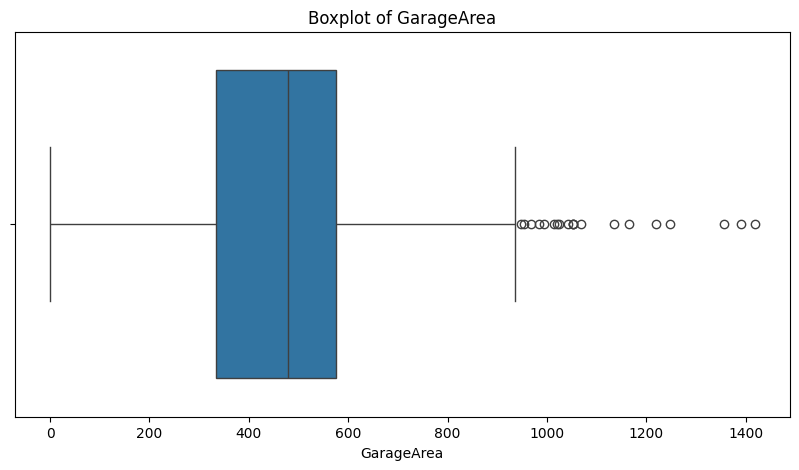

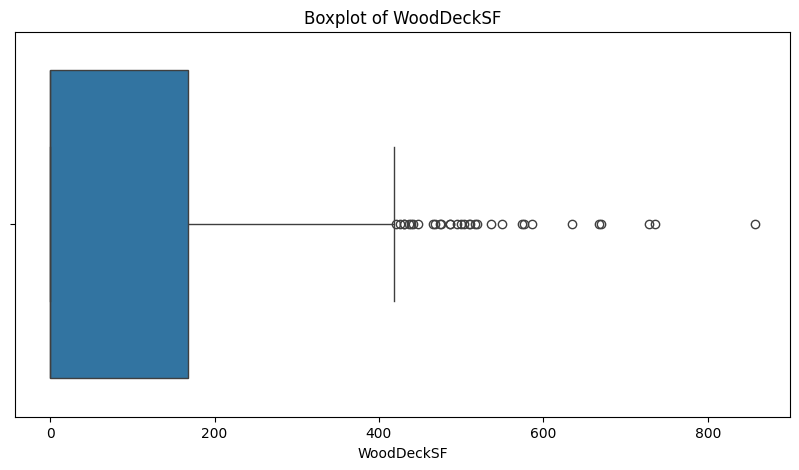

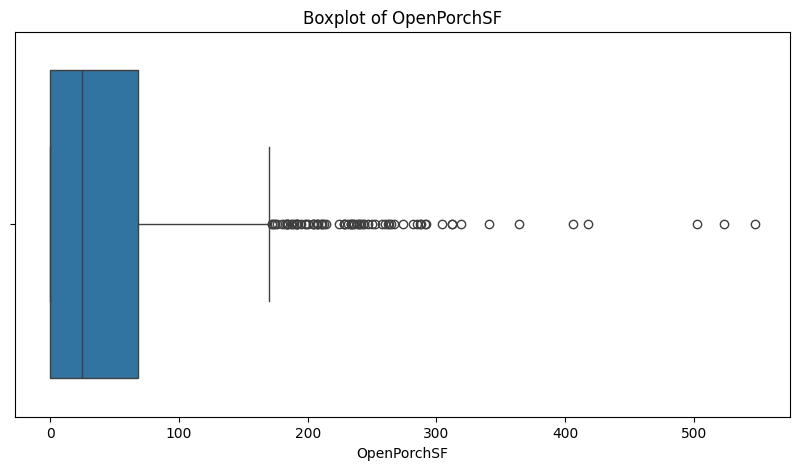

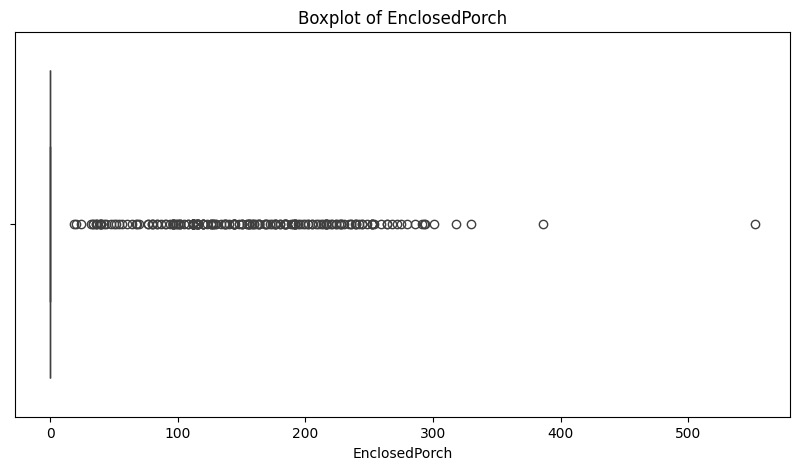

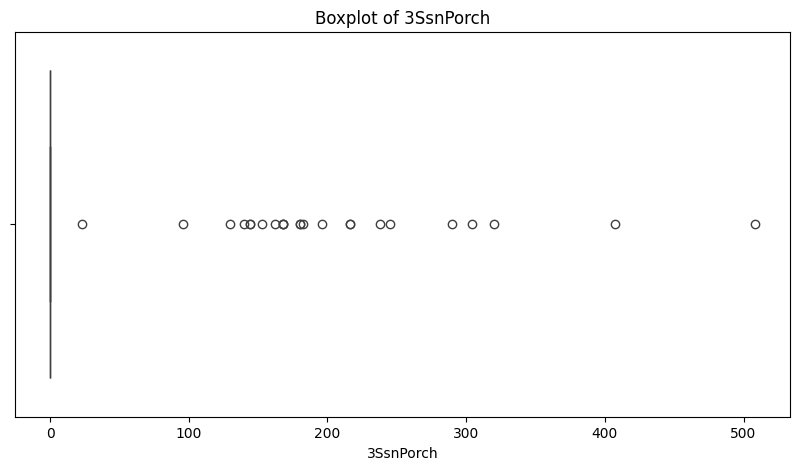

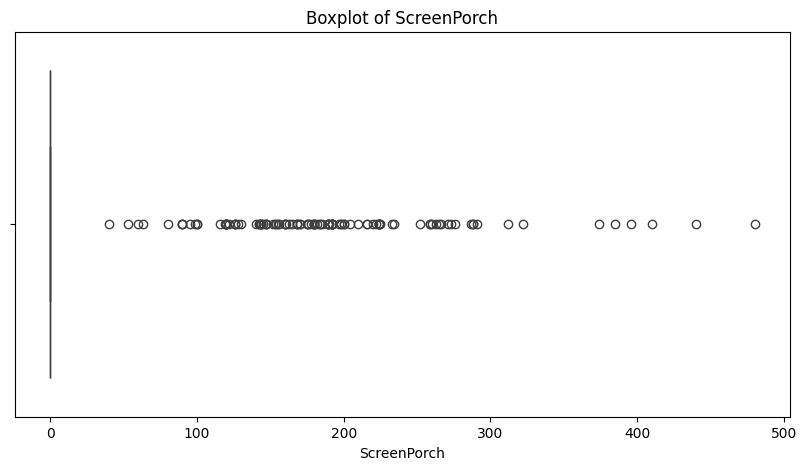

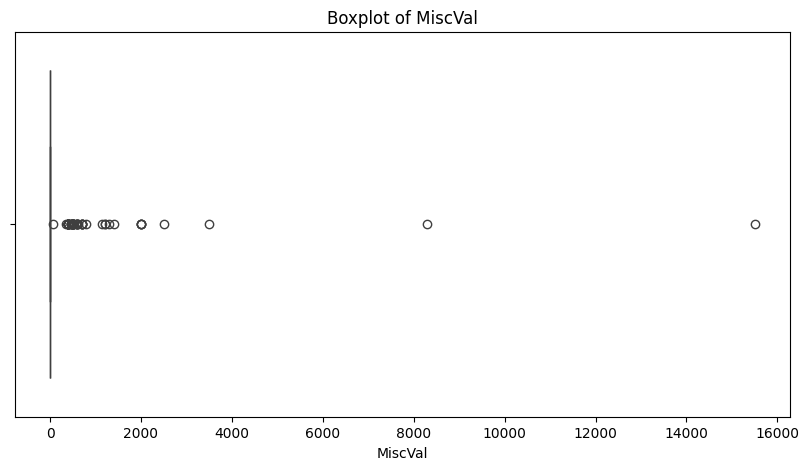

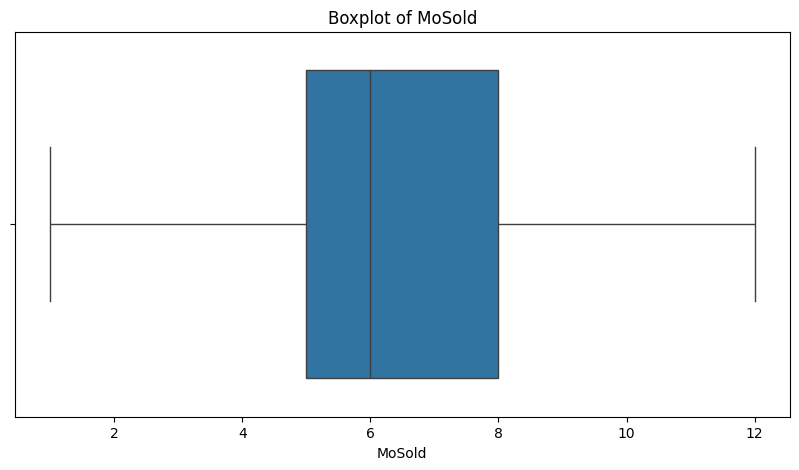

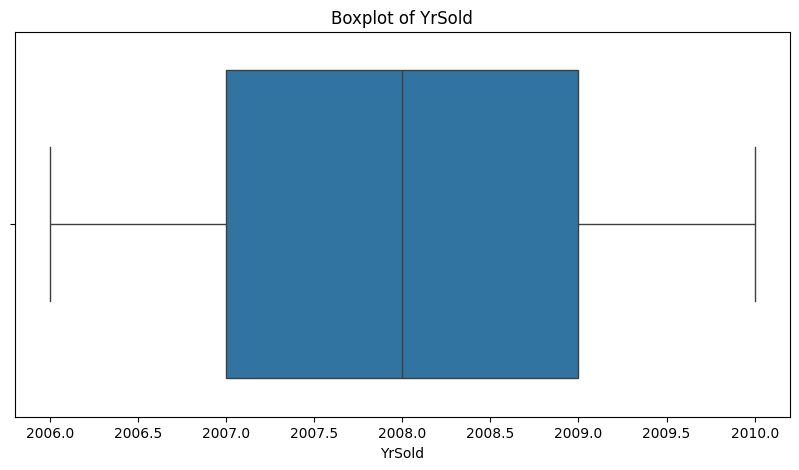

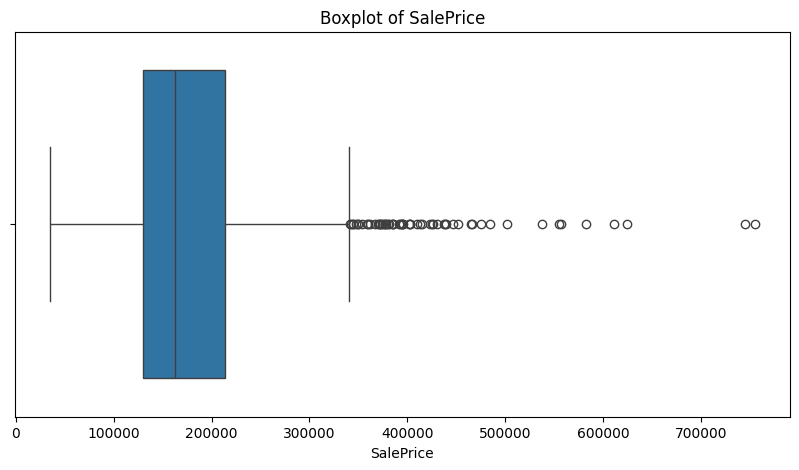

In [226]:
numerical_features = df_house.select_dtypes(include=['float64', 'int64'])

for column in numerical_features.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_house, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

#### Verificacion de los id de acuerdo al scatterplot

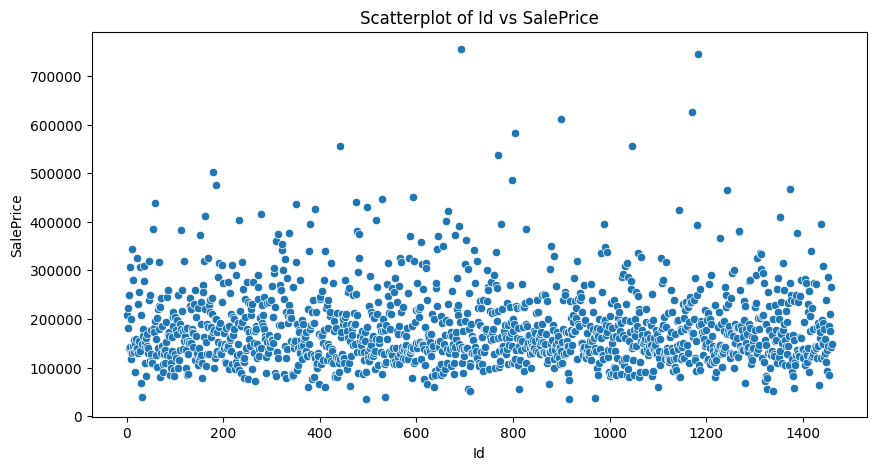

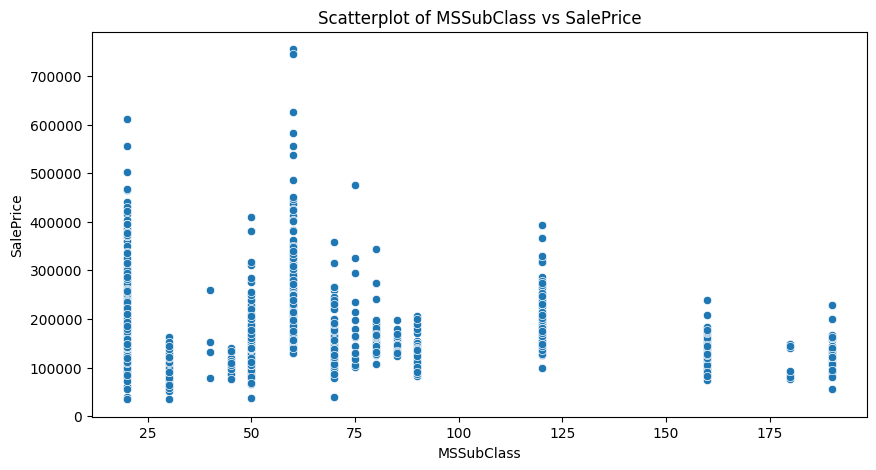

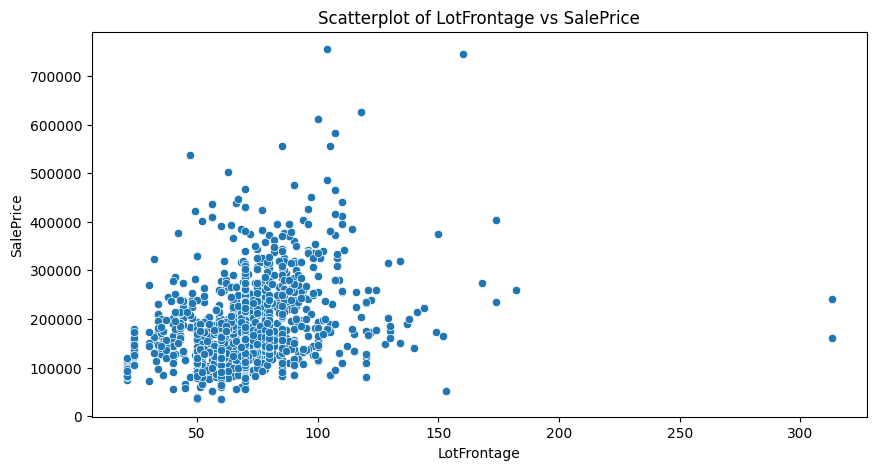

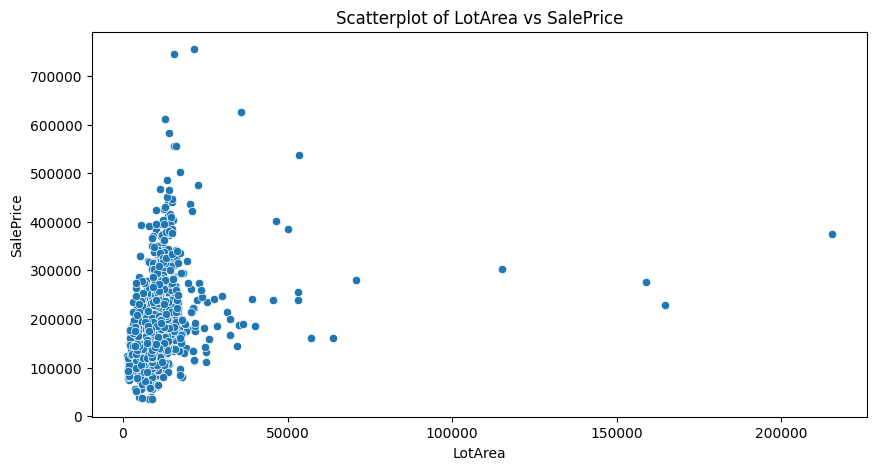

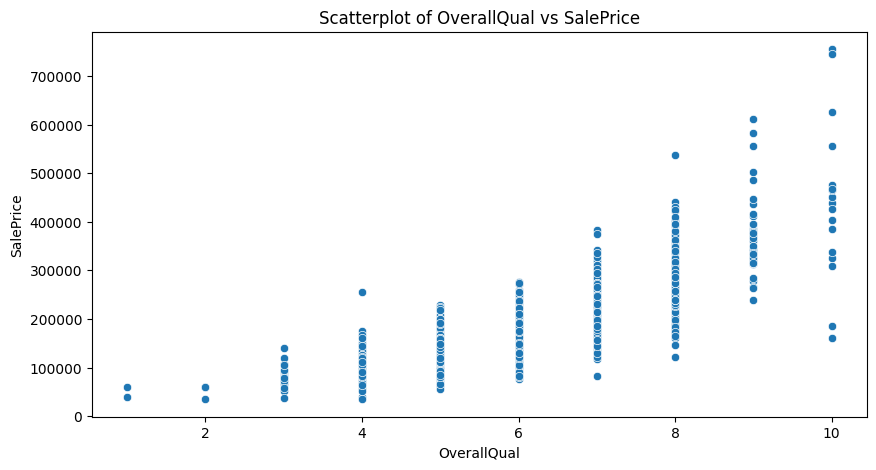

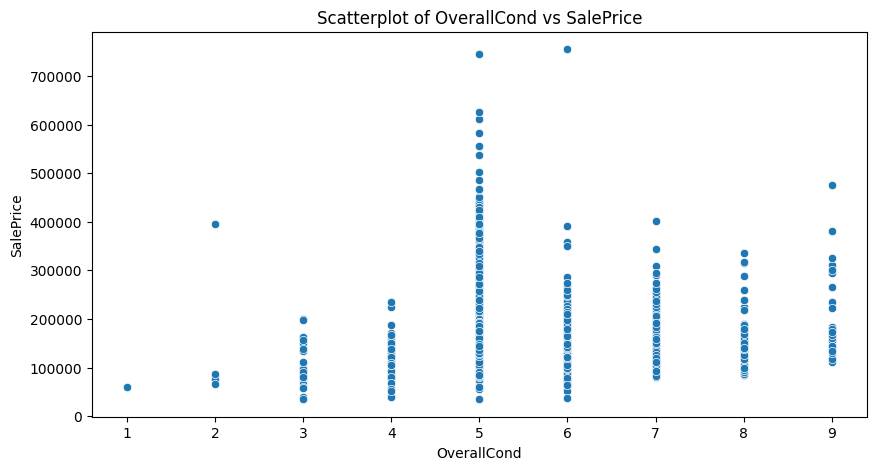

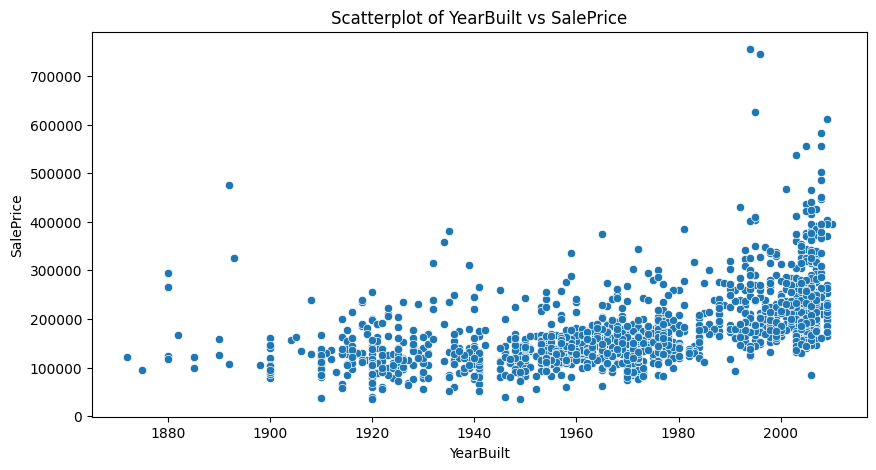

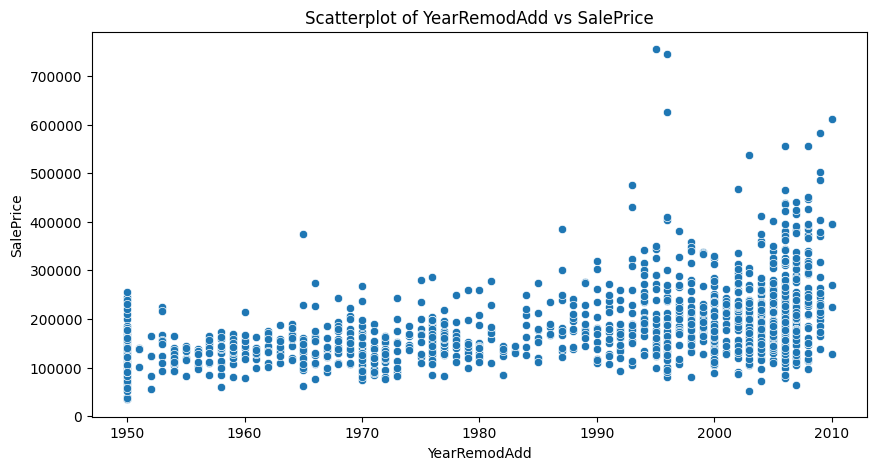

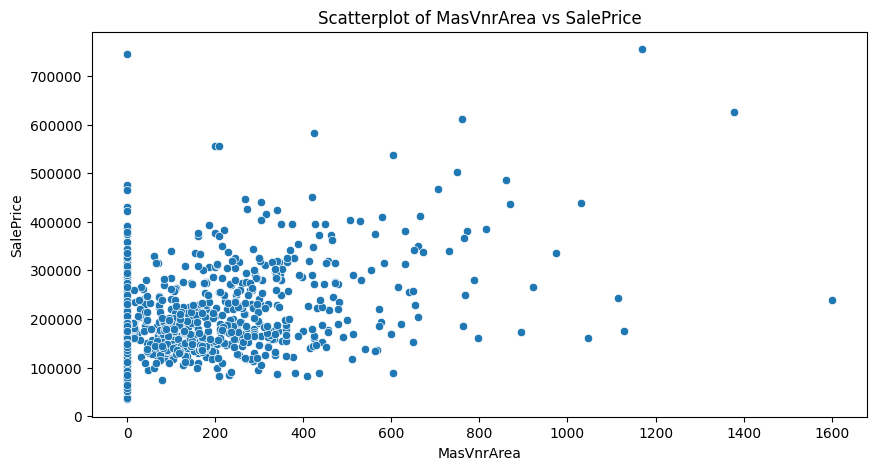

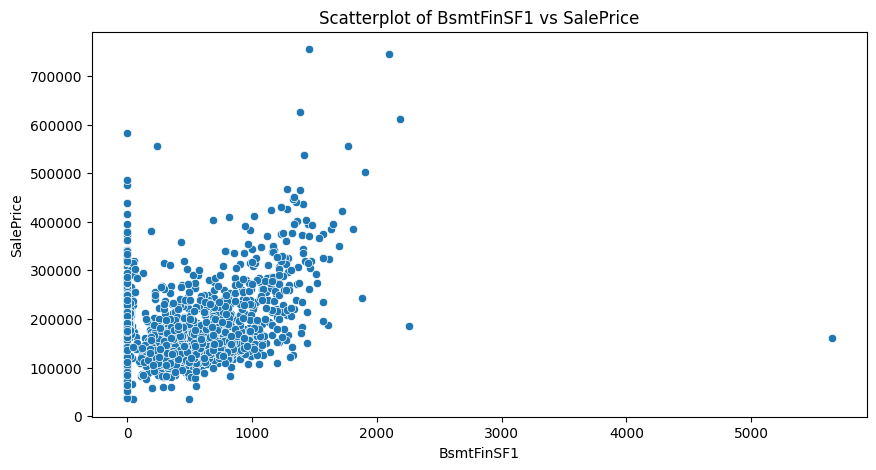

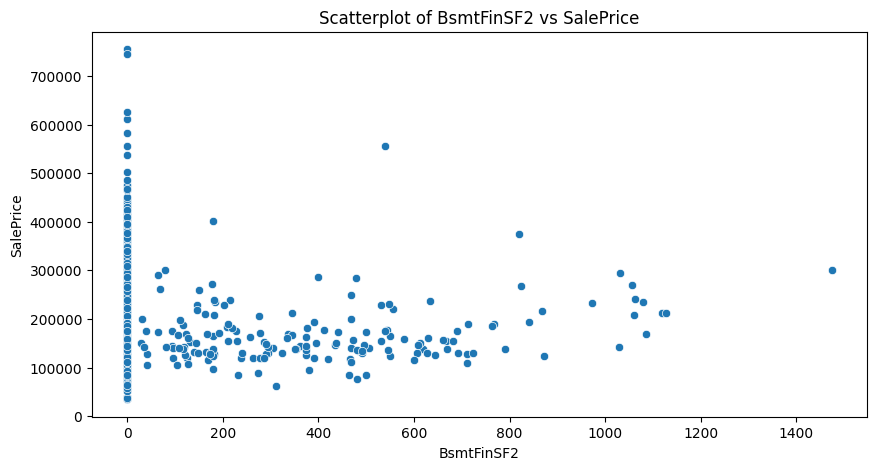

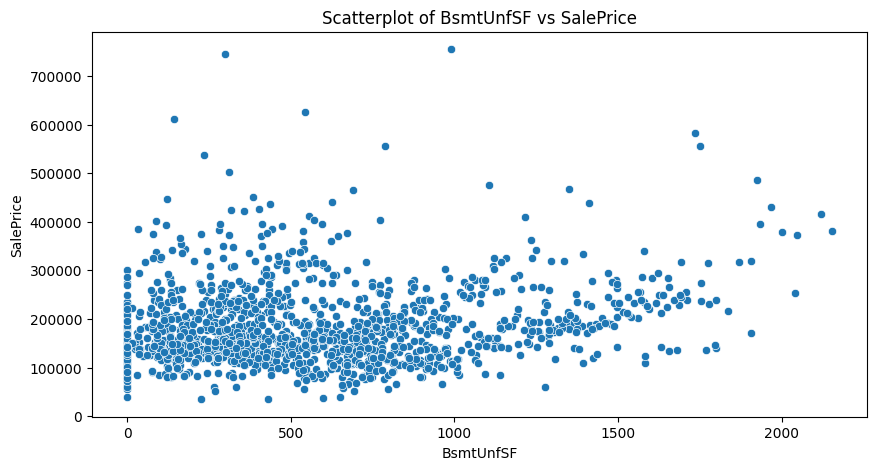

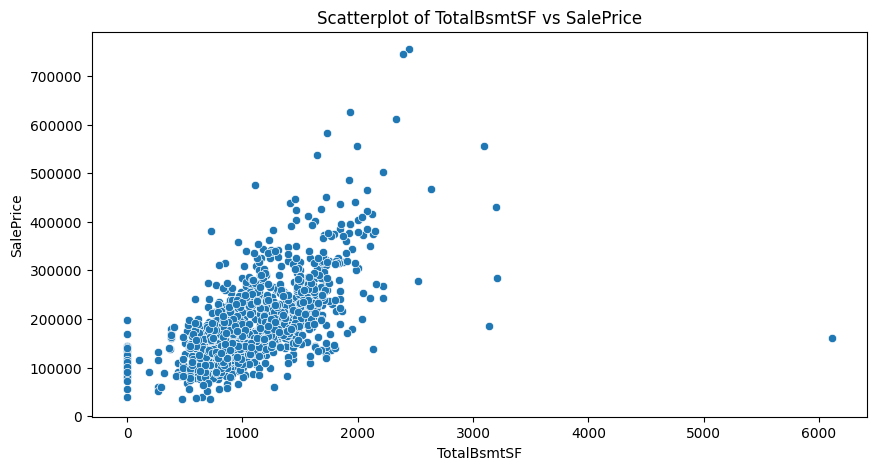

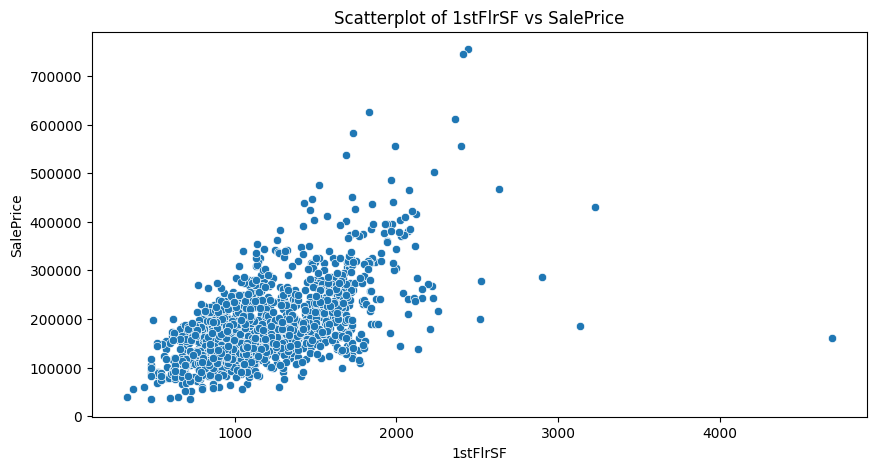

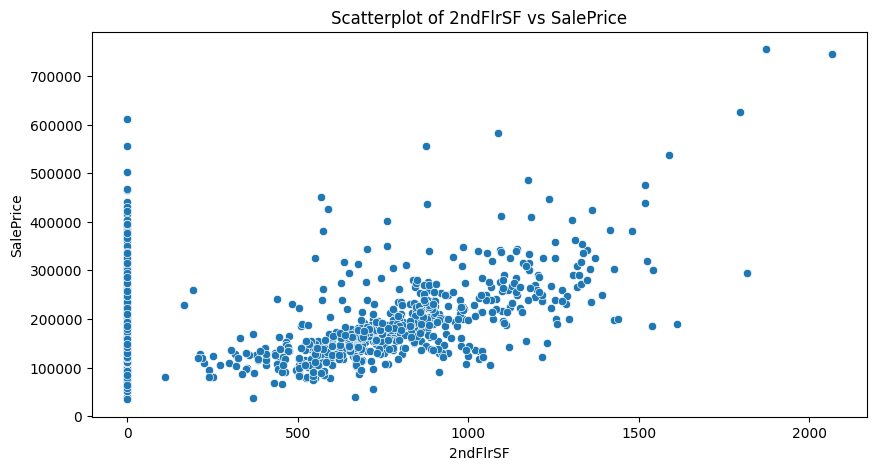

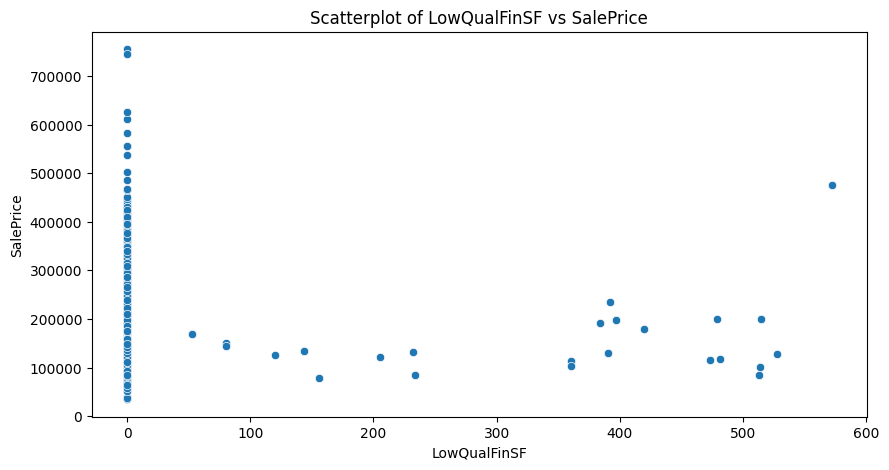

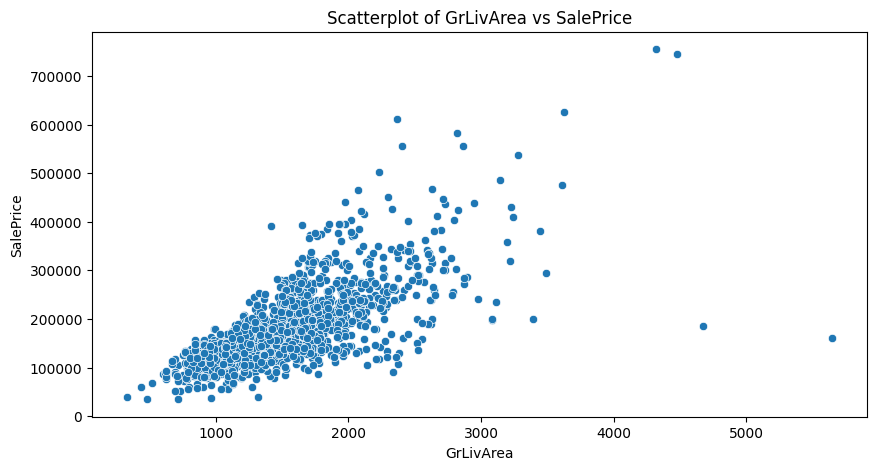

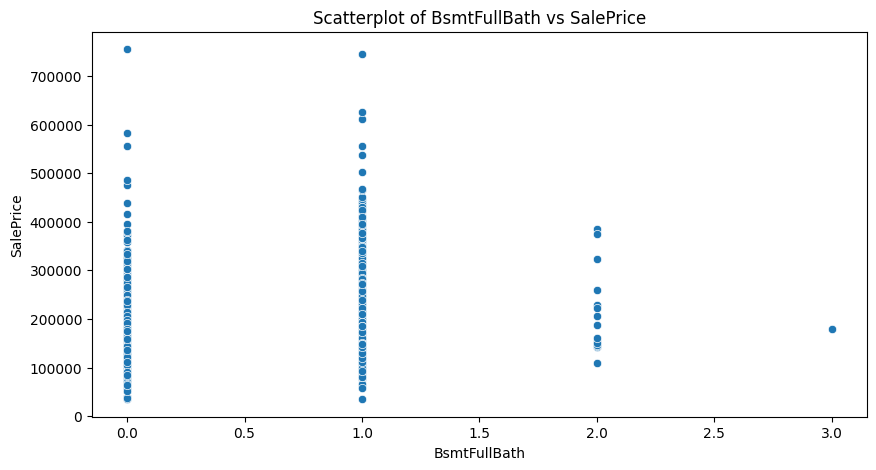

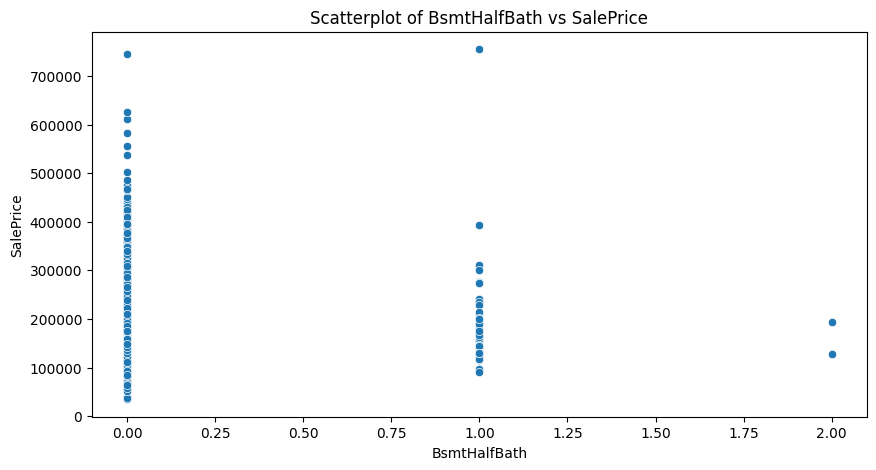

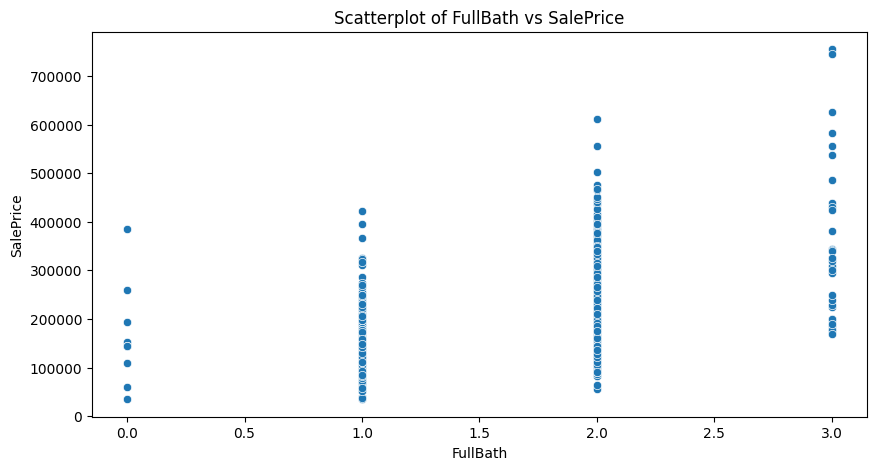

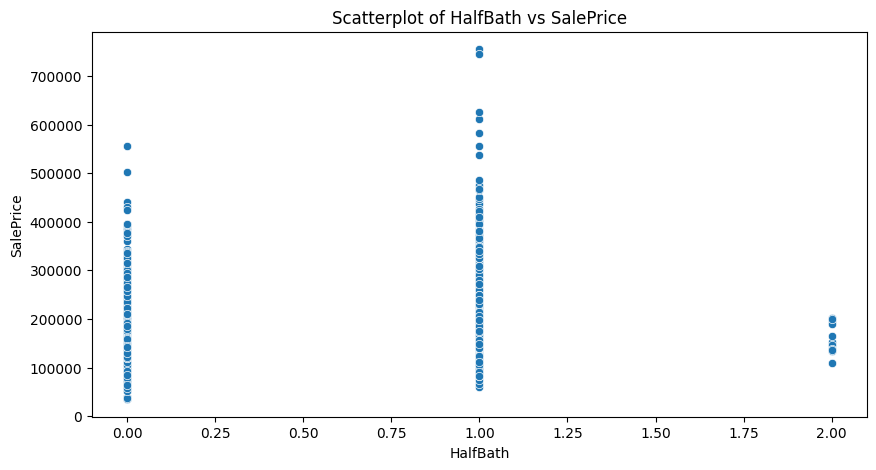

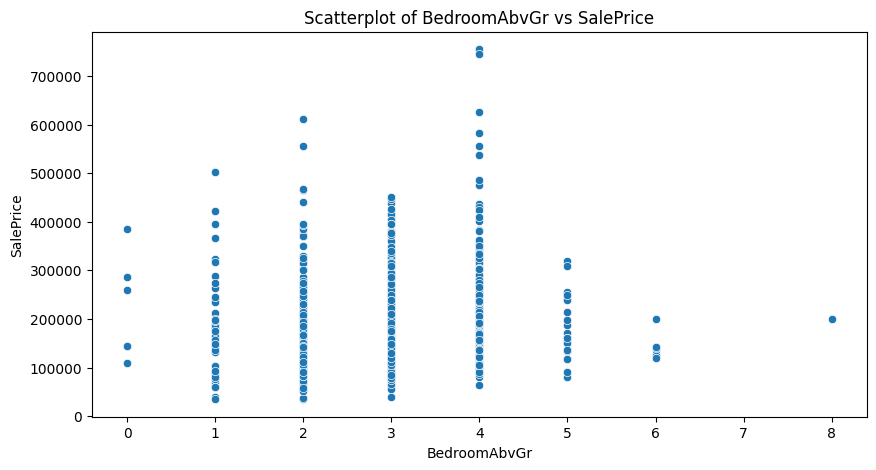

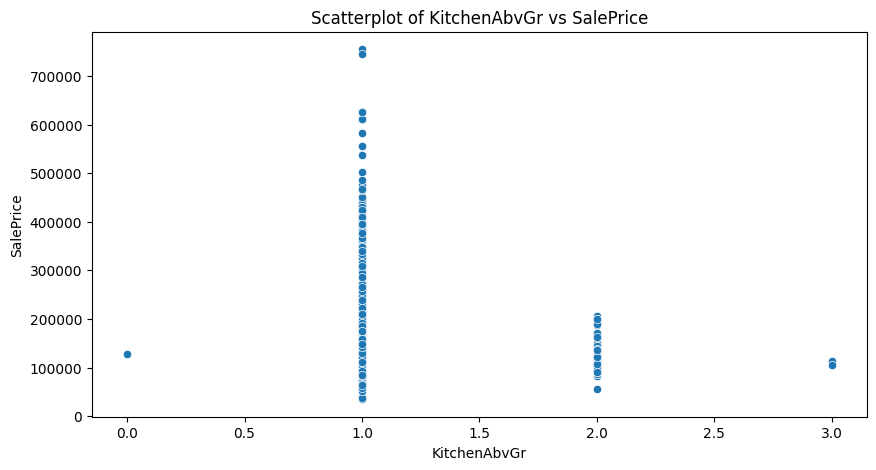

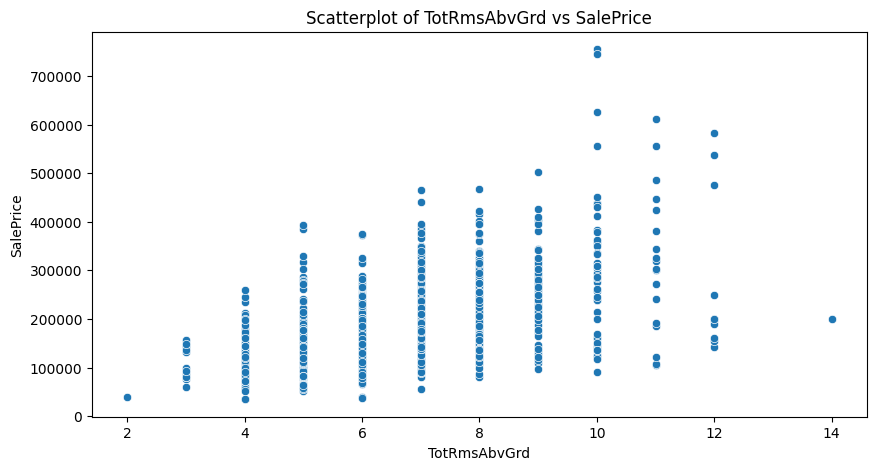

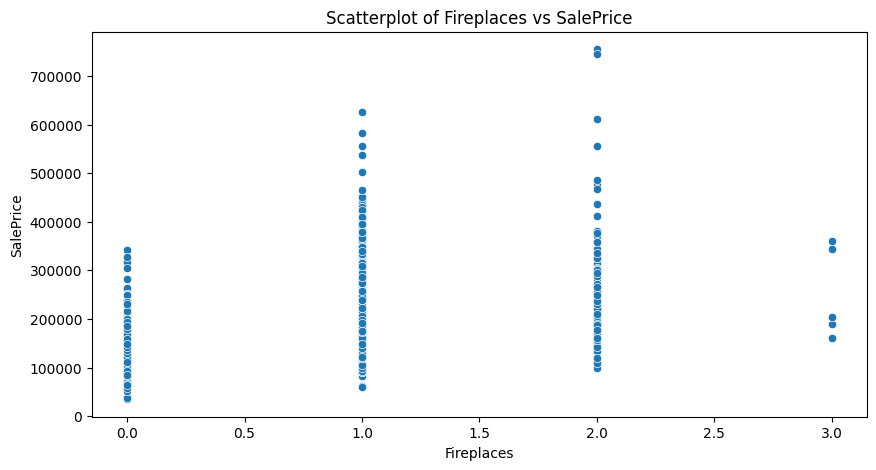

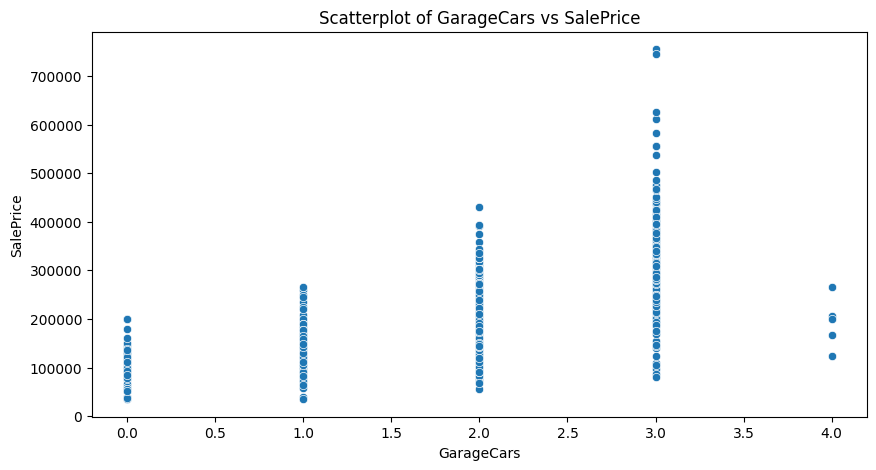

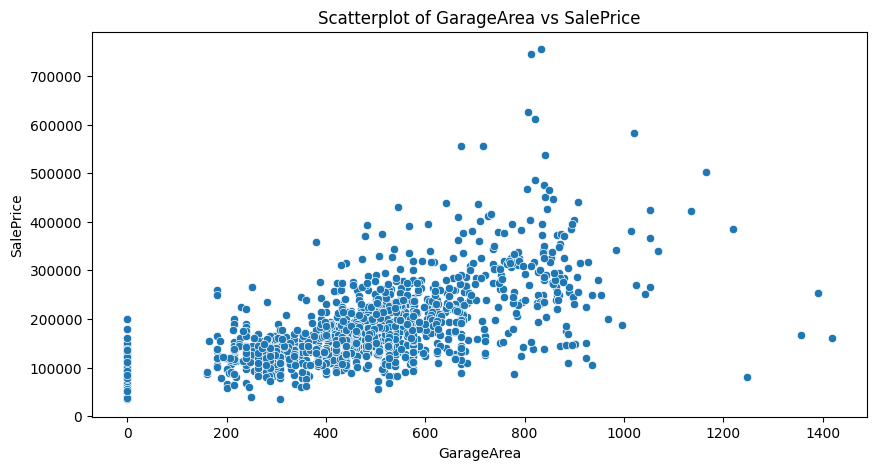

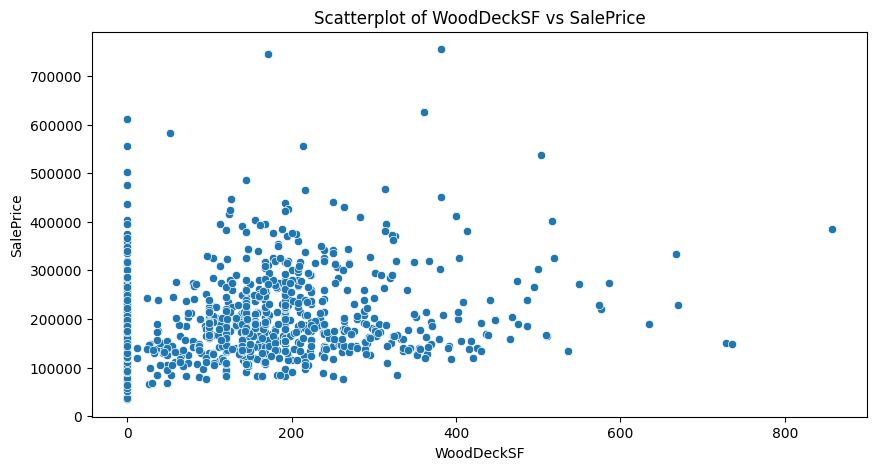

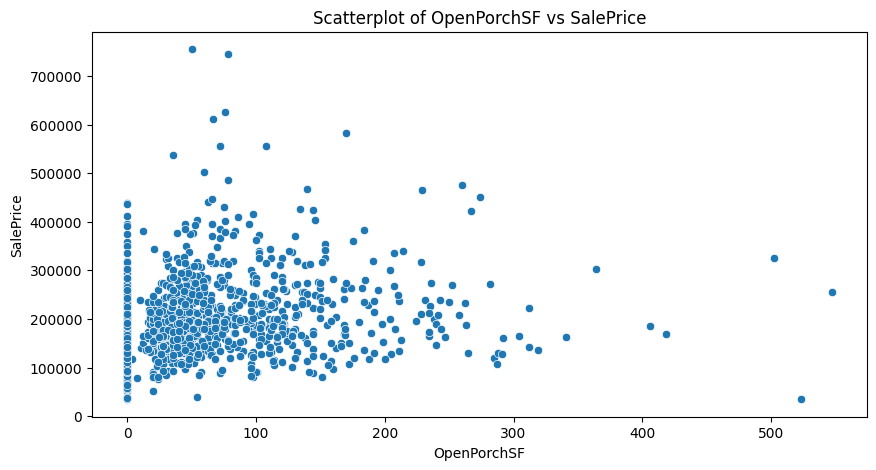

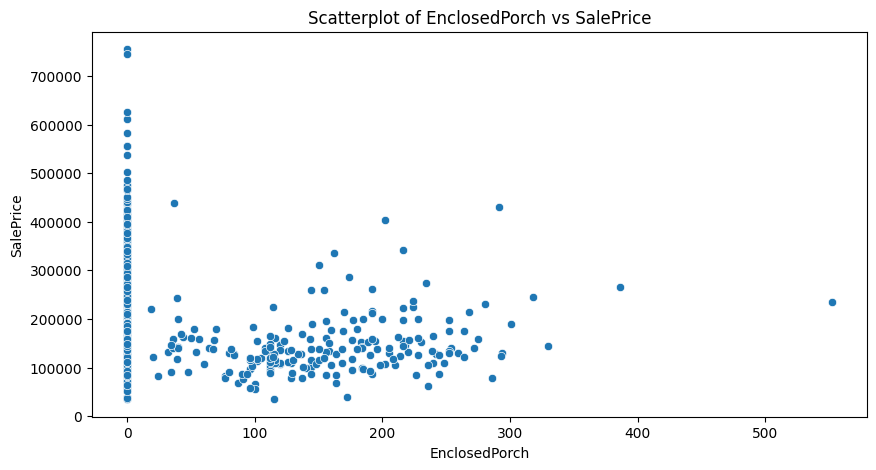

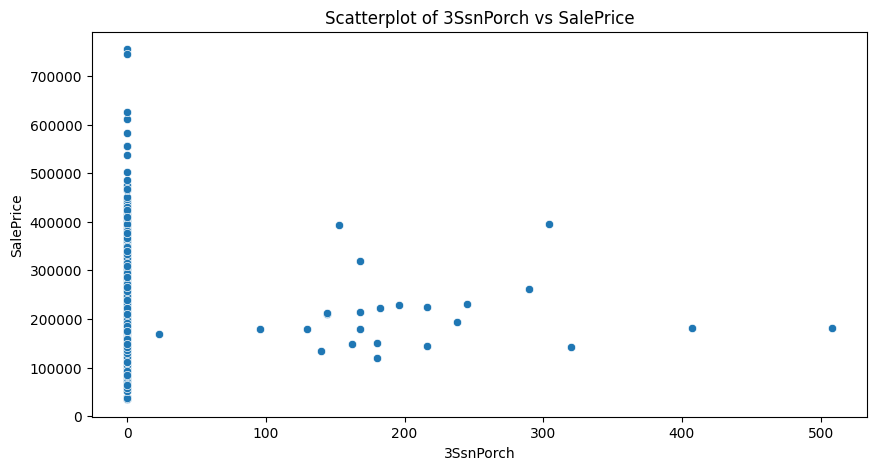

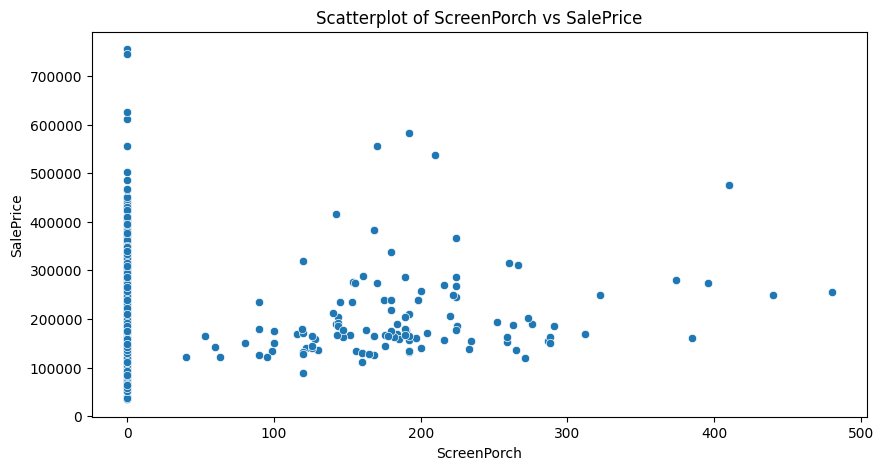

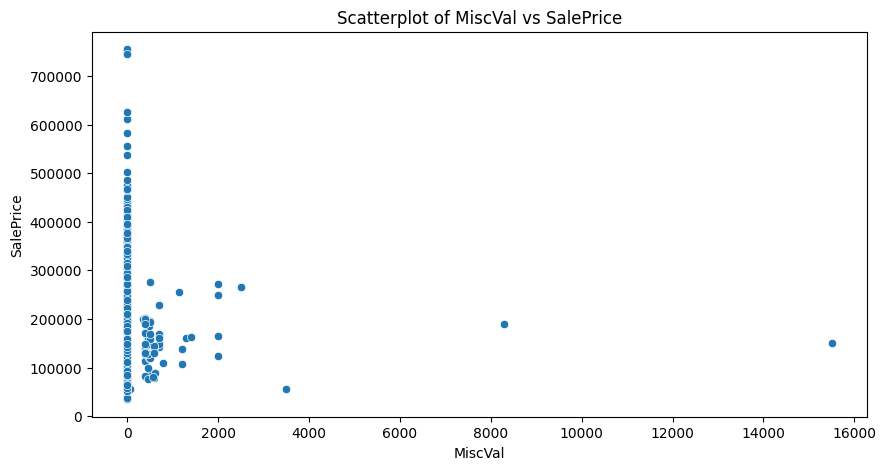

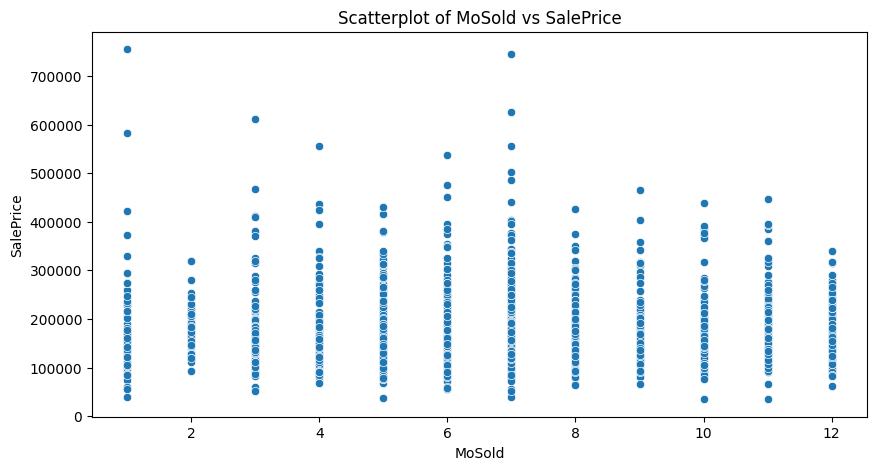

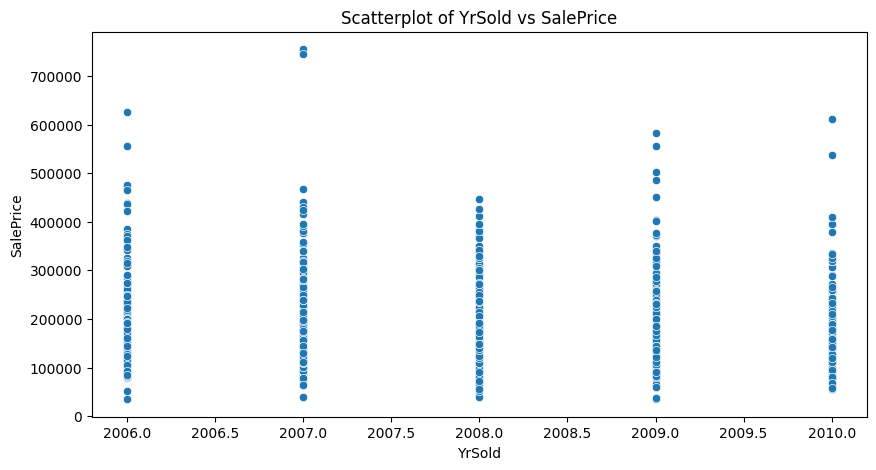

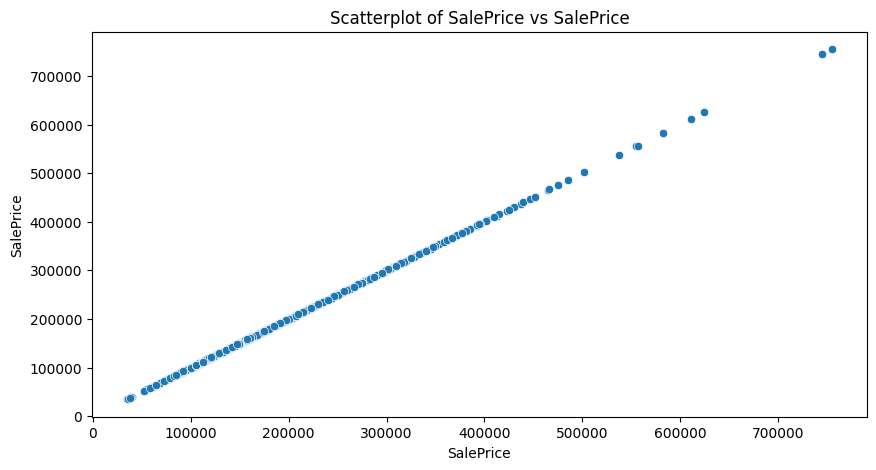

In [227]:
#Con los Scatterplot de SalePrice con las caracteristicas tambien quitare los valores mas extremos de manera manual
#Tambien considero que se podria realizar experimentaciones con distintos tipo de selecion de caracteristicas
#O distintas formas de tratar los datos para tener el mejor dataset de acuerdo al entrenamiento, pero por cuestiones de tiempo lo hare de esta manera.

#Volveremos a ver los scatterplot pues ya eliminamos algunos valores en el anterior ejercicio
for column in numerical_features.columns:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df_house, x=column, y='SalePrice')
    plt.title(f'Scatterplot of {column} vs SalePrice')
    plt.show()

In [228]:
df_house[df_house['MasVnrArea'] > 1300]
#1169

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
297    298          60       FV         66.0     7399   Pave      IR1   
1169  1170          60       RL        118.0    35760   Pave      IR1   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
297          Lvl    AllPub    Inside  ...          10             0         0   
1169         Lvl    AllPub   CulDSac  ...          76             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
297          198       0      6    2007        WD         Normal     239000  
1169           0       0      7    2006        WD         Normal     625000  

[2 rows x 75 columns]

In [229]:
df_house[(df_house['BsmtFinSF2'] > 400) & (df_house['SalePrice'] > 500000)]
#441

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
440  441          20       RL        105.0    15431   Pave      Reg   

    LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
440         Lvl    AllPub    Inside  ...          72             0         0   

    ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
440         170       0      4    2009        WD         Normal     555000  

[1 rows x 75 columns]

In [230]:
df_house[df_house['LowQualFinSF'] > 500]
#186

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
88      89          50  C (all)   105.000000     8470   Pave      IR1   
170    171          50       RM    70.049958    12358   Pave      IR1   
185    186          75       RM    90.000000    22950   Pave      IR2   
635    636         190       RH    60.000000    10896   Pave      Reg   
1009  1010          50       RL    60.000000     6000   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
88           Lvl    AllPub    Corner  ...           0           156         0   
170          Lvl    AllPub    Inside  ...           0             0         0   
185          Lvl    AllPub    Inside  ...         260             0         0   
635          Bnk    AllPub    Inside  ...         110             0         0   
1009         Lvl    AllPub    Inside  ...           0           138         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
88             0       0     10    2009     ConLD        Abnorml      85000  
170            0       0      5    2007        WD         Normal     128500  
185          410       0      6    2006        WD         Normal     475000  
635            0       0      3    2007        WD        Abnorml     200000  
1009           0       0      6    2006        WD         Normal     102000  

[5 rows x 75 columns]

In [231]:
df_house[df_house['BedroomAbvGr'] == 8]
#636

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
635  636         190       RH         60.0    10896   Pave      Reg   

    LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
635         Bnk    AllPub    Inside  ...         110             0         0   

    ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
635           0       0      3    2007        WD        Abnorml     200000  

[1 rows x 75 columns]

In [232]:
df_house[df_house['KitchenAbvGr'] == 3]
#49 810

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
48    49         190       RM         33.0     4456   Pave      Reg   
809  810          75       RM         90.0     8100   Pave      Reg   

    LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
48          Lvl    AllPub    Inside  ...           0           102         0   
809         Lvl    AllPub    Corner  ...         156             0         0   

    ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
48            0       0      6    2009       New        Partial     113000  
809           0       0     11    2009        WD         Normal     106000  

[2 rows x 75 columns]

In [233]:
df_house[df_house['TotRmsAbvGrd'] == 14]
#636

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
635  636         190       RH         60.0    10896   Pave      Reg   

    LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
635         Bnk    AllPub    Inside  ...         110             0         0   

    ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
635           0       0      3    2007        WD        Abnorml     200000  

[1 rows x 75 columns]

In [234]:
df_house[df_house['GarageArea'] > 1200]
#1062 1191

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
581    582          20       RL    98.000000    12704   Pave      Reg   
825    826          20       RL   114.000000    14803   Pave      Reg   
1061  1062          30  C (all)   120.000000    18000   Grvl      Reg   
1190  1191         190       RL    70.049958    32463   Pave      Reg   
1298  1299          60       RL   313.000000    63887   Pave      IR3   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
581          Lvl    AllPub    Inside  ...          90             0         0   
825          Lvl    AllPub    Inside  ...          45             0         0   
1061         Low    AllPub    Inside  ...          20             0         0   
1190         Low    AllPub    Inside  ...           0             0         0   
1298         Bnk    AllPub    Corner  ...         292             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
581            0       0      8    2009       New        Partial     253293  
825            0       0      6    2008       New        Partial     385000  
1061           0     560      8    2008     ConLD         Normal      81000  
1190           0       0      3    2007        WD         Normal     168000  
1298           0       0      1    2008       New        Partial     160000  

[5 rows x 75 columns]

In [235]:
df_house[df_house['OpenPorchSF'] > 500]
#496

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
495    496          30  C (all)         60.0     7879   Pave      Reg   
583    584          75       RM         75.0    13500   Pave      Reg   
1328  1329          50       RM         60.0    10440   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
495          Lvl    AllPub    Inside  ...         523           115         0   
583          Lvl    AllPub    Inside  ...         502             0         0   
1328         Lvl    AllPub    Corner  ...         547             0         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
495            0       0     11    2009        WD        Abnorml      34900  
583            0       0      7    2008        WD         Normal     325000  
1328         480    1150      6    2008        WD         Normal     256000  

[3 rows x 75 columns]

In [236]:
df_house[df_house['EnclosedPorch'] > 300]


Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
197    198          75       RL   174.000000    25419   Pave      Reg   
747    748          70       RM    65.000000    11700   Pave      IR1   
939    940          70       RL    70.049958    24090   Pave      Reg   
1197  1198          75       RM    65.000000     8850   Pave      IR1   
1360  1361          70       RL    51.000000     9842   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
197          Lvl    AllPub    Corner  ...          16           552         0   
747          Lvl    AllPub    Corner  ...           0           386         0   
939          Lvl    AllPub    Inside  ...           0           318         0   
1197         Bnk    AllPub    Corner  ...           0           330         0   
1360         Lvl    AllPub    Inside  ...           0           301         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
197            0       0      3    2006        WD        Abnorml     235000  
747            0       0      5    2009        WD         Normal     265979  
939            0       0      6    2010       COD         Normal     244400  
1197           0       0      7    2006     ConLw         Normal     144000  
1360           0       0      5    2008        WD         Normal     189000  

[5 rows x 75 columns]

In [237]:
df_house[df_house['MiscVal'] > 8000]
#346 1230

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
346    347          20       RL    70.049958    12772   Pave      IR1   
1230  1231          90       RL    70.049958    18890   Pave      IR1   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
346          Lvl    AllPub   CulDSac  ...           0             0         0   
1230         Lvl    AllPub    Inside  ...          24           145         0   

     ScreenPorch MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
346            0   15500      4    2007        WD         Normal     151500  
1230           0    8300      8    2007        WD         Normal     190000  

[2 rows x 75 columns]

1169
441
186
636
49
810
1062
1191
496
346
1230


In [238]:
Id = [1169,441,186,636,49,810,1062,1191,496,346,1230]
df_house = df_house.drop(Id)

#### Ing de Caracteristicas

In [239]:
df_house.select_dtypes(include=['int', 'float']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

TotalFSF = 1stFlrSF + 2stFlrSF + BsmtFinSf1 + BsmtFinSF2

ageHouse =  YearSold - YearBuilt

overallMul = OverallQual * OverallCond

garageMult = GarageArea * GarageCars

totalPorch = OpenporchSF + WoodDeckSf + EnclosedPorch + 3SsnPorch+ScreenPorch

totalBath = BsmtFullBath + FullBath + 'BsmtHalfBath'/2 + 'HalfBath'/2

totalAreaSF = TotalBsmtSF + GrLivArea


In [240]:
df_house['totalFSF'] = df_house['1stFlrSF'] + df_house['2ndFlrSF'] + df_house['BsmtFinSF1'] + df_house['BsmtFinSF2']

In [241]:
df_house['ageHouse'] = df_house['YrSold'] - df_house['YearBuilt']

In [242]:
df_house['overalMult'] = df_house['OverallQual'] * df_house['OverallCond']

In [243]:
df_house['garageMult'] = df_house['GarageArea'] * df_house['GarageCars']

In [244]:
df_house['totalPorch'] = df_house['OpenPorchSF'] + df_house['WoodDeckSF'] + df_house['EnclosedPorch'] + df_house['3SsnPorch'] + df_house['ScreenPorch']

In [245]:
df_house['totalBath'] = df_house['BsmtFullBath'] + df_house['BsmtHalfBath']/2 + df_house['FullBath'] + df_house['HalfBath']/ 2

In [246]:
df_house['totalAreaSF'] = df_house['TotalBsmtSF'] + df_house['GrLivArea']

In [247]:
df_house = df_house.drop(
    columns=['Id','TotalBsmtSF','GrLivArea','OverallQual','OverallCond','YrSold', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2','BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch','WoodDeckSF','GarageArea','GarageCars',])

<Axes: >

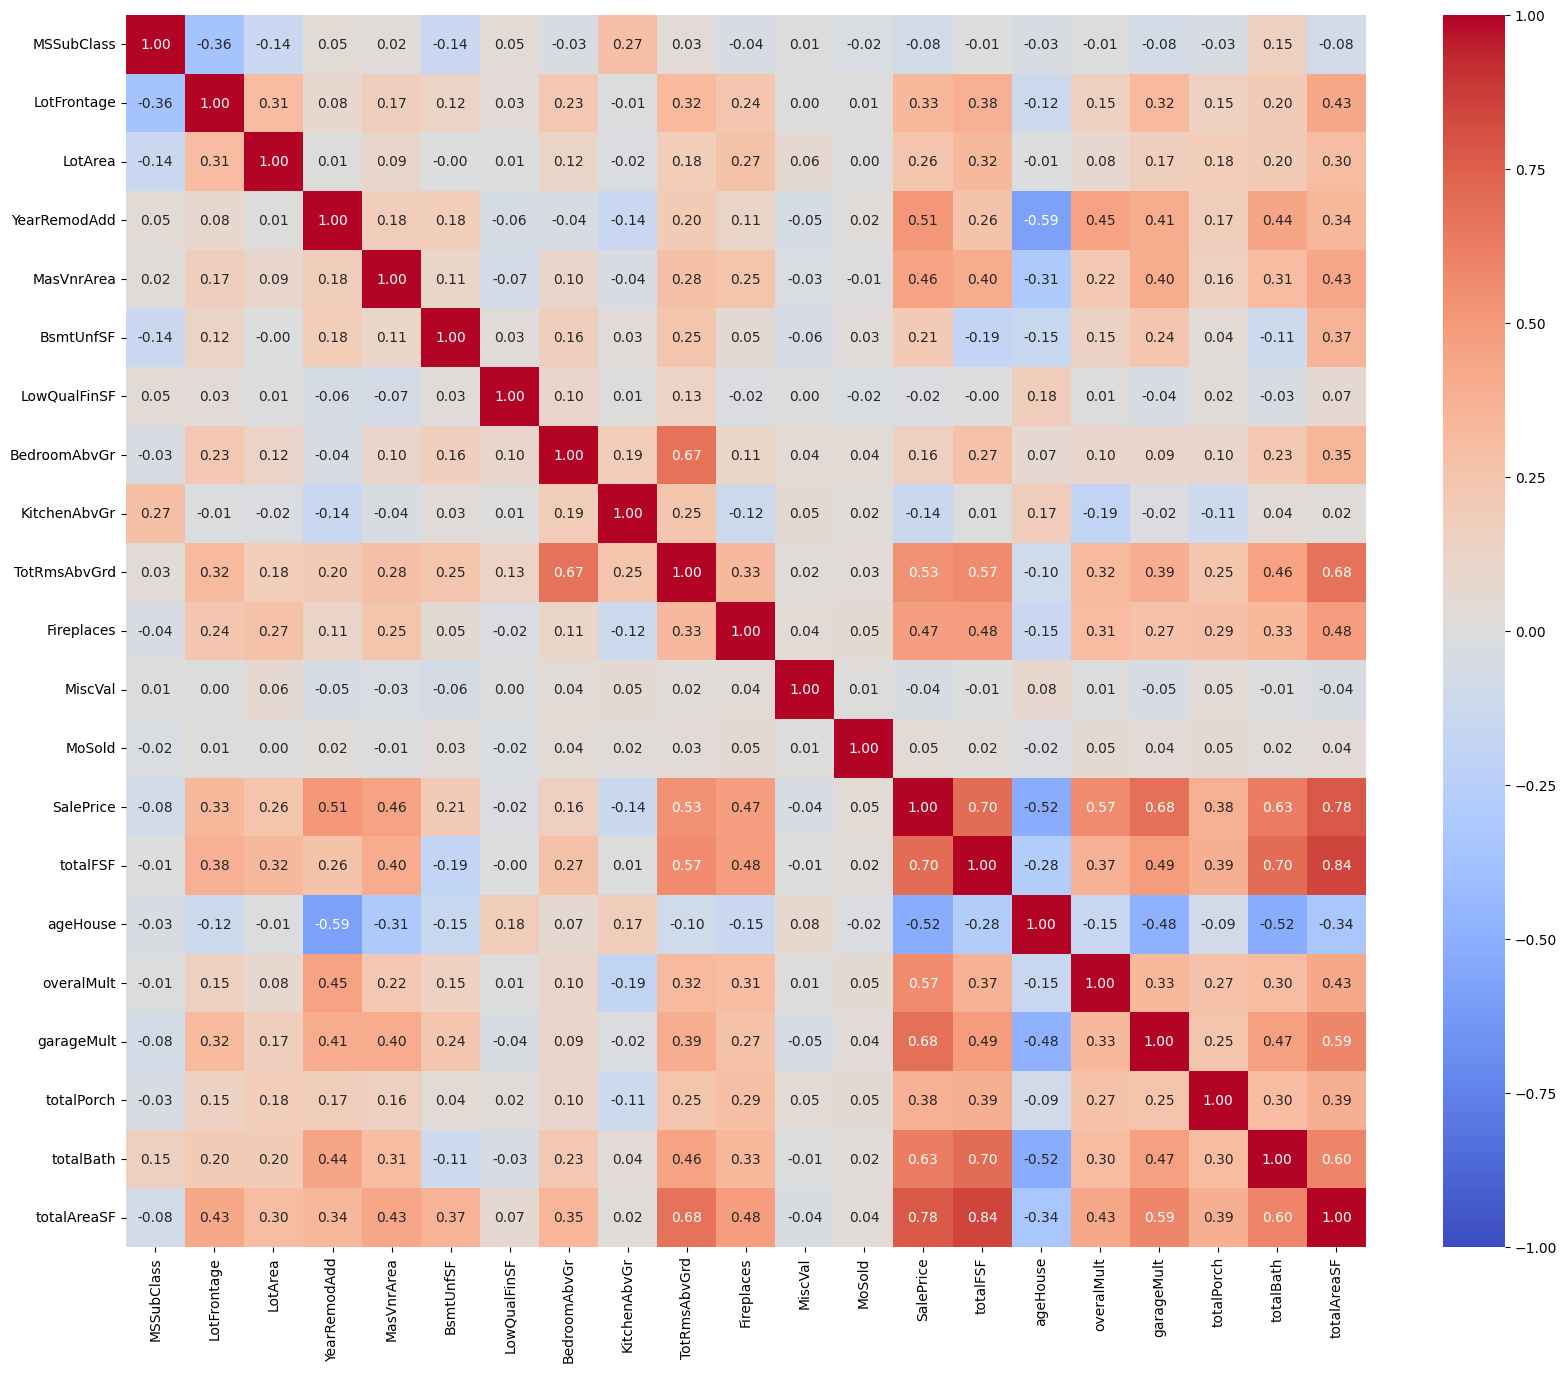

In [248]:
plt.figure(figsize=(20, 16))
sns.heatmap(df_house.corr(numeric_only=True), annot=True,vmin=-1,vmax=1, cmap='coolwarm', fmt=".2f")

#### Trabajando con los DatosCategoricos

In [249]:
df_house = df_house.dropna()
df_house = df_house.reset_index(drop=True)

In [250]:
df_house

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1432          60       RL         62.0     7917   Pave      Reg         Lvl   
1433          20       RL         85.0    13175   Pave      Reg         Lvl   
1434          70       RL         66.0     9042   Pave      Reg         Lvl   
1435          20       RL         68.0     9717   Pave      Reg         Lvl   
1436          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... SaleType SaleCondition SalePrice  \
0       AllPub    Inside       Gtl  ...       WD        Normal    208500   
1       AllPub       FR2       Gtl  ...       WD        Normal    181500   
2       AllPub    Inside       Gtl  ...       WD        Normal    223500   
3       AllPub    Corner       Gtl  ...       WD       Abnorml    140000   
4       AllPub       FR2       Gtl  ...       WD        Normal    250000   
...        ...       ...       ...  ...      ...           ...       ...   
1432    AllPub    Inside       Gtl  ...       WD        Normal    175000   
1433    AllPub    Inside       Gtl  ...       WD        Normal    210000   
1434    AllPub    Inside       Gtl  ...       WD        Normal    266500   
1435    AllPub    Inside       Gtl  ...       WD        Normal    142125   
1436    AllPub    Inside       Gtl  ...       WD        Normal    147500   

     totalFSF ageHouse  overalMult garageMult totalPorch totalBath totalAreaSF  
0        2416        5          35       1096         61       3.5        2566  
1        2240       31          48        920        298       2.5        2524  
2        2272        7          35       1216         42       3.5        2706  
3        1933       91          35       1926        307       2.0        2473  
4        2853        8          40       2508        276       3.5        3343  
...       ...      ...         ...        ...        ...       ...         ...  
1432     1647        8          30        920         40       2.5        2600  
1433     3026       32          36       1000        349       3.0        3615  
1434     2615       69          63        252         60       2.0        3492  
1435     2156       60          30        240        478       2.0        2156  
1436     2376       43          30        276        804       2.5        2512  

[1437 rows x 60 columns]

In [251]:
df_train = df_house.copy()

In [252]:
numerical_pipe = df_train.select_dtypes(include=['int64', 'float64']).columns
numerical_pipe = numerical_pipe.drop('SalePrice')

In [253]:
numerical_pipe

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea',
       'BsmtUnfSF', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'MiscVal', 'MoSold', 'totalFSF',
       'ageHouse', 'overalMult', 'garageMult', 'totalPorch', 'totalBath',
       'totalAreaSF'],
      dtype='object')

En este momento no tenemos valores nulos, Deacuerdo a los valores que tenemos hay que orgaizarlos.

MSZoning  =  Nominal

Street    =  Nominal

LotShape  = Ordinal

LandContour  = Ordinal

Utilities  =   Ordinal

LotConfig   = Nominal     

LandSlope    = Ordinal

Neighborhood = Nominal

Condition1 = Nominal

Condition2 = Nominal

BldgType   =  Nominal

HouseStyle = Nominal

RoofStyle  = Nominal

RoofMatl   =  Nominal

Exterior1st  = Nominal

Exterior2nd = Nominal

MasVnrType = Nominal

ExterQual = Ordinal

ExterCond  = Ordinal

Foundation = Nominal

BsmtQual = Ordinal

BsmtCond = Ordinal

BsmtExposure =  Ordinal

BsmtFinType1 = Ordinal

BsmtFinType2 = Ordinal  

Heating  = Nominal

HeatingQC  = Ordinal

CentralAir  = Nominal     

Electrical  = Nominal

KitchenQual = Ordinal

Functional = Ordinal

FireplaceQu = Ordinal

GarageType = Nominal

GarageFinish = Ordinal

GarageQual   = Ordinal

GarageCond = ORdinal

PavedDrive = ORdinal    

SaleType  = Nominal

SaleCondition =  Nominal

In [254]:
nominal_data = ['MSZoning','Street','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir','Electrical','GarageType','SaleType','SaleCondition']

ordinal_data = ['LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [255]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

encoded_nominals = pd.DataFrame(encoder.fit_transform(df_train[nominal_data]))
encoded_nominals.columns = encoder.get_feature_names_out(nominal_data)

df_train.drop(nominal_data, axis=1, inplace=True)

df_train = pd.concat([df_train, encoded_nominals], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [256]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

df_train[ordinal_data] = ordinal_encoder.fit_transform(df_train[ordinal_data])

In [257]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

<Axes: >

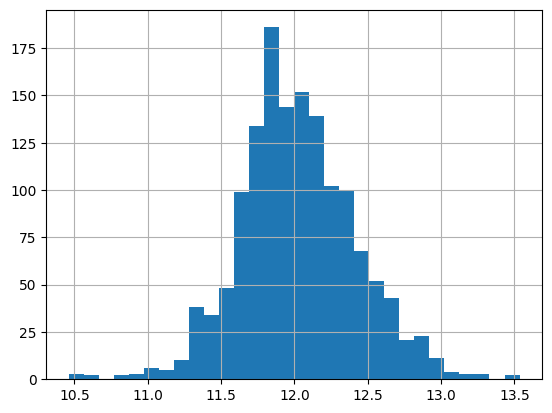

In [258]:
df_train['SalePrice'].hist(bins=30)

In [259]:
df_train

MSSubClass  LotFrontage  LotArea  LotShape  LandContour  Utilities  \
0             60         65.0     8450       3.0          3.0        0.0   
1             20         80.0     9600       3.0          3.0        0.0   
2             60         68.0    11250       0.0          3.0        0.0   
3             70         60.0     9550       0.0          3.0        0.0   
4             60         84.0    14260       0.0          3.0        0.0   
...          ...          ...      ...       ...          ...        ...   
1432          60         62.0     7917       3.0          3.0        0.0   
1433          20         85.0    13175       3.0          3.0        0.0   
1434          70         66.0     9042       3.0          3.0        0.0   
1435          20         68.0     9717       3.0          3.0        0.0   
1436          20         75.0     9937       3.0          3.0        0.0   

      LandSlope  YearRemodAdd  MasVnrArea  ExterQual  ...  SaleType_ConLw  \
0           0.0          2003       196.0        2.0  ...             0.0   
1           0.0          1976         0.0        3.0  ...             0.0   
2           0.0          2002       162.0        2.0  ...             0.0   
3           0.0          1970         0.0        3.0  ...             0.0   
4           0.0          2000       350.0        2.0  ...             0.0   
...         ...           ...         ...        ...  ...             ...   
1432        0.0          2000         0.0        3.0  ...             0.0   
1433        0.0          1988       119.0        3.0  ...             0.0   
1434        0.0          2006         0.0        0.0  ...             0.0   
1435        0.0          1996         0.0        3.0  ...             0.0   
1436        0.0          1965         0.0        2.0  ...             0.0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0              0.0           0.0          1.0                    0.0   
1              0.0           0.0          1.0                    0.0   
2              0.0           0.0          1.0                    0.0   
3              0.0           0.0          1.0                    1.0   
4              0.0           0.0          1.0                    0.0   
...            ...           ...          ...                    ...   
1432           0.0           0.0          1.0                    0.0   
1433           0.0           0.0          1.0                    0.0   
1434           0.0           0.0          1.0                    0.0   
1435           0.0           0.0          1.0                    0.0   
1436           0.0           0.0          1.0                    0.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1432                    0.0                   0.0                   0.0   
1433                    0.0                   0.0                   0.0   
1434                    0.0                   0.0                   0.0   
1435                    0.0                   0.0                   0.0   
1436                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
0                      1.0                    0.0  
1                      1.0                    0.0  
2                      1.0                    0.0  
3                      0.0                    0.0  
4                      1.0                    0.0  
...                    ...                    ...  
1432                   1.0            

In [260]:
numerical = df_train.select_dtypes(include=['int64', 'float64']).columns
numerical = numerical.drop('SalePrice')

In [274]:
numerical

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=195)

In [261]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train[numerical] = scaler.fit_transform(df_train[numerical])


#### Modelos

In [262]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso


X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [264]:
def calculate_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mae, rmse, r2


In [265]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)

lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mae_lasso, rmse_lasso, r2_lasso = calculate_metrics(y_test, y_pred_lasso)
print(f"Lasso Regression - MAE: {mae_lasso}, RMSE: {rmse_lasso}, R²: {r2_lasso}")

Lasso Regression - MAE: 0.15208757733623512, RMSE: 0.21854574998190182, R²: 0.6962920298261694


In [266]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf, rmse_rf, r2_rf = calculate_metrics(y_test, y_pred_rf)
print(f"Random Forest Regressor - MAE: {mae_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")

Random Forest Regressor - MAE: 0.09066342326537163, RMSE: 0.13866319922629872, R²: 0.8777373258131059


In [267]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb, rmse_xgb, r2_xgb = calculate_metrics(y_test, y_pred_xgb)
print(f"XGBoost Regressor - MAE: {mae_xgb}, RMSE: {rmse_xgb}, R²: {r2_xgb}")


XGBoost Regressor - MAE: 0.08451900529065526, RMSE: 0.12504014455575582, R²: 0.9005807705397428


In [268]:
#Podemos Visualizar que XGboost tiene mejores metricas de evaluacion
#MAE bajo,
#RMSE bajo,
#R2 Se mantiene cerca del 1 con 0.9
#Con esto podriamos centrarnos con XGBRegressor para ver si podemos obtener mejores resultados

In [269]:
xgb_base = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_base, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)

In [270]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Mejores hiperparámetros: {best_params}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Mejores hiperparámetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}


In [271]:
xgb_optimized = XGBRegressor(**best_params, random_state=42)

xgb_optimized.fit(X_train, y_train)

y_pred_optimized = xgb_optimized.predict(X_test)

mae_optimized, rmse_optimized, r2_optimized = calculate_metrics(y_test, y_pred_optimized)
print(f"XGBoost Regressor Optimizado - MAE: {mae_optimized}, RMSE: {rmse_optimized}, R²: {r2_optimized}")


XGBoost Regressor Optimizado - MAE: 0.08199907256630606, RMSE: 0.12292259328328267, R²: 0.9039195813911146


In [272]:
#Realizemos Cross Validation
cv_scores = cross_val_score(xgb_optimized, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

rmse_cv = np.sqrt(-cv_scores)
print(f"Cross-Validation RMSE Scores: {rmse_cv}")
print(f"Mean Cross-Validation RMSE: {np.mean(rmse_cv)}")


Cross-Validation RMSE Scores: [0.13683205 0.1172485  0.10682407 0.13548079 0.11495795]
Mean Cross-Validation RMSE: 0.12226867368323233


#### Guardar Modelo

In [275]:
xgb_optimized.save_model("model-sklearn.json")